# SCM.293 - Session 05 - Validating Continuum Approximation Formula for the TSP

## Load Packages

In [1]:
import sys
import numpy as np
import math
import random

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum

import matplotlib.pyplot as plt

In [2]:
print(sys.version)

3.6.15 | packaged by conda-forge | (default, Dec  3 2021, 18:49:43) 
[GCC Clang 11.1.0]


## Define Classes

### Customer Nodes

In [3]:
class customer:
    '''===================
    Single Customer Class:
    ======================
    A customer is characterized by 
    - a (unique) ID
    - a location (x and y coordiantes)

    '''
    
    def __init__(self,
                x,
                y,
                cust_ID):         # customer ID

        self.cust_ID = str(cust_ID)
        self.x = float(x)
        self.y = float(y)
        self.loc = (self.x,self.y)
        

## Define Functions

### Compute Distance Matrix

In [4]:
def calc_dist(orig,dest):
    '''===================
    Distance Function:
    ======================

    Inputs:
    - orig : customer object : customer from which the distance is measured
    - dest : customer object : customer to which the distance is measured
    
    Outputs:
    - Distance (here: Euclidian) between the origina nd destination customer
    
    '''
    return math.sqrt((orig[0]-dest[0])**2+(orig[1]-dest[1])**2)


In [5]:
def d_matrix(customers):
    '''===================
    Distance Matrix Function:
    ======================

    Inputs:
    - customers : dictionary of customer objects : customers between which distances are measured
    
    Outputs:
    - Matrix of distances (here: Euclidian) between all possible customer pairs
    
    '''
    return dict(
        [((i,j),calc_dist(customers[i].loc,customers[j].loc)) 
         for i in customers for j in customers]
    )

### Plot Customers and TSP Path

In [6]:
def print_cust(customers):
    '''===================
    Print Customers Function:
    ======================

    Inputs:
    - customers : dictionary of customer objects : customers between which distances are measured
    
    Outputs:
    - None
    
    '''
    
    # Plot customer locations
    x = [customers[i].x for i in customers]
    y = [customers[i].y for i in customers]

    plt.scatter(x, y)
    plt.show()

In [7]:
def print_TSP(customers,X):
    '''===================
    Print TSP Function:
    ======================

    Inputs:
    - customers : dictionary of customer objects : customers between which distances are measured
    - X : dictionary of Gurobi decision variables : routing decisions in the optimal solution
    
    Outputs:
    - None
    
    '''
    
    # Extract the vehicle trajectory from the optimal solution to the TSP
    # 1. Set (arbitrary) custoemr to start the trajectory at
    i = list(customers.keys())[0]
    # 2. Determine x and y coordinates of that customer and record them
    locslist_x = [customers[i].x]
    locslist_y = [customers[i].y]
    # 3. Record that you have visited one ciustomer already
    n_done = 1
    
    # 4. While you have not yet visited all customers (i.e., no full circle)
    while n_done <= len(customers):
        # - Find next customer along the optimal TSP path
        for j in customers:
            if ((i,j) in X) and (round(X[(i,j)].x) == 1):
                # - Determine x and y coordinates of that customer and record them
                locslist_x.append(customers[j].x)
                locslist_y.append(customers[j].y)
                # - Record that this is now the last visited customer
                i = j
                # - Increase the number of customers visited
                n_done = n_done+1
                # - Break out of this For Loop, since you found the next customer
                break

    # Plot customer locations
    x = [customers[i].x for i in customers]
    y = [customers[i].y for i in customers]
    plt.scatter(x, y)
    # Plot TSP path between them
    plt.plot(locslist_x, locslist_y, 'ro-')
    plt.show()
    

## Generate Data

Basic Parameters

In [8]:
# Number of customers
n_customers = np.arange(5, 105, 5).tolist()
iterations = 10

# Dimensions of the demand area
area_width = 10.0
area_height = 10.0
area_size = area_width*area_height

Customers

In [9]:
# Here: 
# - randomly generate n customer locations
# - create custumer objects for each customer
customers = dict(
    [((num, it+1),dict(
        [("C_"+str(i+1)+"_"+str(num)+"_"+str(it), customer(random.uniform(0,area_width),random.uniform(0,area_height),"C_"+str(i+1))) 
         for i in range(num)]
    )) for num in n_customers for it in range(iterations)]
)

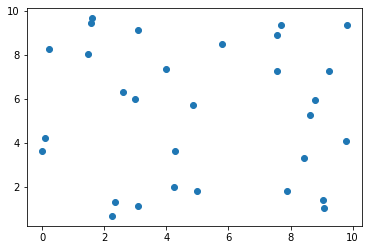

In [10]:
# Plot the customer locations
print_cust(customers[(30,1)])

In [11]:
# Create flattened dictionary of customers to facilitate distance matrix calculation
customers_all = {}
for num in n_customers:
    for it in range(iterations):
        customers_all.update(customers[(num,it+1)])

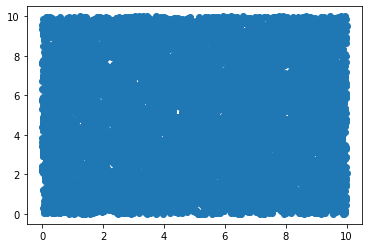

In [12]:
print_cust(customers_all)

Distances

In [13]:
# Compute distance matrix between these customers
distances = d_matrix(customers_all)

## Solve Gurobi Model of the TSP for every instance

In [14]:
# Initialize dataframe to record results
results = pd.DataFrame(columns=['n_cust','cust_dens','total_dist','inter_dist'])

Academic license - for non-commercial use only - expires 2023-03-24
Using license file /Users/mwinkenb/gurobi.lic
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 1


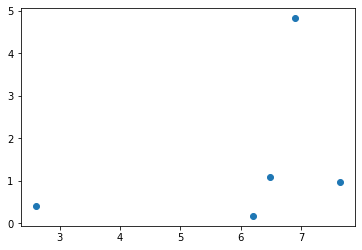

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0xaa45e236
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 17.3200341
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.581145e+01, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                      15.8114472    0.00000   100%     -    0s
     0     0          -    0        15.81145   15.81145  0.00%    

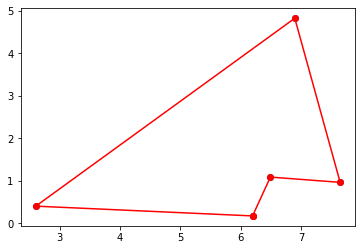

Total Cost: 15.8114
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 2


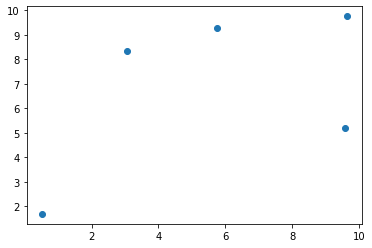

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0xef300b82
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 32.0649881
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 2.817038e+01, 10 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                      28.1703754    0.00000   100%     -    0s
     0     0          -    0        28.17038   28.17038  0.00%    

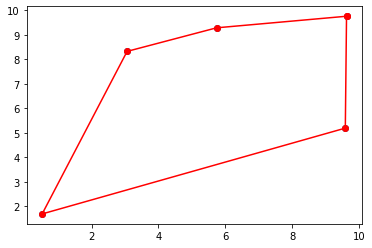

Total Cost: 28.1704
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 3


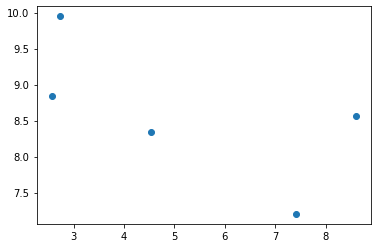

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0xf73bdf75
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 22.6968367
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.000691e+01, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.00691    0    9   22.69684   10.00691  55.9%     -    0s
H    0     0                      17.4130306   10.00691  42.5%    

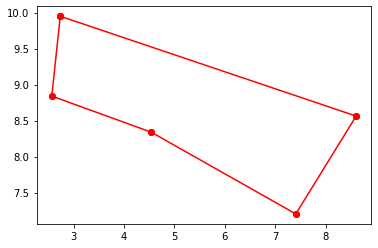

Total Cost: 14.0894
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 4


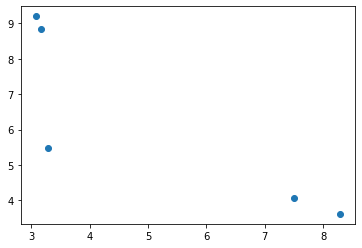

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x3b9822eb
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [4e-01, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 24.2665648
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.014381e+01, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.14381    0    9   24.26656   10.14381  58.2%     -    0s
H    0     0                      16.7340256   10.14381  39.4%    

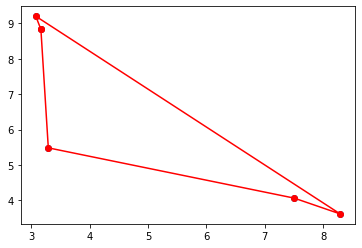

Total Cost: 16.734
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 5


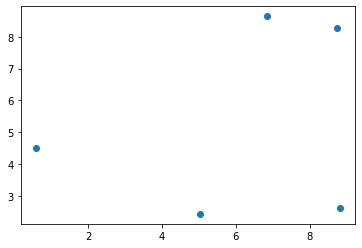

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x89440fb7
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [2e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 35.0274386
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 2.207931e+01, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.07931    0    9   35.02744   22.07931  37.0%     -    0s
H    0     0                      25.9387103   22.07931  14.9%    

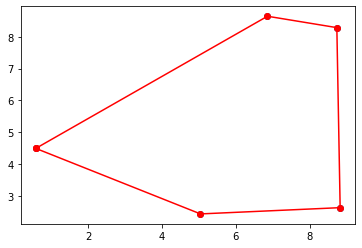

Total Cost: 23.798
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 6


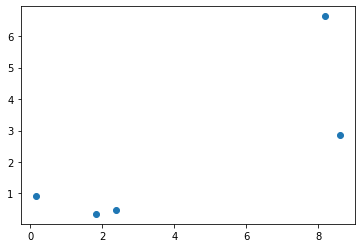

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x62880fb7
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [6e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 24.2816936
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.633376e+01, 13 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.33376    0    6   24.28169   16.33376  32.7%     -    0s
H    0     0                      23.2917417   16.33376  29.9%    

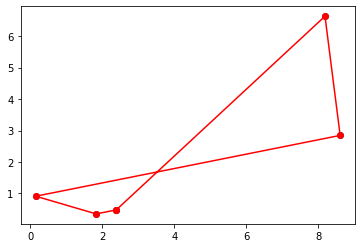

Total Cost: 23.2917
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 7


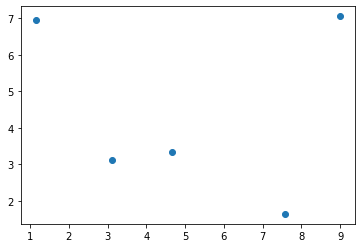

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0xed0b3521
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 25.4146269
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 2.239328e+01, 12 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.39328    0    9   25.41463   22.39328  11.9%     -    0s
H    0     0                      24.8004702   22.39328  9.71%    

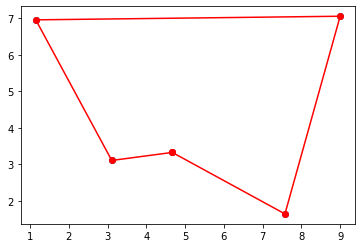

Total Cost: 22.7224
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 8


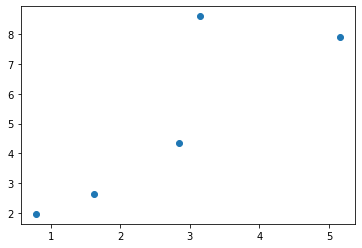

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x3725d27e
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 26.9743083
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.148723e+01, 13 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.48723    0    6   26.97431   11.48723  57.4%     -    0s
H    0     0                      16.6229983   11.48723  30.9%    

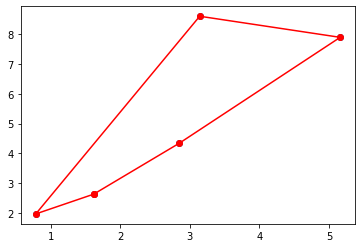

Total Cost: 16.623
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 9


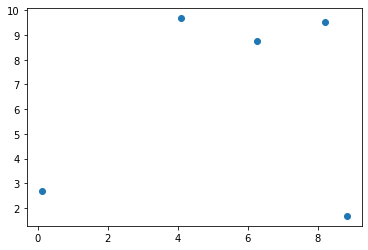

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x93768a8d
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 33.0807354
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 2.728722e+01, 14 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.28722    0    8   33.08074   27.28722  17.5%     -    0s
H    0     0                      31.7344709   27.28722  14.0%    

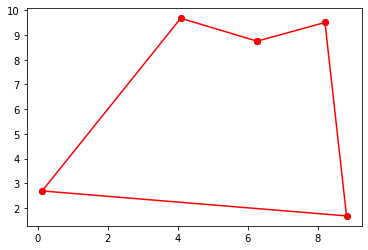

Total Cost: 29.1024
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
5 customers, iteration 10


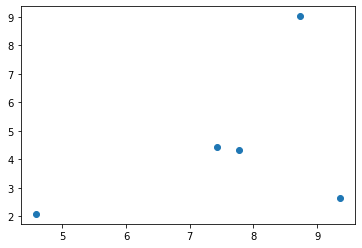

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 29 columns and 84 nonzeros
Model fingerprint: 0x438894eb
Variable types: 0 continuous, 29 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [4e-01, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 21.7120185
Presolve removed 8 rows and 5 columns
Presolve time: 0.00s
Presolved: 22 rows, 24 columns, 76 nonzeros
Variable types: 0 continuous, 24 integer (20 binary)

Root relaxation: objective 1.973221e+01, 13 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   19.73221    0    6   21.71202   19.73221  9.12%     -    0s
H    0     0                      21.4088805   19.73221  7.83%    

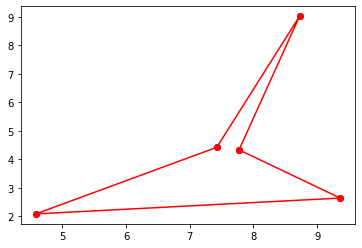

Total Cost: 20.3708
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 1


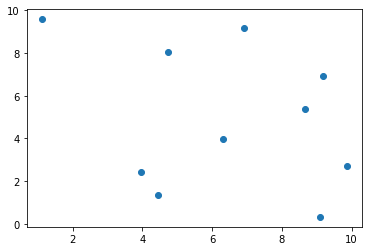

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x649251d4
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 54.9005616
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.719093e+01, 26 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.19093    0   12   54.90056   27.19093  50.5%     -    0s
H    0     0                      35.9250791   27.19093  2

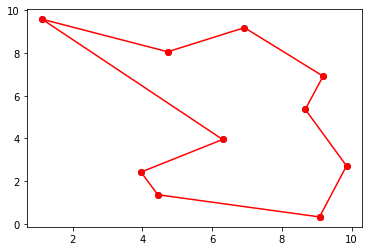

Total Cost: 32.9769
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 2


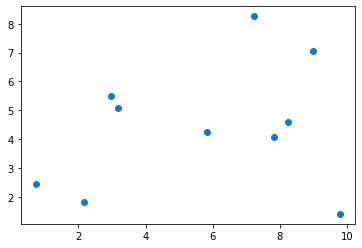

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x4cf6d45f
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [5e-01, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 55.0903246
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.079229e+01, 29 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   20.79229    0   15   55.09032   20.79229  62.3%     -    0s
H    0     0                      39.9481989   20.79229  4

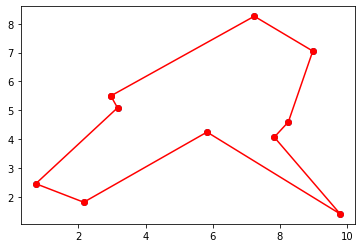

Total Cost: 28.6594
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 3


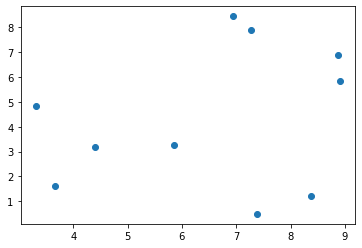

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x172b202a
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [6e-01, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 52.9438046
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 1.648476e+01, 33 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.48476    0   12   52.94380   16.48476  68.9%     -    0s
H    0     0                      30.7175144   16.48476  4

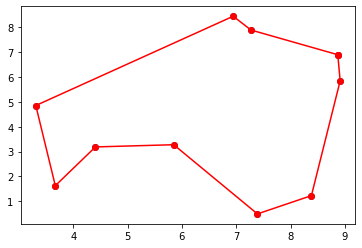

Total Cost: 24.1733
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 4


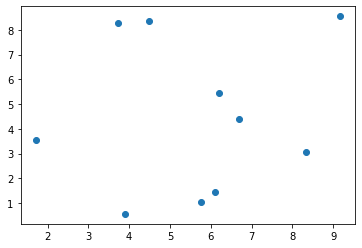

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x9b939b98
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 42.0442116
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.361401e+01, 31 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   23.61401    0   19   42.04421   23.61401  43.8%     -    0s
H    0     0                      36.7552021   23.61401  3

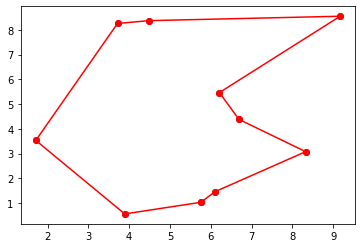

Total Cost: 27.0516
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 5


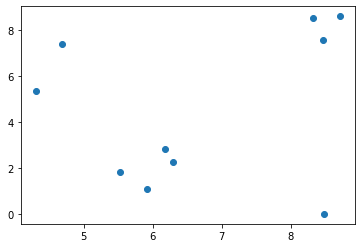

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x078f2e4e
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [4e-01, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 48.4355434
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 1.481013e+01, 24 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.81013    0   12   48.43554   14.81013  69.4%     -    0s
H    0     0                      46.6730442   14.81013  6

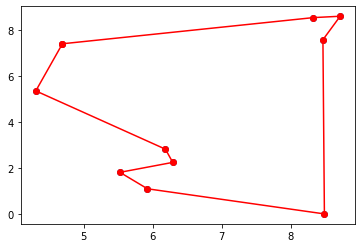

Total Cost: 23.1116
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 6


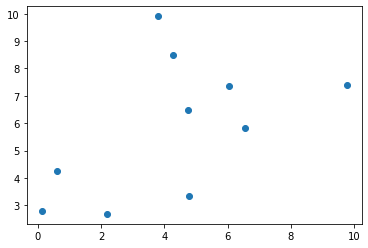

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0xe51b21cd
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 55.3113789
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.255903e+01, 33 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.55903    0   18   55.31138   22.55903  59.2%     -    0s
H    0     0                      37.2554957   22.55903  3

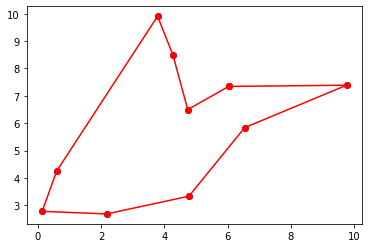

Total Cost: 28.188
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 7


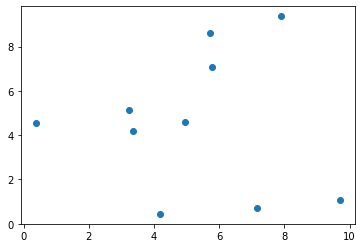

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0xc05beb1d
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 64.6745884
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.726001e+01, 31 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.26001    0   14   64.67459   27.26001  57.9%     -    0s
H    0     0                      38.8806780   27.26001  2

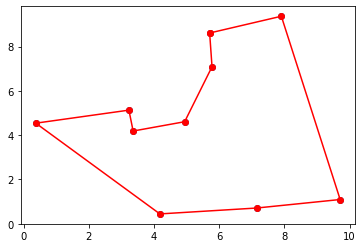

Total Cost: 31.6155
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 8


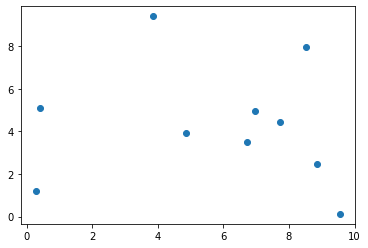

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x56dc33d7
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [9e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 62.7808697
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.921677e+01, 31 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   29.21677    0   16   62.78087   29.21677  53.5%     -    0s
H    0     0                      48.4319553   29.21677  3

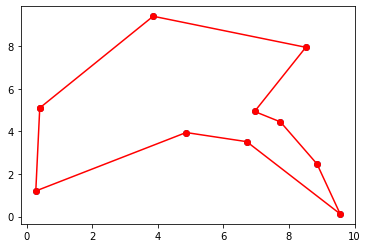

Total Cost: 35.024
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 9


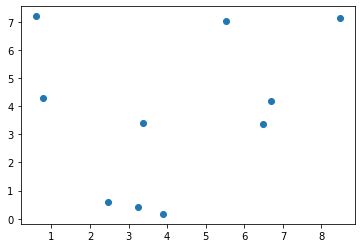

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0xe010dc61
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [7e-01, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 53.8194054
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 2.134550e+01, 32 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.34550    0   16   53.81941   21.34550  60.3%     -    0s
H    0     0                      41.4205363   21.34550  4

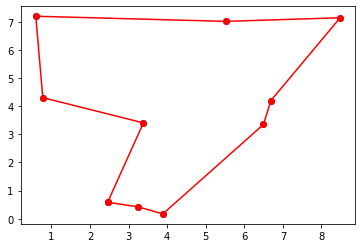

Total Cost: 26.4543
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
10 customers, iteration 10


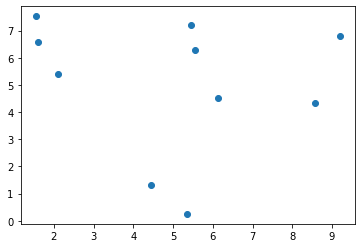

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 110 rows, 109 columns and 414 nonzeros
Model fingerprint: 0x4a1bf973
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [9e-01, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 51.2498990
Presolve removed 18 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)

Root relaxation: objective 1.844854e+01, 27 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   18.44854    0    9   51.24990   18.44854  64.0%     -    0s
H    0     0                      29.5374199   18.44854  3

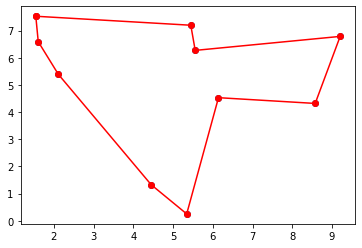

Total Cost: 26.1937
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 1


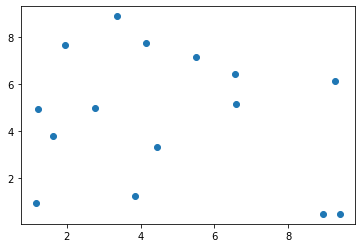

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x2fb9b6b4
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 89.9661729
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.793373e+01, 40 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.93373    0   27   89.96617   27.93373  69.0%     -    0s
     0     0   34.88325    0   24   89.96617   34.8832

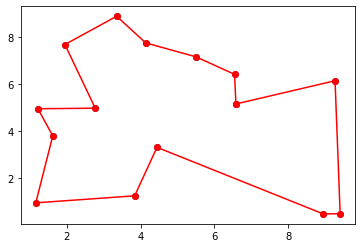

Total Cost: 34.8871
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 2


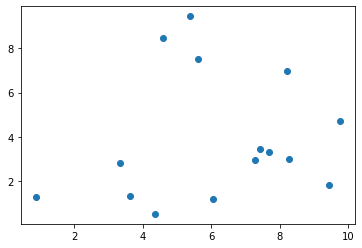

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x802d9887
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 72.4850243
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.575474e+01, 42 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   25.75474    0   32   72.48502   25.75474  64.5%     -    0s
     0     0   27.70812    0   25   72.48502   27.7081

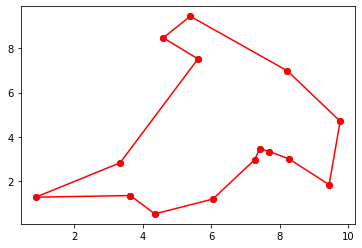

Total Cost: 31.1417
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 3


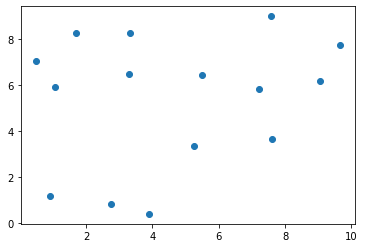

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x0ce4d424
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 86.1820888
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.998638e+01, 47 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   29.98638    0   16   86.18209   29.98638  65.2%     -    0s
H    0     0                      50.7228579   29.9863

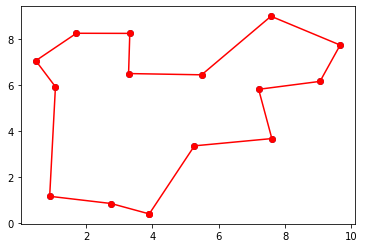

Total Cost: 33.5441
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 4


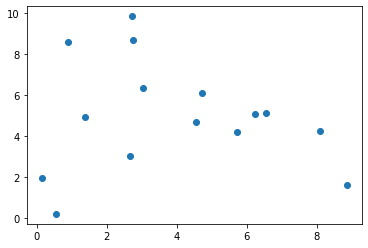

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x495ac4e4
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 78.8766950
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.613566e+01, 48 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   26.13566    0   29   78.87669   26.13566  66.9%     -    0s
     0     0   30.51039    0   35   78.87669   30.5103

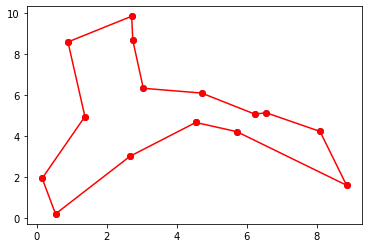

Total Cost: 34.2103
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 5


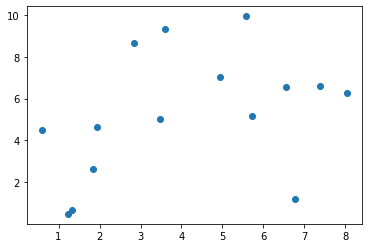

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x326ef8bf
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 74.0143324
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.741565e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.41565    0   25   74.01433   27.41565  63.0%     -    0s
H    0     0                      54.2394497   27.4156

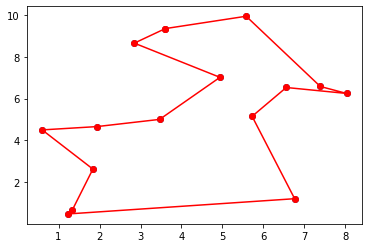

Total Cost: 32.9108
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 6


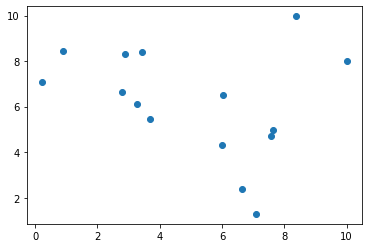

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0xbf91aefb
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 76.5513339
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.056264e+01, 47 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   20.56264    0   21   76.55133   20.56264  73.1%     -    0s
     0     0   27.57640    0   26   76.55133   27.5764

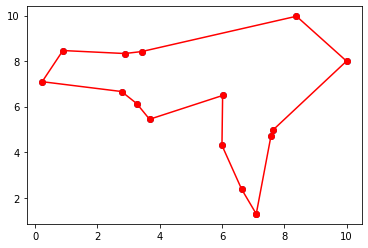

Total Cost: 31.4455
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 7


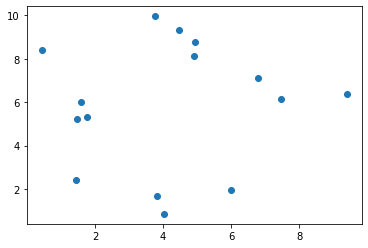

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x20b29710
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 76.5336165
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.467652e+01, 53 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   24.67652    0   32   76.53362   24.67652  67.8%     -    0s
H    0     0                      43.7376922   24.6765

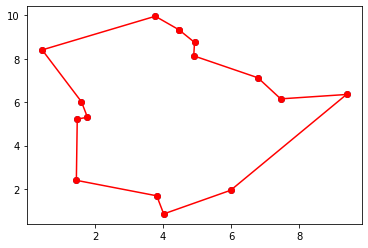

Total Cost: 28.9025
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 8


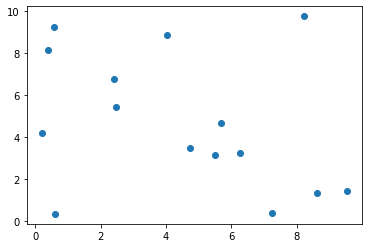

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0xeaf2b715
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 88.5725714
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 3.178756e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.78756    0   20   88.57257   31.78756  64.1%     -    0s
H    0     0                      87.1285490   31.7875

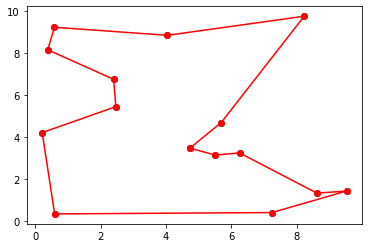

Total Cost: 40.9917
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 9


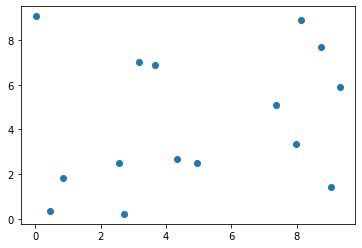

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0x33dc4d25
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 89.2931825
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 2.949676e+01, 44 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   29.49676    0   22   89.29318   29.49676  67.0%     -    0s
H    0     0                      50.8969036   29.4967

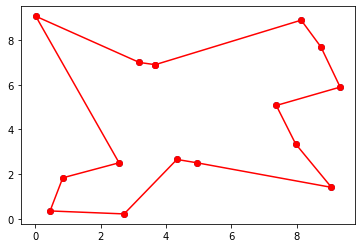

Total Cost: 39.0464
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
15 customers, iteration 10


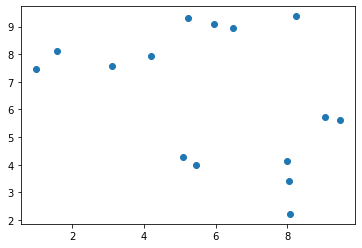

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 240 rows, 239 columns and 994 nonzeros
Model fingerprint: 0xeb85360f
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-01, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 81.4443025
Presolve removed 28 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 966 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)

Root relaxation: objective 1.605645e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.05645    0   24   81.44430   16.05645  80.3%     -    0s
H    0     0                      28.9422755   16.0564

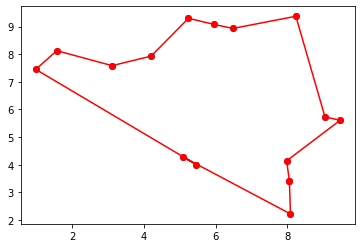

Total Cost: 26.4224
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 1


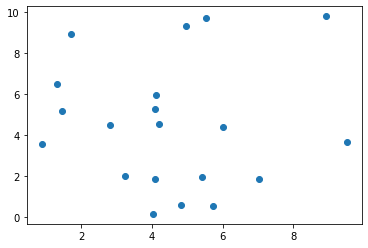

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0xc94bbc7d
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 99.6250353
Found heuristic solution: objective 98.1281387

Root relaxation: objective 3.627752e+01, 58 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   36.27752    0   38   98.12814   36.27752  63.0%     -    0s
H    

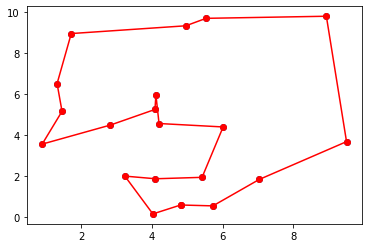

Total Cost: 40.0163
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 2


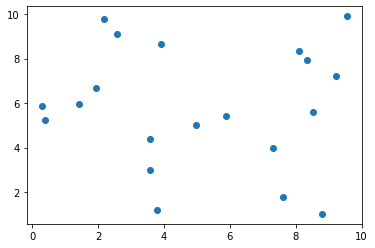

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x97c6597a
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 106.3475623
Found heuristic solution: objective 103.9720650

Root relaxation: objective 2.917001e+01, 66 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   29.17001    0   30  103.97207   29.17001  71.9%     -    0s
H  

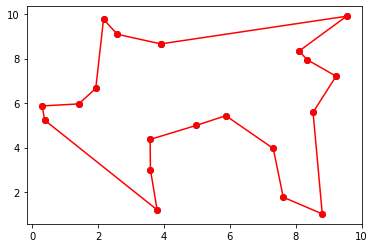

Total Cost: 40.4242
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 3


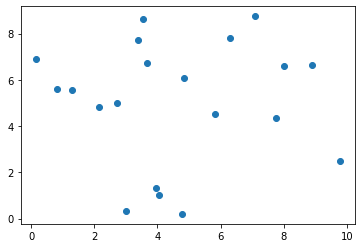

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x6733388d
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 94.1377437

Root relaxation: objective 2.682593e+01, 62 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   26.82593    0   38   94.13774   26.82593  71.5%     -    0s
H    0     0                      46.7210066   26.82

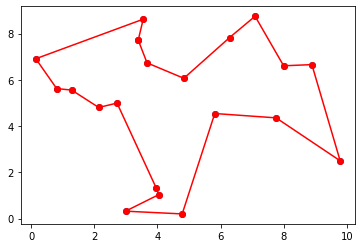

Total Cost: 38.1533
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 4


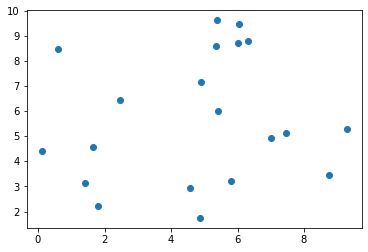

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x4857403b
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 106.2036308
Found heuristic solution: objective 104.8860918

Root relaxation: objective 2.611552e+01, 67 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   26.11552    0   39  104.88609   26.11552  75.1%     -    0s
   

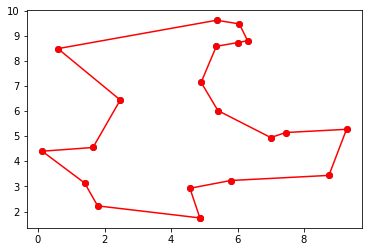

Total Cost: 33.9254
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 5


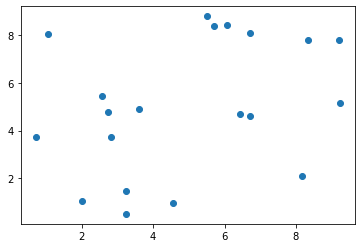

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0xcbb52198
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 89.0017458

Root relaxation: objective 2.874657e+01, 65 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   28.74657    0   37   89.00175   28.74657  67.7%     -    0s
H    0     0                      46.7080223   28.74

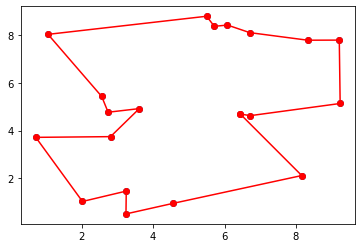

Total Cost: 35.7117
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 6


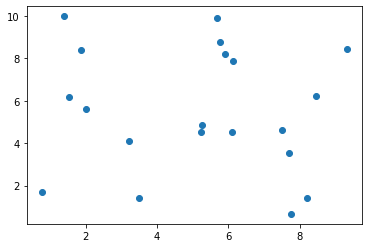

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x64026ea2
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 115.7489185
Found heuristic solution: objective 86.2208067

Root relaxation: objective 2.844818e+01, 74 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   28.44818    0   38   86.22081   28.44818  67.0%     -    0s
H   

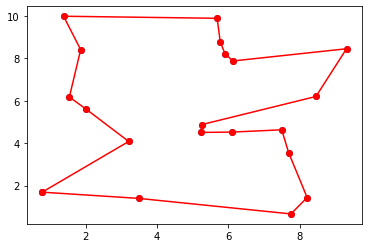

Total Cost: 39.3276
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 7


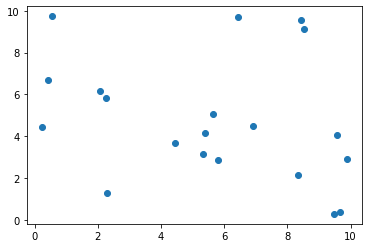

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x8be5b70d
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 103.3487886

Root relaxation: objective 3.107224e+01, 58 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.07224    0   31  103.34879   31.07224  69.9%     -    0s
H    0     0                      49.9137950   31.0

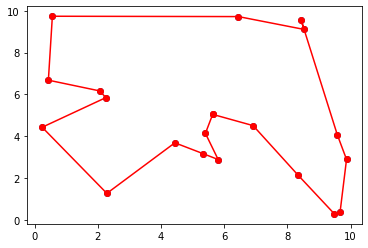

Total Cost: 42.7722
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 8


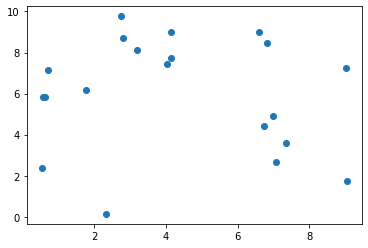

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x3f69514e
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 105.3654091

Root relaxation: objective 2.742213e+01, 60 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.42213    0   35  105.36541   27.42213  74.0%     -    0s
H    0     0                      43.4810524   27.4

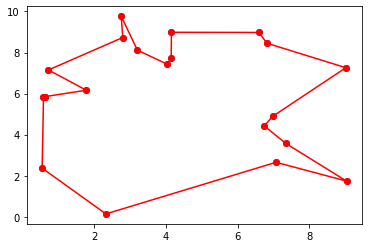

Total Cost: 37.2811
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 9


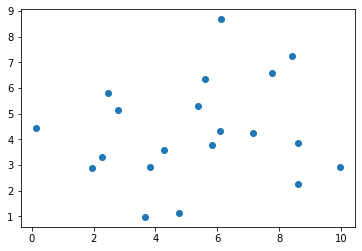

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x758f7aff
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 91.7150142
Found heuristic solution: objective 80.6057541

Root relaxation: objective 2.666544e+01, 71 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   26.66544    0   39   80.60575   26.66544  66.9%     -    0s
     

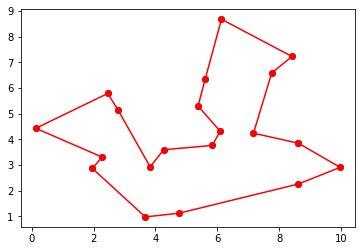

Total Cost: 34.8694
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
20 customers, iteration 10


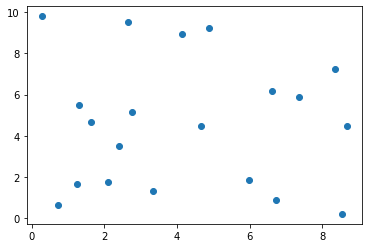

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 420 rows, 419 columns and 1824 nonzeros
Model fingerprint: 0x35f8d4e3
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [8e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 38 rows and 20 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 119.5655188
Found heuristic solution: objective 88.7043111

Root relaxation: objective 3.312573e+01, 56 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.12573    0   31   88.70431   33.12573  62.7%     -    0s
    

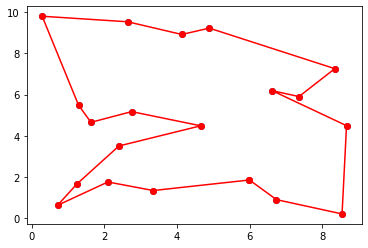

Total Cost: 41.5167
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 1


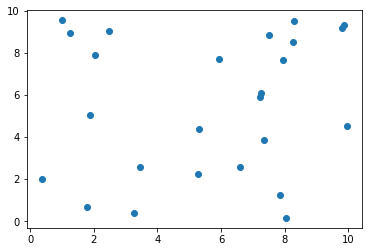

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0xe9c25dfc
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 148.1120102

Root relaxation: objective 3.707701e+01, 78 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.07701    0   44  148.11201   37.07701  75.0%     -    0s
     0     0   43.23290    0   53  148.11201   43.2

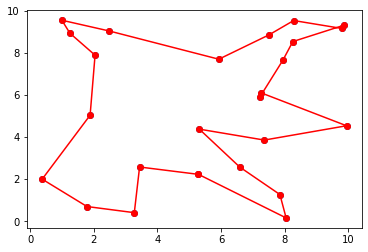

Total Cost: 46.9521
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 2


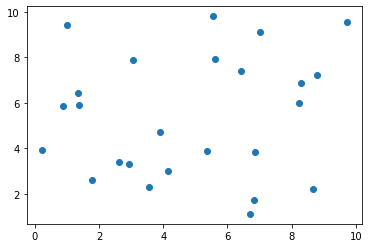

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0x6baf0250
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 128.4146599

Root relaxation: objective 3.526671e+01, 82 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   35.26671    0   46  128.41466   35.26671  72.5%     -    0s
     0     0   40.46762    0   60  128.41466   40.4

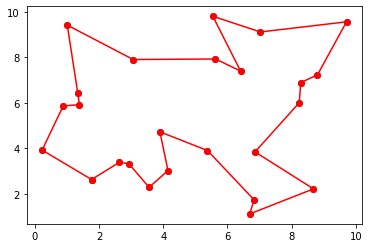

Total Cost: 42.6354
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 3


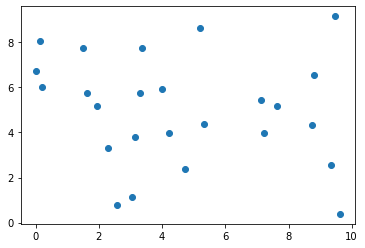

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0x922a3f5d
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 113.8478006
Found heuristic solution: objective 105.8539260

Root relaxation: objective 3.372866e+01, 86 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.72866    0   44  105.85393   33.72866  68.1%     -    0s
   

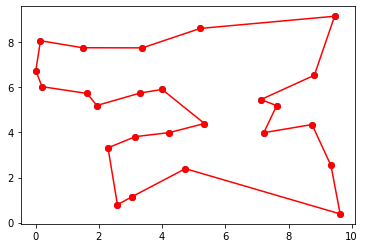

Total Cost: 43.8925
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 4


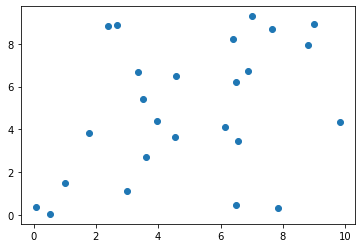

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0xeaa3cdf3
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 131.8147821

Root relaxation: objective 3.367291e+01, 75 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.67291    0   46  131.81478   33.67291  74.5%     -    0s
     0     0   39.70429    0   54  131.81478   39.7

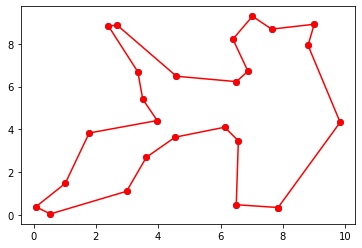

Total Cost: 44.0611
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 5


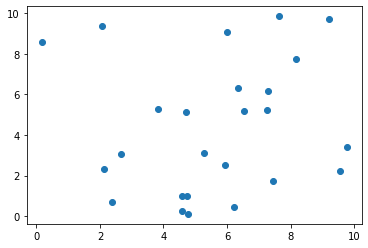

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0x0a7205a2
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 134.1586280
Found heuristic solution: objective 121.6743220

Root relaxation: objective 3.122770e+01, 103 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.22770    0   46  121.67432   31.22770  74.3%     -    0s
  

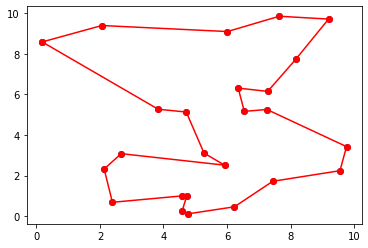

Total Cost: 44.0249
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 6


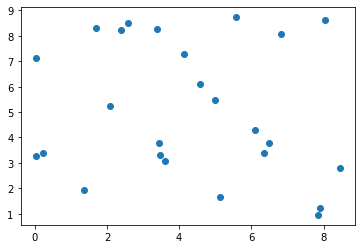

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0xa232ee25
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 114.0865244

Root relaxation: objective 3.159096e+01, 74 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.59096    0   52  114.08652   31.59096  72.3%     -    0s
H    0     0                      66.5693155   31.5

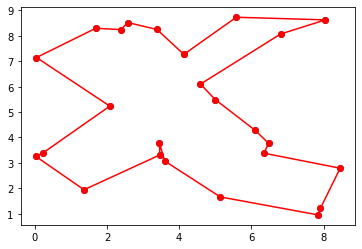

Total Cost: 37.6476
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 7


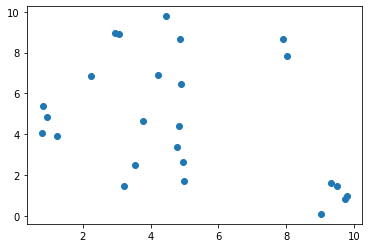

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0xc690dfed
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 132.9629506
Found heuristic solution: objective 120.1120692

Root relaxation: objective 2.254513e+01, 84 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.54513    0   42  120.11207   22.54513  81.2%     -    0s
H  

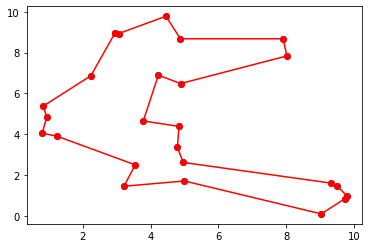

Total Cost: 38.5274
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 8


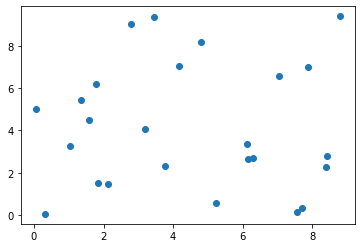

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0x9f76cd71
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 130.2847764
Found heuristic solution: objective 129.2309850

Root relaxation: objective 3.281716e+01, 83 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.81716    0   48  129.23099   32.81716  74.6%     -    0s
   

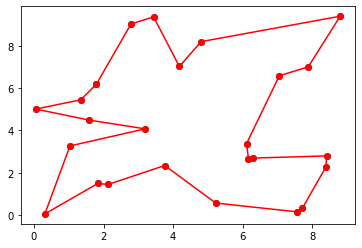

Total Cost: 44.3628
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 9


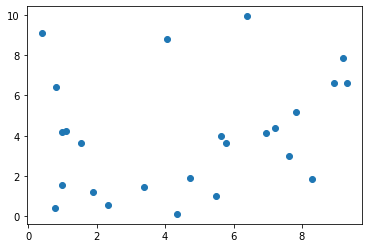

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0xdd60746d
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.01s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 40.3179482

Root relaxation: objective 3.126607e+01, 76 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.26607    0   49   40.31795   31.26607  22.5%     -    0s
     0     0   37.21890    0   51   40.31795   37.21

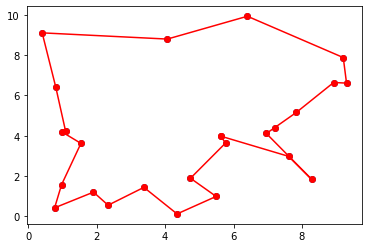

Total Cost: 40.0969
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
25 customers, iteration 10


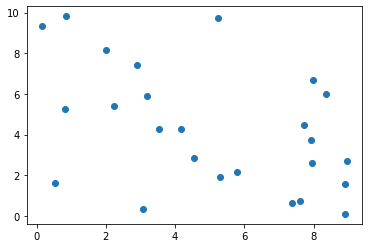

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 650 rows, 649 columns and 2904 nonzeros
Model fingerprint: 0x757d6786
Variable types: 0 continuous, 649 integer (625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 48 rows and 25 columns
Presolve time: 0.00s
Presolved: 602 rows, 624 columns, 2856 nonzeros
Variable types: 0 continuous, 624 integer (600 binary)
Found heuristic solution: objective 142.5399271
Found heuristic solution: objective 137.5225934

Root relaxation: objective 3.393580e+01, 83 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.93580    0   49  137.52259   33.93580  75.3%     -    0s
H  

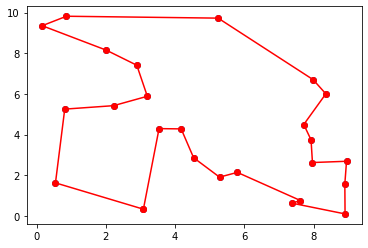

Total Cost: 43.1453
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 1


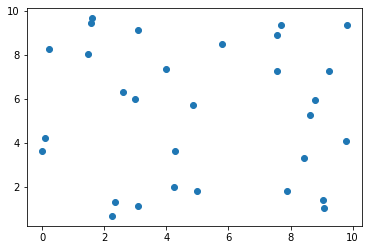

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x58b9110f
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 188.3339323
Found heuristic solution: objective 174.5103055

Root relaxation: objective 3.531553e+01, 100 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   35.31553    0   56  174.51031   35.31553  79.8%     -    0s
  

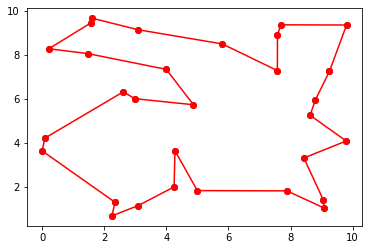

Total Cost: 48.8516
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 2


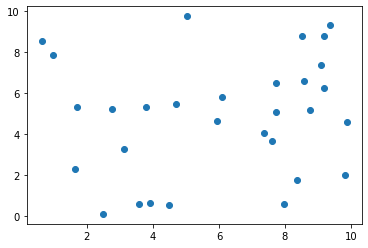

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0xb0a33fa3
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 152.1933180

Root relaxation: objective 3.773404e+01, 100 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.73404    0   56  152.19332   37.73404  75.2%     -    0s
     0     0   43.43067    0   66  152.19332   43.

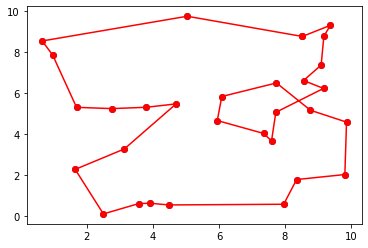

Total Cost: 48.0423
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 3


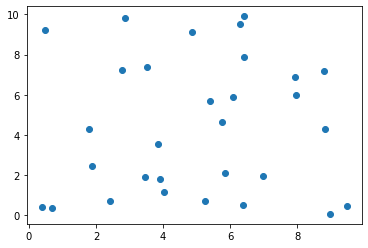

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0xe8f522d1
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 172.5896604

Root relaxation: objective 3.719178e+01, 106 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.19178    0   55  172.58966   37.19178  78.5%     -    0s
H    0     0                      62.5558318   37.

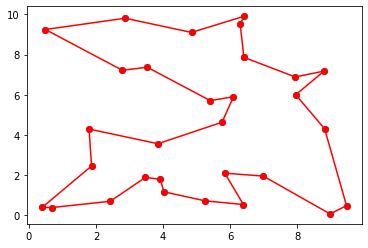

Total Cost: 48.7979
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 4


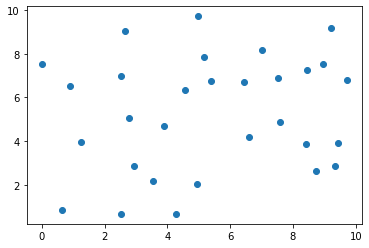

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0xd767e153
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [6e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 151.3726281

Root relaxation: objective 4.282619e+01, 112 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.82619    0   55  151.37263   42.82619  71.7%     -    0s
     0     0   47.26213    0   66  151.37263   47.

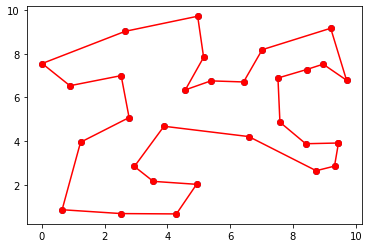

Total Cost: 50.956
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 5


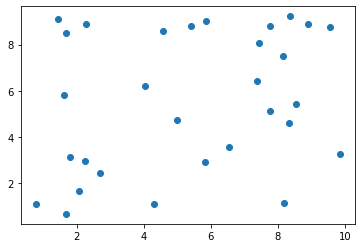

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x84707d3a
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [5e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 164.6546367
Found heuristic solution: objective 148.6155528

Root relaxation: objective 3.761073e+01, 84 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.61073    0   57  148.61555   37.61073  74.7%     -    0s
   

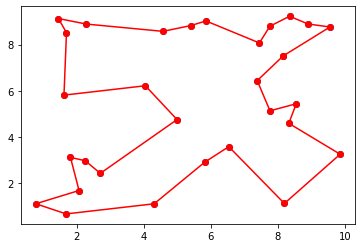

Total Cost: 45.0971
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 6


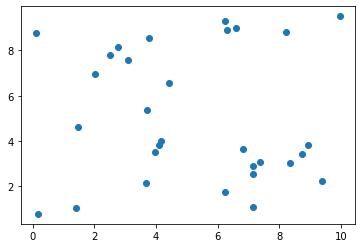

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0xd655de5f
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 175.3028795
Found heuristic solution: objective 159.7563824

Root relaxation: objective 3.461434e+01, 98 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   34.61434    0   50  159.75638   34.61434  78.3%     -    0s
H  

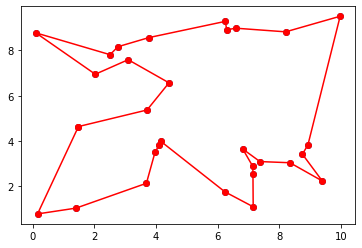

Total Cost: 47.4846
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 7


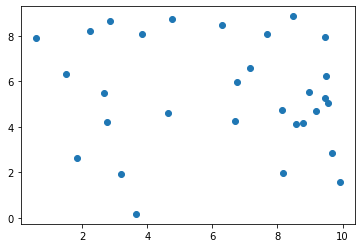

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x593f0ed3
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 142.9506577

Root relaxation: objective 3.740178e+01, 102 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   37.40178    0   65  142.95066   37.40178  73.8%     -    0s
     0     0   39.58523    0   68  142.95066   39.

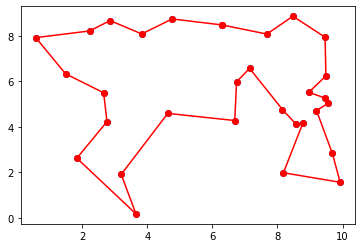

Total Cost: 43.1689
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 8


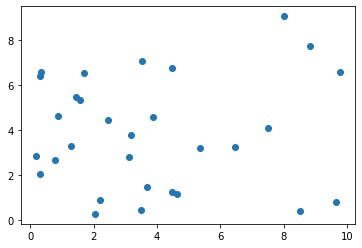

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x90d7b17b
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 143.7818473
Found heuristic solution: objective 141.2014179

Root relaxation: objective 3.223254e+01, 100 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.23254    0   56  141.20142   32.23254  77.2%     -    0s
  

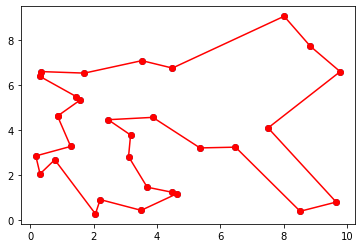

Total Cost: 45.7978
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 9


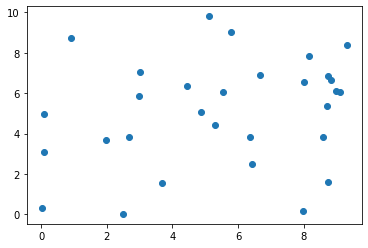

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x69803072
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 123.2719235

Root relaxation: objective 4.231572e+01, 121 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.31572    0   53  123.27192   42.31572  65.7%     -    0s
H    0     0                      63.4058784   42.

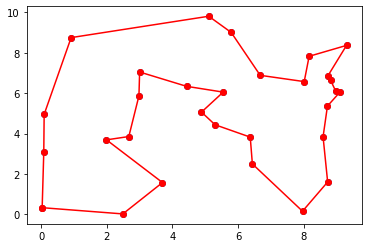

Total Cost: 50.0263
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
30 customers, iteration 10


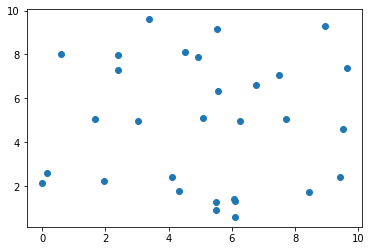

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 930 rows, 929 columns and 4234 nonzeros
Model fingerprint: 0x41e7585a
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 58 rows and 30 columns
Presolve time: 0.01s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 147.7044094

Root relaxation: objective 3.643914e+01, 107 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   36.43914    0   47  147.70441   36.43914  75.3%     -    0s
H    0     0                      77.7222503   36.

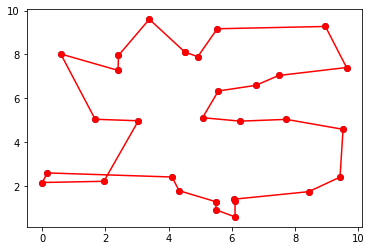

Total Cost: 47.2495
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 1


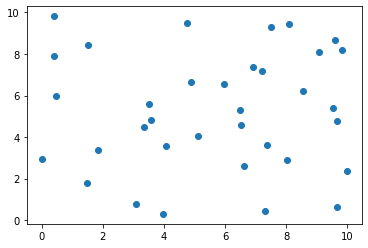

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x38187f81
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [4e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 196.0121727
Found heuristic solution: objective 178.4697574

Root relaxation: objective 4.615813e+01, 110 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.15813    0   65  178.46976   46.15813  74.1%     - 

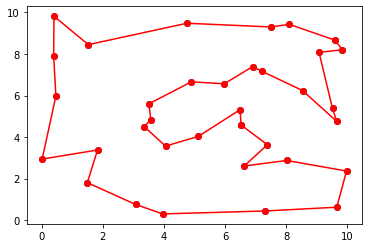

Total Cost: 55.6366
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 2


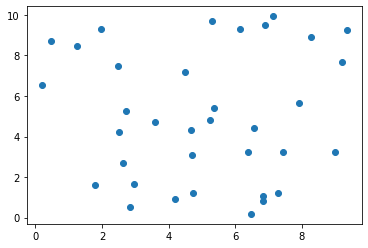

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x5ef2a984
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 192.5440803
Found heuristic solution: objective 173.0772669

Root relaxation: objective 4.178490e+01, 112 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.78490    0   56  173.07727   41.78490  75.9%     - 

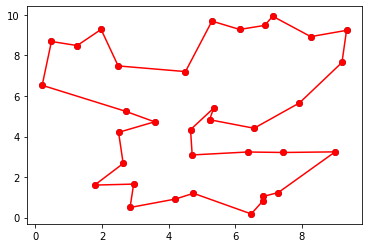

Total Cost: 48.4253
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 3


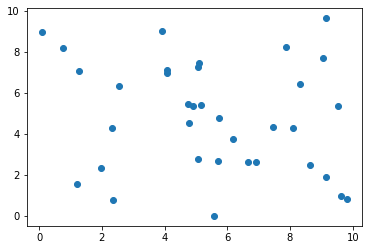

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x4f89b2d1
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 184.5153723

Root relaxation: objective 3.923238e+01, 113 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   39.23238    0   57  184.51537   39.23238  78.7%     -    0s
H    0     0                      63.18930

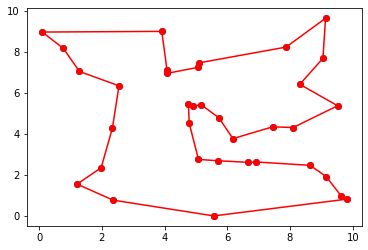

Total Cost: 49.3925
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 4


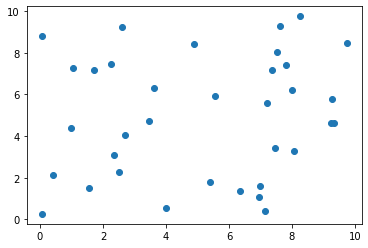

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x5055ca63
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 180.5171407
Found heuristic solution: objective 175.4126592

Root relaxation: objective 4.431649e+01, 107 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   44.31649    0   62  175.41266   44.31649  74.7%     - 

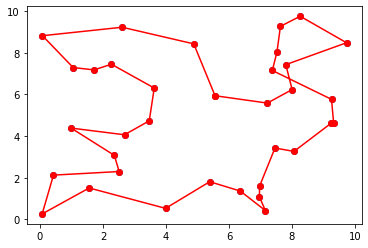

Total Cost: 52.2371
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 5


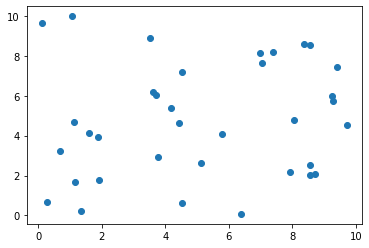

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x67684e88
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 213.6625632
Found heuristic solution: objective 204.5437042

Root relaxation: objective 3.553755e+01, 108 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   35.53755    0   62  204.54370   35.53755  82.6%     - 

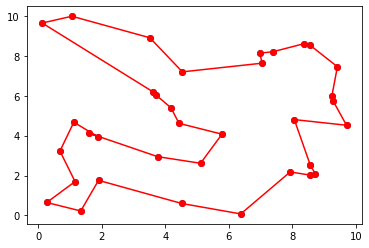

Total Cost: 49.8034
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 6


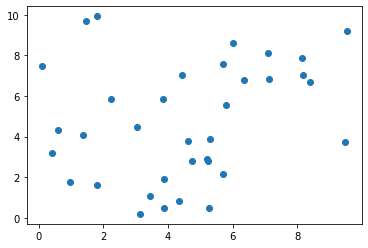

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x8ff50b63
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 173.1740334

Root relaxation: objective 4.331817e+01, 119 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.31817    0   57  173.17403   43.31817  75.0%     -    0s
H    0     0                      59.91596

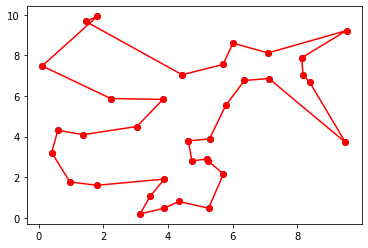

Total Cost: 50.8234
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 7


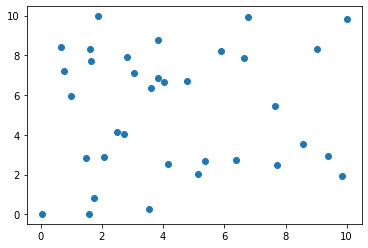

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0xbba26c81
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 179.7237775

Root relaxation: objective 4.363723e+01, 117 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.63723    0   67  179.72378   43.63723  75.7%     -    0s
     0     0   49.39831    0   83  179.723

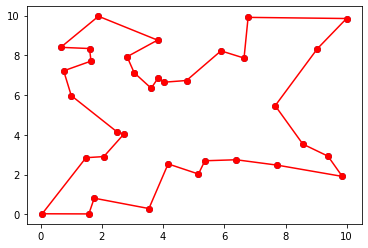

Total Cost: 50.6664
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 8


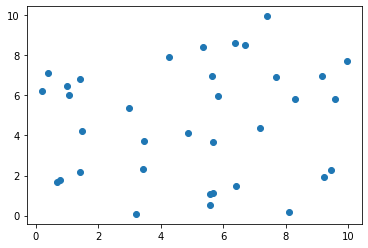

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x8d219317
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 170.0693508

Root relaxation: objective 4.137410e+01, 123 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.37410    0   73  170.06935   41.37410  75.7%     -    0s
H    0     0                      74.17827

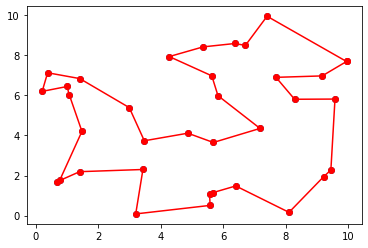

Total Cost: 50.3585
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 9


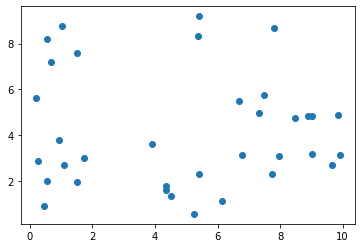

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0x25d878f9
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 179.3327593

Root relaxation: objective 3.669979e+01, 101 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   36.69979    0   60  179.33276   36.69979  79.5%     -    0s
H    0     0                      53.23680

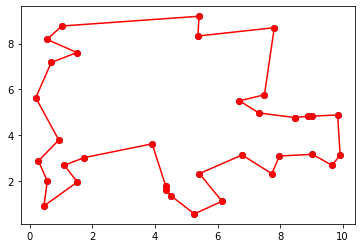

Total Cost: 43.4367
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
35 customers, iteration 10


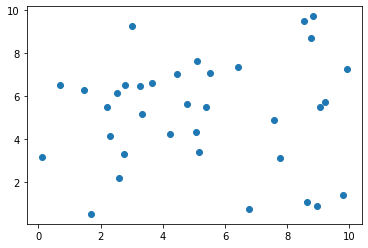

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1260 rows, 1259 columns and 5814 nonzeros
Model fingerprint: 0xbf922c39
Variable types: 0 continuous, 1259 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 68 rows and 35 columns
Presolve time: 0.01s
Presolved: 1192 rows, 1224 columns, 5746 nonzeros
Variable types: 0 continuous, 1224 integer (1190 binary)
Found heuristic solution: objective 145.9938007

Root relaxation: objective 4.203483e+01, 106 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.03483    0   52  145.99380   42.03483  71.2%     -    0s
H    0     0                      58.27740

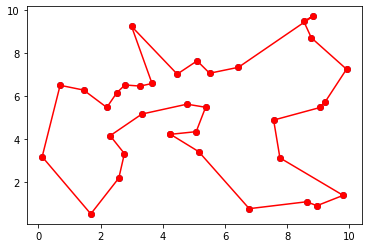

Total Cost: 49.9688
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 1


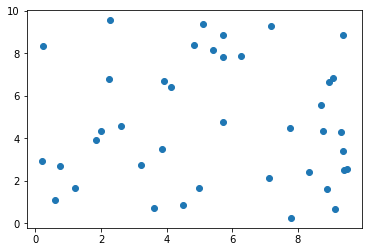

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0xe9c22ca2
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 227.0920756
Found heuristic solution: objective 218.1341834

Root relaxation: objective 4.304972e+01, 125 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.04972    0   73  218.13418   43.04972  80.3%     - 

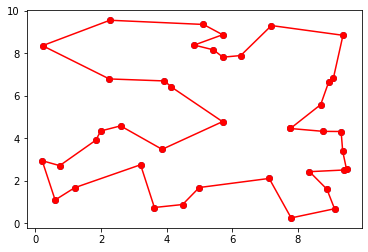

Total Cost: 52.2215
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 2


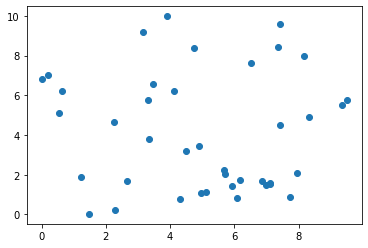

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0xb457fbff
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 203.0237083

Root relaxation: objective 3.343461e+01, 126 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.43461    0   68  203.02371   33.43461  83.5%     -    0s
H    0     0                      53.91104

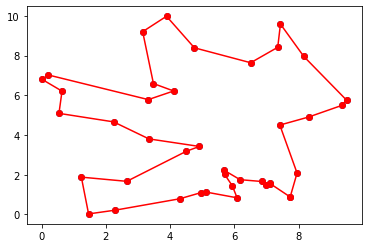

Total Cost: 47.4427
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 3


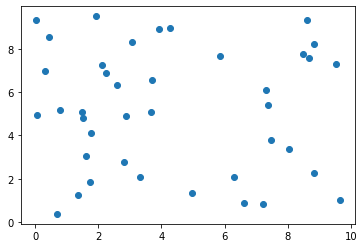

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x96e05631
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 208.5332614

Root relaxation: objective 4.164301e+01, 124 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.64301    0   61  208.53326   41.64301  80.0%     -    0s
H    0     0                      63.41548

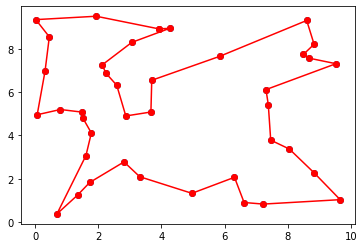

Total Cost: 51.3426
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 4


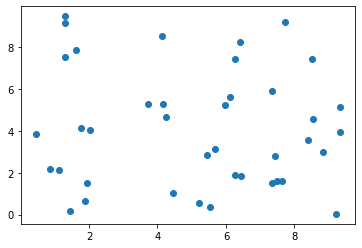

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x74ccfc12
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 207.7622499

Root relaxation: objective 3.813803e+01, 116 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   38.13803    0   80  207.76225   38.13803  81.6%     -    0s
H    0     0                      62.33883

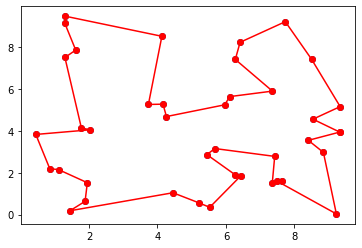

Total Cost: 51.8421
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 5


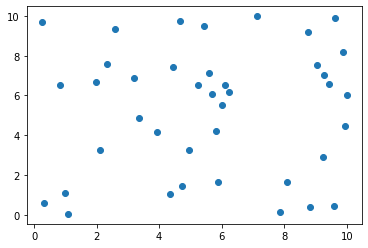

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x04ff8973
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [4e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 225.6079840

Root relaxation: objective 4.765385e+01, 121 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.65385    0   76  225.60798   47.65385  78.9%     -    0s
H    0     0                      74.85418

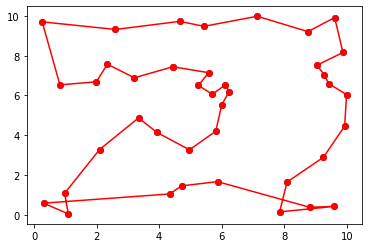

Total Cost: 56.0799
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 6


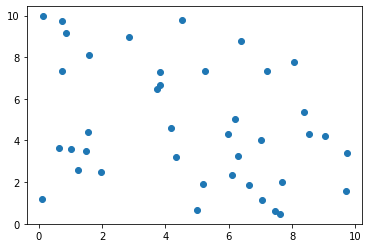

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0xb00ae11a
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 201.9603506

Root relaxation: objective 4.281262e+01, 127 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.81262    0   80  201.96035   42.81262  78.8%     -    0s
H    0     0                      64.38460

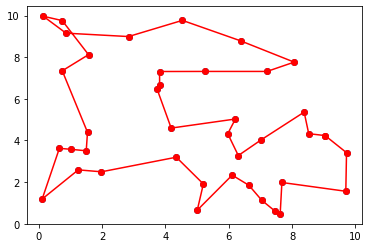

Total Cost: 54.2368
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 7


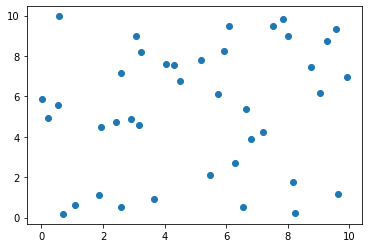

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0xf595b2d7
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 200.7176523

Root relaxation: objective 4.178819e+01, 128 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.78819    0   81  200.71765   41.78819  79.2%     -    0s
     0     0   47.75729    0  102  200.717

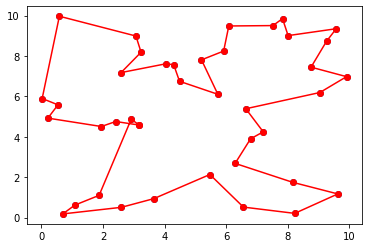

Total Cost: 55.6979
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 8


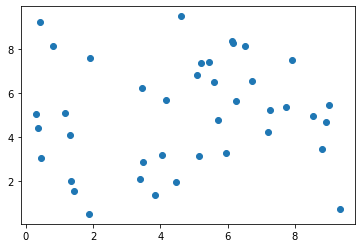

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x045f4226
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 180.3736105

Root relaxation: objective 4.222891e+01, 130 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.22891    0   70  180.37361   42.22891  76.6%     -    0s
H    0     0                      67.52825

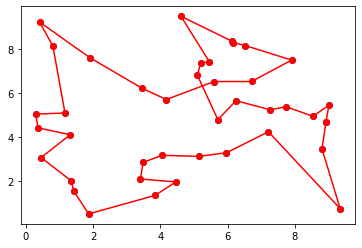

Total Cost: 51.6828
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 9


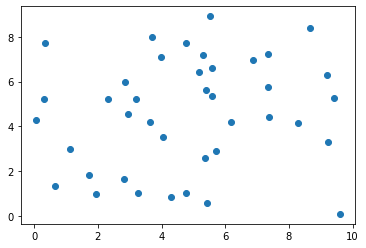

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x8b00a622
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 191.7741031
Found heuristic solution: objective 182.8418684

Root relaxation: objective 4.783118e+01, 156 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.83118    0   73  182.84187   47.83118  73.8%     - 

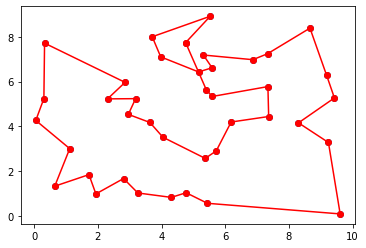

Total Cost: 54.9498
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
40 customers, iteration 10


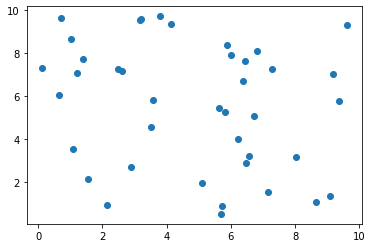

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1640 rows, 1639 columns and 7644 nonzeros
Model fingerprint: 0x3c5872f4
Variable types: 0 continuous, 1639 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 78 rows and 40 columns
Presolve time: 0.01s
Presolved: 1562 rows, 1599 columns, 7566 nonzeros
Variable types: 0 continuous, 1599 integer (1560 binary)
Found heuristic solution: objective 175.8561730

Root relaxation: objective 4.001119e+01, 149 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   40.01119    0   70  175.85617   40.01119  77.2%     -    0s
H    0     0                      65.46789

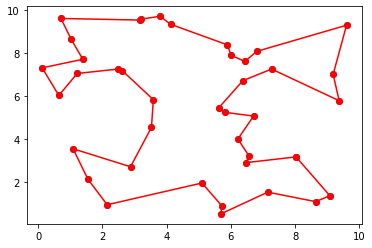

Total Cost: 51.7569
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 1


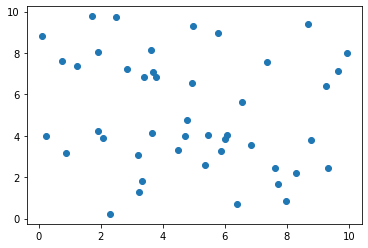

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x4d5d654a
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 227.6338562
Found heuristic solution: objective 222.1534646

Root relaxation: objective 4.742031e+01, 163 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.42031    0   88  222.15346   47.42031  78.7%     - 

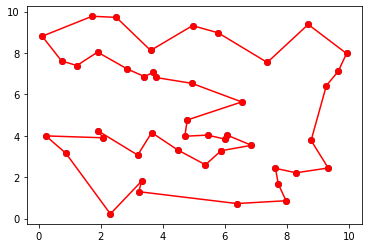

Total Cost: 57.1667
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 2


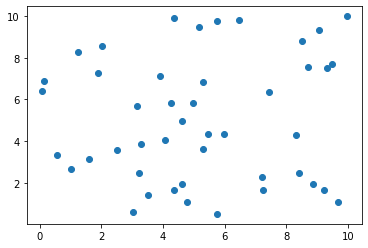

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x1a5655b0
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 239.4152606
Found heuristic solution: objective 221.4674868

Root relaxation: objective 4.280708e+01, 142 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.80708    0   70  221.46749   42.80708  80.7%     - 

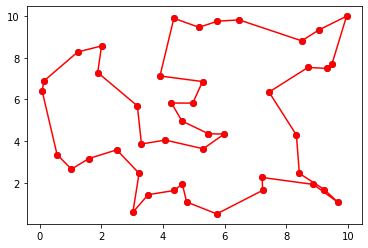

Total Cost: 55.7364
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 3


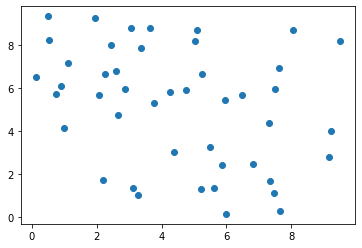

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x17f55e48
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [4e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 194.3555945

Root relaxation: objective 4.429937e+01, 142 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   44.29937    0   67  194.35559   44.29937  77.2%     -    0s
     0     0   50.61555    0  100  194.355

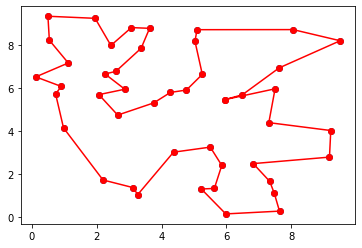

Total Cost: 54.9278
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 4


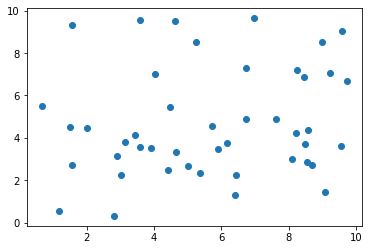

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0xb194a2bc
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 215.4585817

Root relaxation: objective 4.586485e+01, 166 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   45.86485    0   89  215.45858   45.86485  78.7%     -    0s
     0     0   52.70696    0   97  215.458

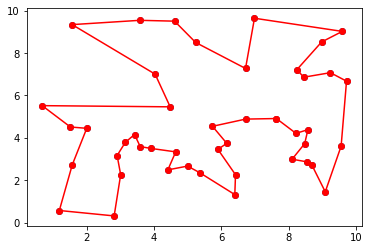

Total Cost: 56.2393
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 5


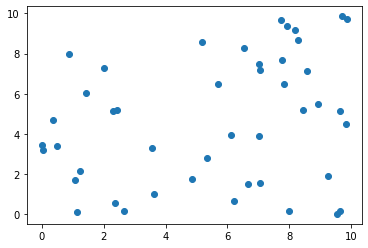

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0xf98482d0
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 283.9014118
Found heuristic solution: objective 237.7347637

Root relaxation: objective 4.169960e+01, 167 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.69960    0   85  237.73476   41.69960  82.5%     - 

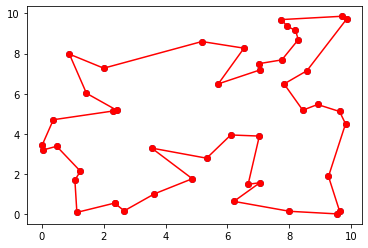

Total Cost: 56.3917
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 6


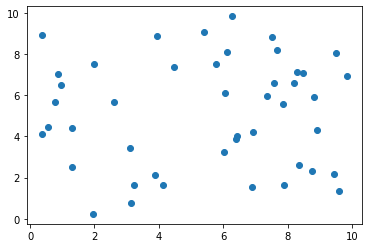

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x2470d802
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 220.3679674

Root relaxation: objective 4.648187e+01, 176 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.48187    0   96  220.36797   46.48187  78.9%     -    0s
     0     0   52.22122    0  107  220.367

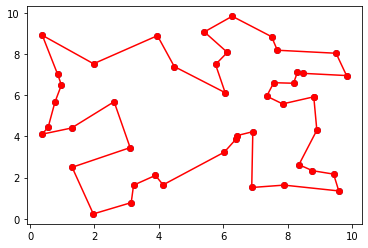

Total Cost: 55.5786
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 7


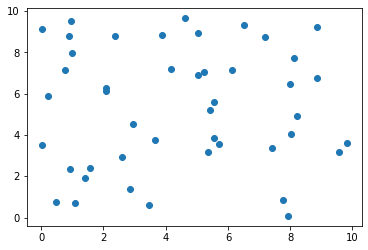

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x4b479b87
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 211.7191711

Root relaxation: objective 4.217209e+01, 175 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.17209    0   77  211.71917   42.17209  80.1%     -    0s
     0     0   55.40400    0  104  211.719

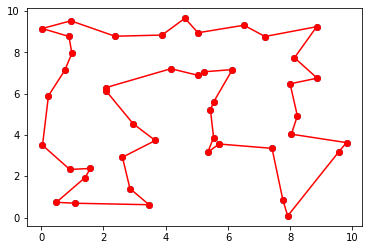

Total Cost: 56.7274
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 8


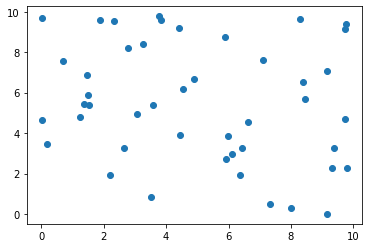

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x71ccb90b
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 246.7951713
Found heuristic solution: objective 240.1333270

Root relaxation: objective 4.611033e+01, 138 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.11033    0   90  240.13333   46.11033  80.8%     - 

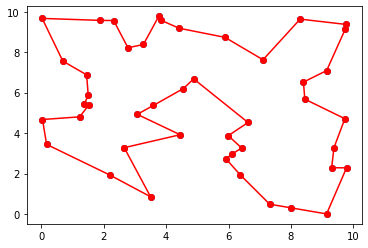

Total Cost: 55.2861
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 9


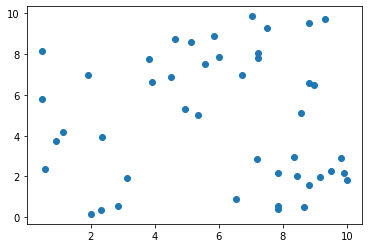

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0xfe1f941e
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 260.7581583
Found heuristic solution: objective 242.1249971

Root relaxation: objective 4.160672e+01, 152 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.60672    0   75  242.12500   41.60672  82.8%     - 

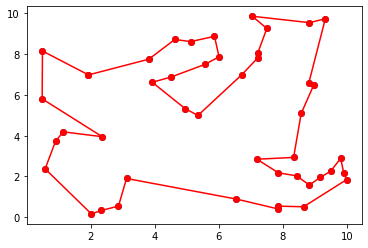

Total Cost: 53.8935
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
45 customers, iteration 10


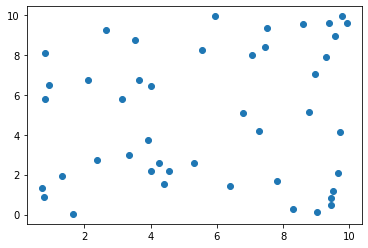

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2070 rows, 2069 columns and 9724 nonzeros
Model fingerprint: 0x676d7ed5
Variable types: 0 continuous, 2069 integer (2025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 88 rows and 45 columns
Presolve time: 0.01s
Presolved: 1982 rows, 2024 columns, 9636 nonzeros
Variable types: 0 continuous, 2024 integer (1980 binary)
Found heuristic solution: objective 277.1311450
Found heuristic solution: objective 244.9178288

Root relaxation: objective 4.408367e+01, 165 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   44.08367    0   83  244.91783   44.08367  82.0%     - 

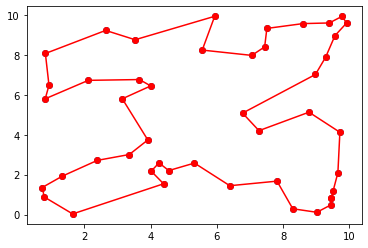

Total Cost: 53.2748
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 1


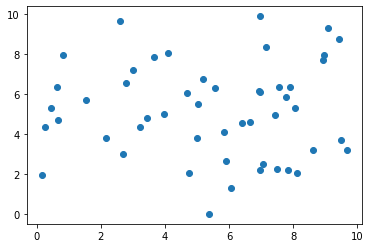

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0xba990a17
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 226.1561714

Root relaxation: objective 4.275422e+01, 167 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   42.75422    0   93  226.15617   42.75422  81.1%     -    0s
     0     0   50.68656    0   98  226.1

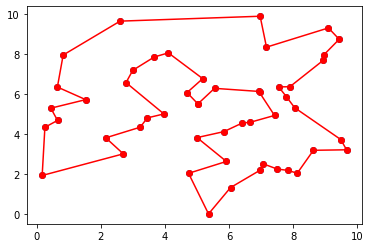

Total Cost: 56.7708
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 2


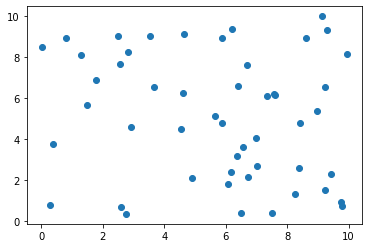

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x33f2a510
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 281.2152236

Root relaxation: objective 4.862768e+01, 155 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   48.62768    0   88  281.21522   48.62768  82.7%     -    0s
H    0     0                      73.797

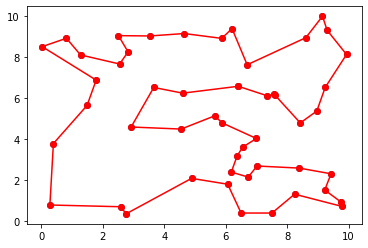

Total Cost: 60.3435
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 3


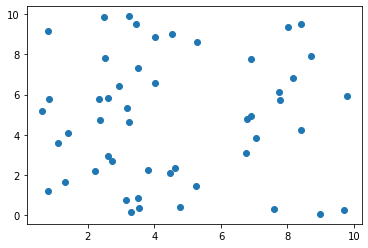

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x13072430
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.01s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 265.8974556

Root relaxation: objective 4.306807e+01, 166 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.06807    0  102  265.89746   43.06807  83.8%     -    0s
     0     0   51.90829    0  102  265.8

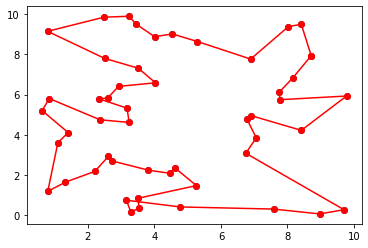

Total Cost: 57.0534
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 4


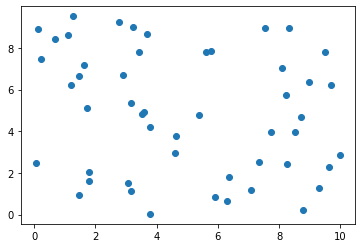

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x01d488a5
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 258.7877462

Root relaxation: objective 4.708662e+01, 174 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.08662    0   93  258.78775   47.08662  81.8%     -    0s
     0     0   54.10950    0  113  258.7

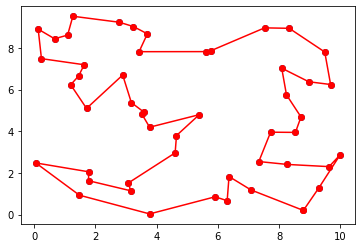

Total Cost: 58.5115
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 5


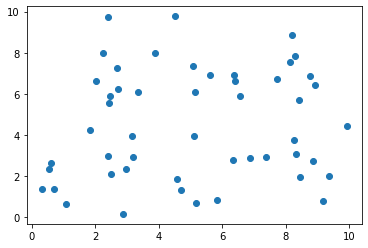

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0xceb60326
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.01s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 254.2509221
Found heuristic solution: objective 252.4155684

Root relaxation: objective 4.774181e+01, 167 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.74181    0   87  252.41557   47.74181  81.1%     

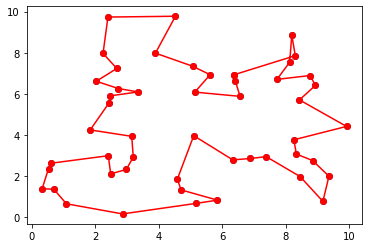

Total Cost: 55.4016
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 6


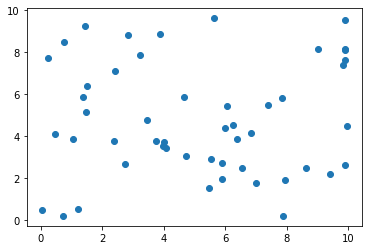

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0xd504b72d
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.01s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 273.8788251
Found heuristic solution: objective 272.2557029

Root relaxation: objective 4.558607e+01, 174 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   45.58607    0   63  272.25570   45.58607  83.3%     

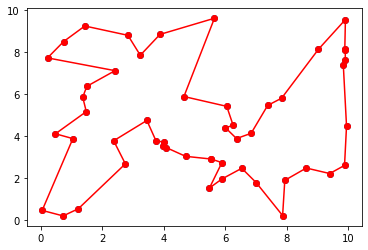

Total Cost: 58.3779
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 7


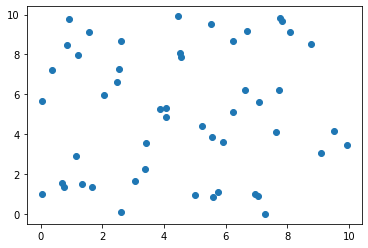

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x6e2d5e4e
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 233.9732416

Root relaxation: objective 4.408423e+01, 150 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   44.08423    0   95  233.97324   44.08423  81.2%     -    0s
     0     0   49.22683    0  100  233.9

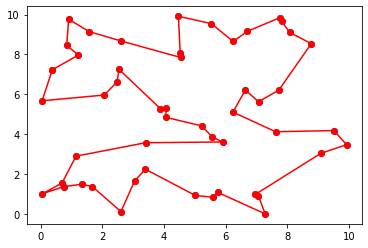

Total Cost: 57.7576
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 8


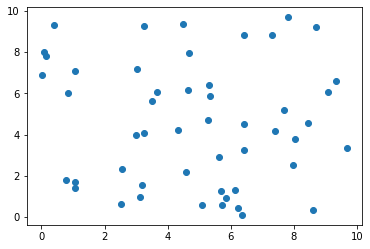

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x4c3a7807
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 253.6731801

Root relaxation: objective 4.713179e+01, 179 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.13179    0   82  253.67318   47.13179  81.4%     -    0s
     0     0   53.78565    0  119  253.6

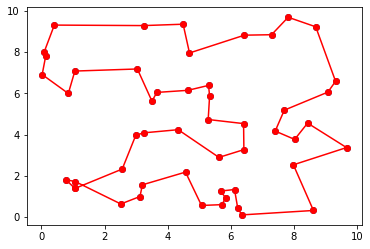

Total Cost: 58.4963
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 9


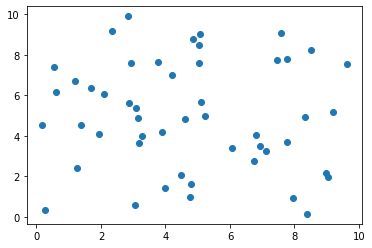

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x9dd399d4
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 227.5627094

Root relaxation: objective 4.399078e+01, 147 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.99078    0   91  227.56271   43.99078  80.7%     -    0s
     0     0   51.37086    0  108  227.5

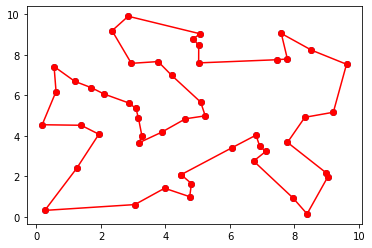

Total Cost: 55.972
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
50 customers, iteration 10


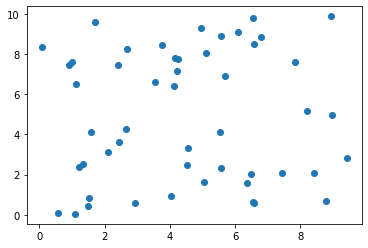

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2550 rows, 2549 columns and 12054 nonzeros
Model fingerprint: 0x5581b4d7
Variable types: 0 continuous, 2549 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 50 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)
Found heuristic solution: objective 288.7584646
Found heuristic solution: objective 246.2215921

Root relaxation: objective 4.614419e+01, 195 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.14419    0   89  246.22159   46.14419  81.3%     

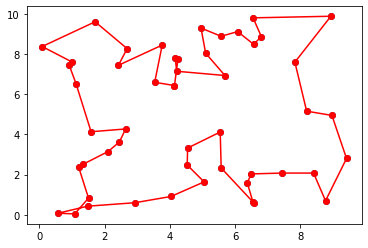

Total Cost: 58.7728
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 1


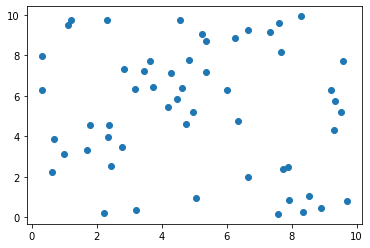

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x0b3aacff
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 280.1358075
Found heuristic solution: objective 272.3252078

Root relaxation: objective 4.980258e+01, 167 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   49.80258    0  113  272.32521   49.80258  81.7%    

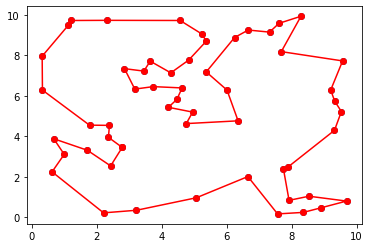

Total Cost: 59.974
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 2


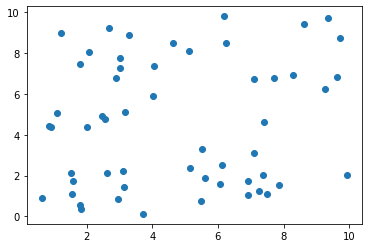

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0xf1f49462
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 298.8930335
Found heuristic solution: objective 278.4702832

Root relaxation: objective 4.652436e+01, 180 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.52436    0  105  278.47028   46.52436  83.3%    

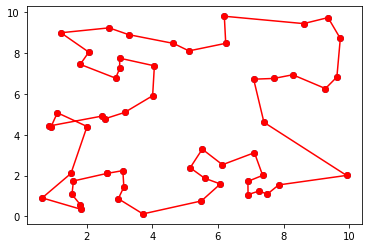

Total Cost: 57.8991
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 3


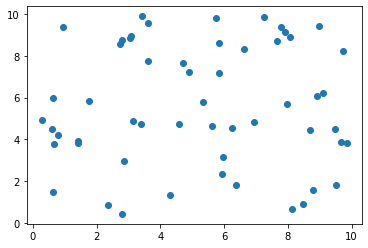

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x46e572db
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 280.7807834

Root relaxation: objective 4.658643e+01, 203 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.58643    0  106  280.78078   46.58643  83.4%     -    0s
     0     0   54.34718    0  140  280.

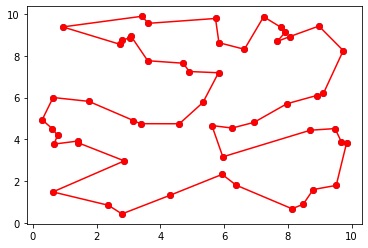

Total Cost: 59.3627
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 4


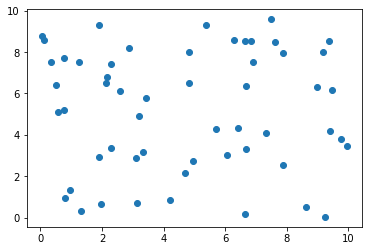

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0xef71e6bc
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 277.8365708

Root relaxation: objective 4.605536e+01, 206 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.05536    0   83  277.83657   46.05536  83.4%     -    0s
     0     0   55.83803    0  128  277.

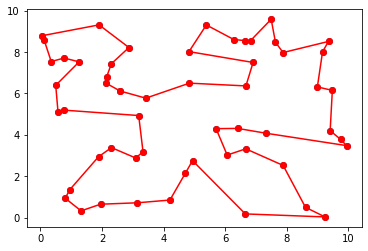

Total Cost: 62.4839
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 5


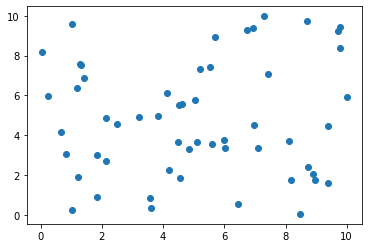

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x1838484e
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 270.9700756
Found heuristic solution: objective 254.1155386

Root relaxation: objective 4.786273e+01, 179 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.86273    0  111  254.11554   47.86273  81.2%    

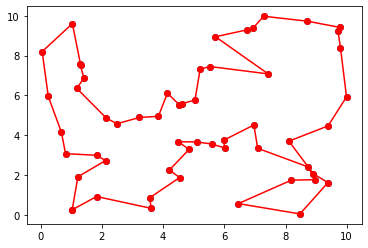

Total Cost: 61.6132
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 6


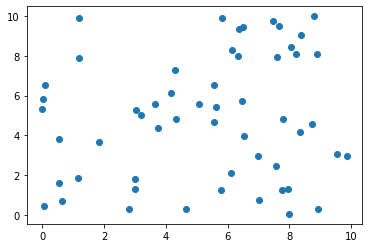

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x33d81e62
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 273.3954521

Root relaxation: objective 4.651248e+01, 182 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.51248    0  100  273.39545   46.51248  83.0%     -    0s
     0     0   55.80703    0  123  273.

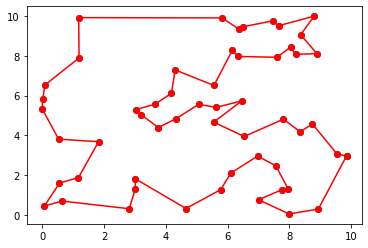

Total Cost: 61.5995
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 7


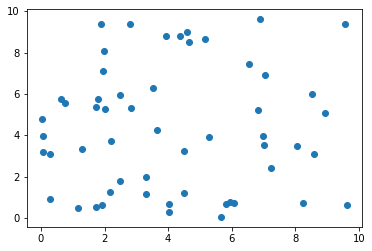

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x334fd45f
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 323.2006835
Found heuristic solution: objective 294.7283301

Root relaxation: objective 4.600925e+01, 187 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.00925    0  100  294.72833   46.00925  84.4%    

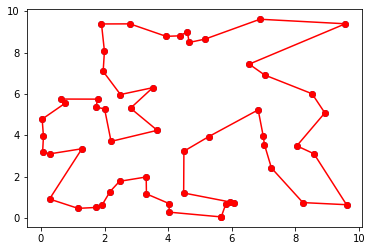

Total Cost: 61.1772
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 8


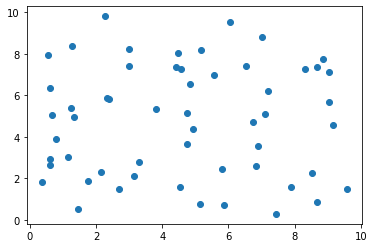

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x73630b30
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 289.8050173
Found heuristic solution: objective 250.2094839

Root relaxation: objective 5.034149e+01, 227 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   50.34149    0  101  250.20948   50.34149  79.9%    

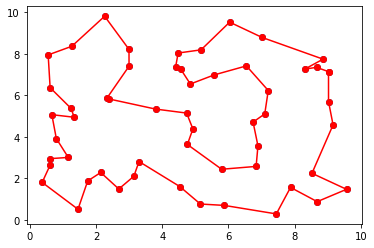

Total Cost: 58.1296
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 9


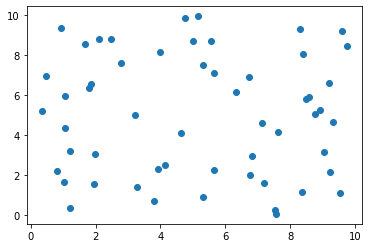

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0x9ce1cea1
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 292.9538794

Root relaxation: objective 4.655643e+01, 217 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.55643    0  112  292.95388   46.55643  84.1%     -    0s
     0     0   57.75066    0  129  292.

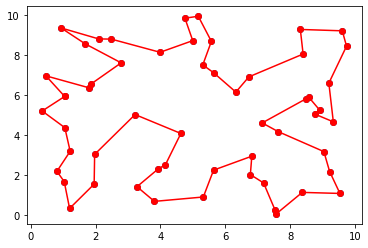

Total Cost: 62.341
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
55 customers, iteration 10


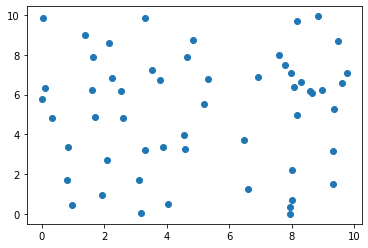

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3080 rows, 3079 columns and 14634 nonzeros
Model fingerprint: 0xd628e6ac
Variable types: 0 continuous, 3079 integer (3025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 108 rows and 55 columns
Presolve time: 0.02s
Presolved: 2972 rows, 3024 columns, 14526 nonzeros
Variable types: 0 continuous, 3024 integer (2970 binary)
Found heuristic solution: objective 313.6707068
Found heuristic solution: objective 296.8762110

Root relaxation: objective 5.677531e+01, 197 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.77531    0  118  296.87621   56.77531  80.9%    

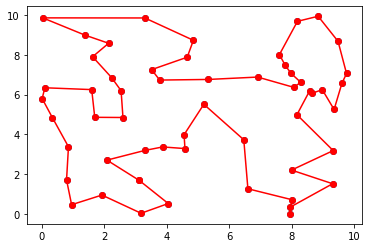

Total Cost: 66.7146
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 1


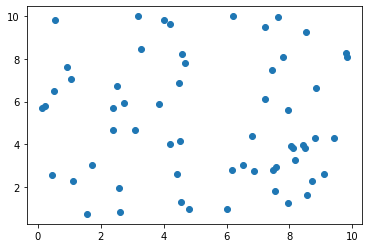

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0xc4ba35f6
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 307.0970987

Root relaxation: objective 4.988074e+01, 211 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   49.88074    0   99  307.09710   49.88074  83.8%     -    0s
     0     0   57.35777    0  111  307.

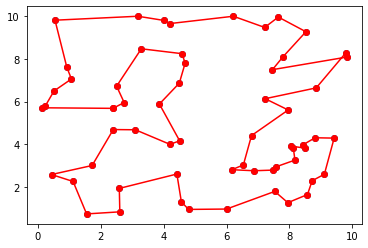

Total Cost: 62.4822
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 2


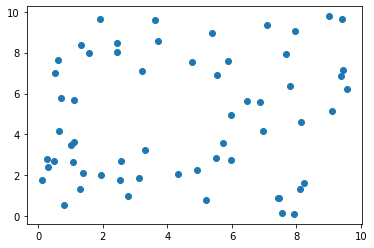

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0xc4db127d
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 327.2016689

Root relaxation: objective 4.682254e+01, 198 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.82254    0  103  327.20167   46.82254  85.7%     -    0s
     0     0   55.35702    0  148  327.

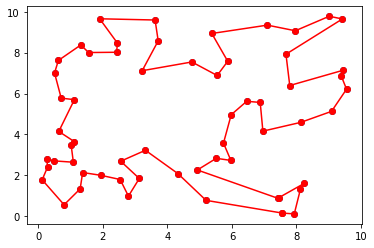

Total Cost: 61.051
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 3


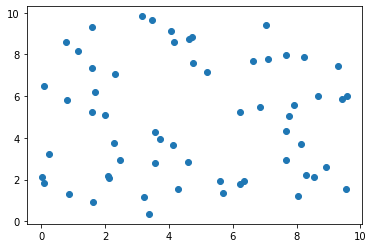

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0x94852318
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 332.0235946

Root relaxation: objective 4.508212e+01, 200 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   45.08212    0  116  332.02359   45.08212  86.4%     -    0s
     0     0   53.66026    0  124  332.

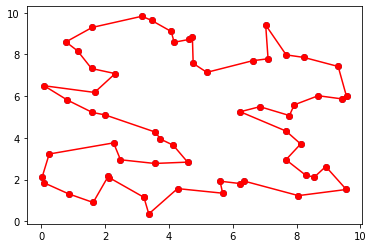

Total Cost: 56.5413
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 4


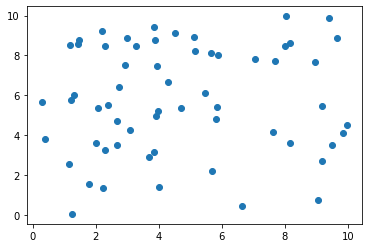

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0xd79a9081
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 307.2951606

Root relaxation: objective 5.055254e+01, 208 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   50.55254    0  108  307.29516   50.55254  83.5%     -    0s
     0     0   57.72060    0  155  307.

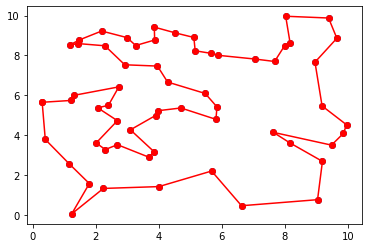

Total Cost: 61.2631
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 5


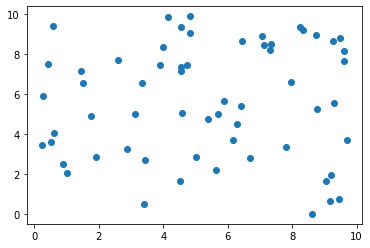

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0x5cadeb56
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 294.6647065

Root relaxation: objective 5.075835e+01, 214 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   50.75835    0  104  294.66471   50.75835  82.8%     -    0s
H    0     0                      79.43

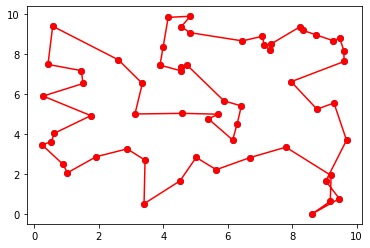

Total Cost: 63.2624
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 6


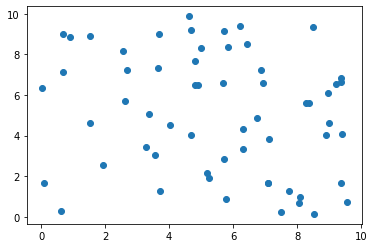

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0x87a46518
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [9e-03, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 284.8525539

Root relaxation: objective 5.049607e+01, 187 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   50.49607    0  117  284.85255   50.49607  82.3%     -    0s
     0     0   59.07674    0  131  284.

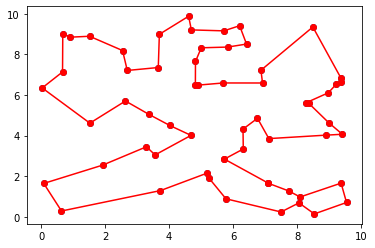

Total Cost: 63.8157
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 7


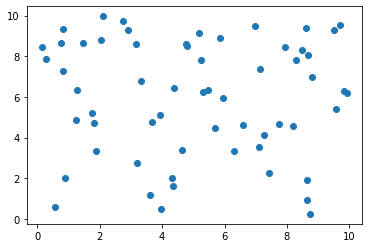

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0x096f76f4
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 333.7295543
Found heuristic solution: objective 299.8344633

Root relaxation: objective 4.880606e+01, 209 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   48.80606    0  115  299.83446   48.80606  83.7%    

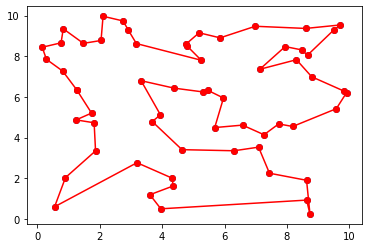

Total Cost: 64.1045
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 8


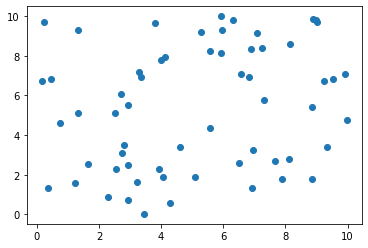

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0x0fb8e130
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 333.1449147
Found heuristic solution: objective 301.0815714

Root relaxation: objective 4.677116e+01, 207 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   46.77116    0  106  301.08157   46.77116  84.5%    

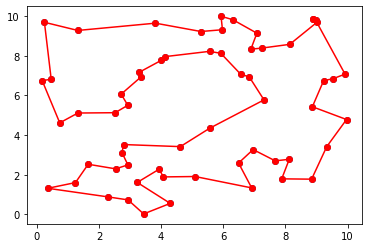

Total Cost: 62.6612
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 9


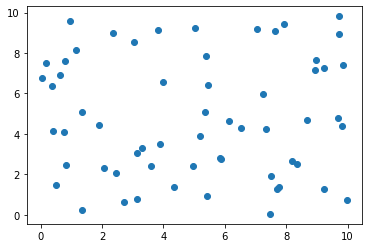

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0xa7045dd6
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 329.8027927
Found heuristic solution: objective 320.5915256

Root relaxation: objective 5.223962e+01, 185 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.23962    0  110  320.59153   52.23962  83.7%    

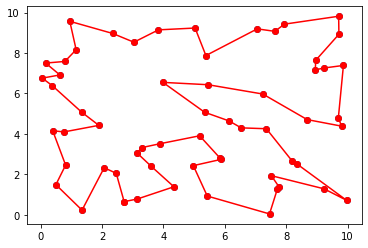

Total Cost: 66.883
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
60 customers, iteration 10


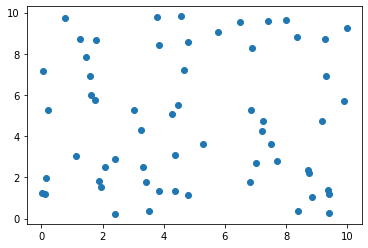

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3660 rows, 3659 columns and 17464 nonzeros
Model fingerprint: 0xf7edbab7
Variable types: 0 continuous, 3659 integer (3600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 118 rows and 60 columns
Presolve time: 0.02s
Presolved: 3542 rows, 3599 columns, 17346 nonzeros
Variable types: 0 continuous, 3599 integer (3540 binary)
Found heuristic solution: objective 350.5157423
Found heuristic solution: objective 318.2837916

Root relaxation: objective 5.218131e+01, 184 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.18131    0  106  318.28379   52.18131  83.6%    

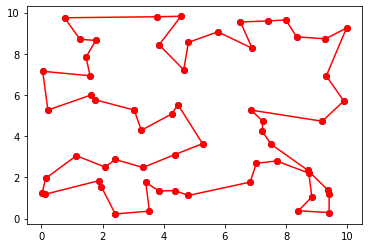

Total Cost: 67.0677
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 1


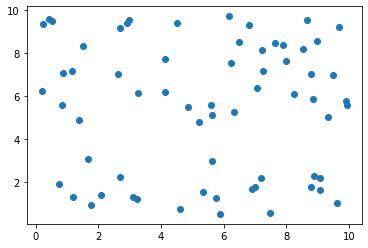

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0xf24d5bb9
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.150899e+01, 231 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   51.50899    0  133          -   51.50899      -     -    0s
     0     0   56.46264    0  134          -   56.46264      -     -    0s
     0     0

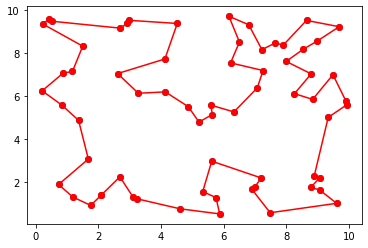

Total Cost: 62.4862
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 2


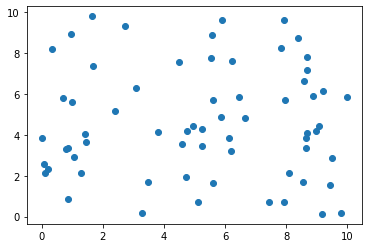

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x4b69532c
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.396651e+01, 203 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   53.96651    0  110          -   53.96651      -     -    0s
H    0     0                     287.3465540   53.96651  81.2%     -    0s
     0     0

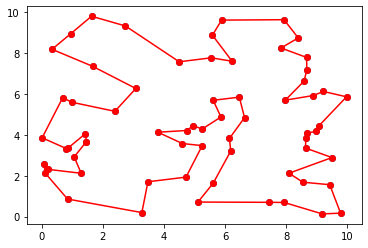

Total Cost: 66.3239
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 3


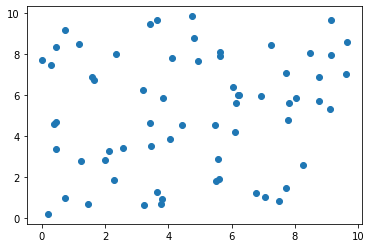

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x5389b95c
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 4.737839e+01, 219 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.37839    0  120          -   47.37839      -     -    0s
H    0     0                     340.2433691   47.37839  86.1%     -    0s
H    0     0

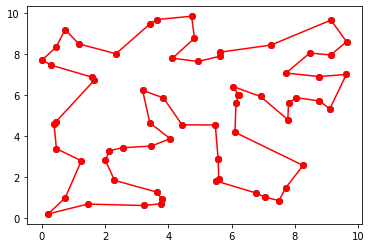

Total Cost: 63.7779
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 4


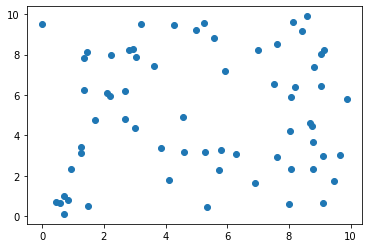

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x9764da33
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.02s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.421471e+01, 206 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.21471    0  109          -   54.21471      -     -    0s
H    0     0                     327.7246335   54.21471  83.5%     -    0s
H    0     0

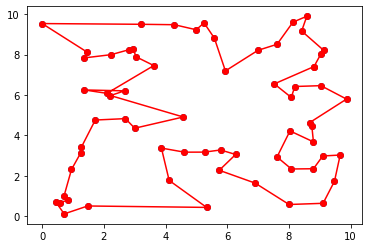

Total Cost: 65.9105
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 5


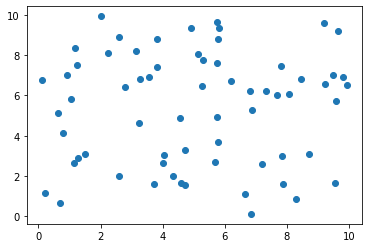

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x976d54b5
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.02s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.242306e+01, 225 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.42306    0  117          -   52.42306      -     -    0s
H    0     0                     323.0591738   52.42306  83.8%     -    0s
H    0     0

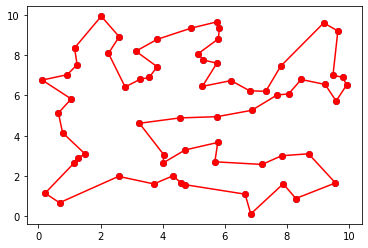

Total Cost: 65.0787
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 6


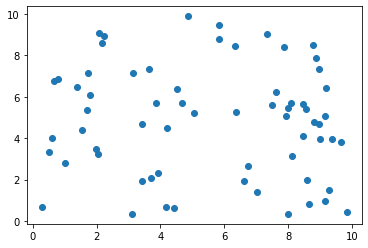

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x740900ce
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 4.706583e+01, 206 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.06583    0  114          -   47.06583      -     -    0s
H    0     0                     284.3896505   47.06583  83.5%     -    0s
     0     0

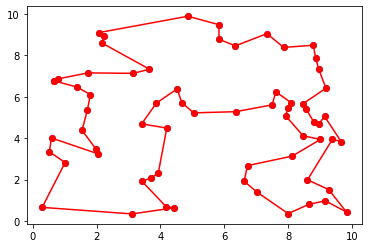

Total Cost: 60.6635
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 7


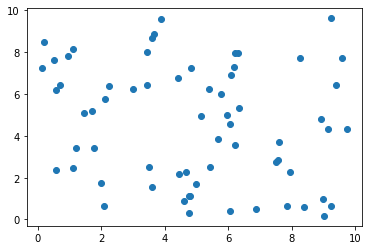

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0xd0291f66
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.02s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 4.351980e+01, 225 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.51980    0  122          -   43.51980      -     -    0s
H    0     0                     330.6826961   43.51980  86.8%     -    0s
     0     0

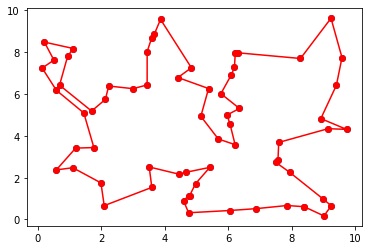

Total Cost: 60.8509
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 8


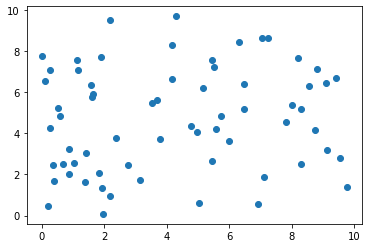

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0xe5d4b3ec
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.547118e+01, 207 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   55.47118    0  125          -   55.47118      -     -    0s
H    0     0                     357.0168788   55.47118  84.5%     -    0s
H    0     0

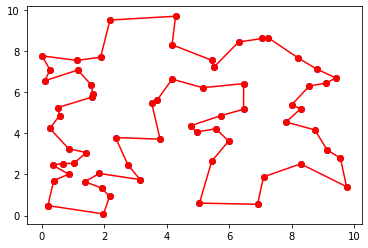

Total Cost: 62.7836
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 9


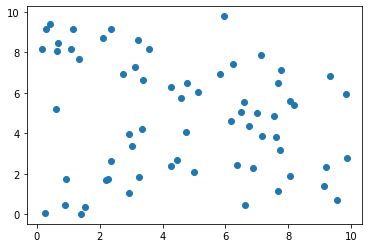

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x70b0d29f
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.02s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 5.258096e+01, 246 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.58096    0  114          -   52.58096      -     -    0s
H    0     0                     268.8530054   52.58096  80.4%     -    0s
     0     0

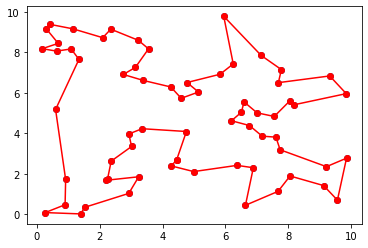

Total Cost: 62.8832
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
65 customers, iteration 10


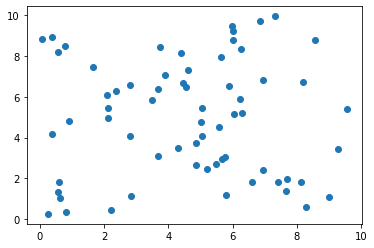

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4290 rows, 4289 columns and 20544 nonzeros
Model fingerprint: 0x35076f93
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 128 rows and 65 columns
Presolve time: 0.02s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)

Root relaxation: objective 4.723022e+01, 218 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   47.23022    0  110          -   47.23022      -     -    0s
H    0     0                     267.3340445   47.23022  82.3%     -    0s
H    0     0

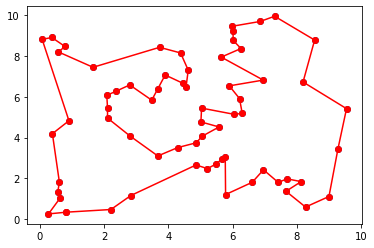

Total Cost: 60.7983
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 1


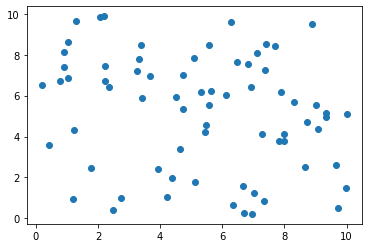

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x24736b61
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.254206e+01, 213 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.54206    0  114          -   52.54206      -     -    0s
H    0     0                     324.4366706   52.54206  83.8%     -    0s
H    0     0

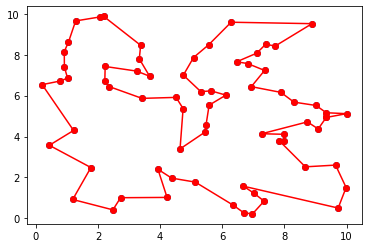

Total Cost: 64.7501
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 2


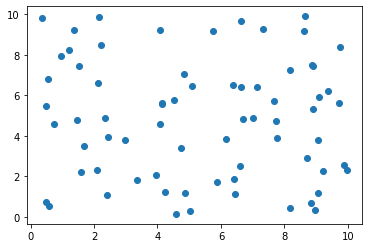

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0xd3362c93
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.697404e+01, 251 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.97404    0  124          -   56.97404      -     -    0s
H    0     0                     363.8488978   56.97404  84.3%     -    0s
     0     0

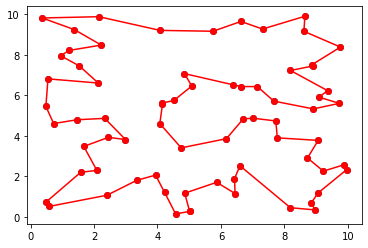

Total Cost: 67.7634
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 3


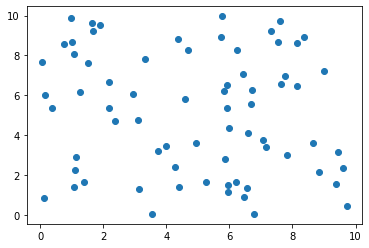

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0xb387c928
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.790154e+01, 222 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.90154    0  105          -   57.90154      -     -    0s
H    0     0                     317.4500633   57.90154  81.8%     -    0s
     0     0

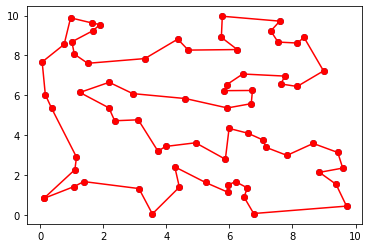

Total Cost: 69.3148
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 4


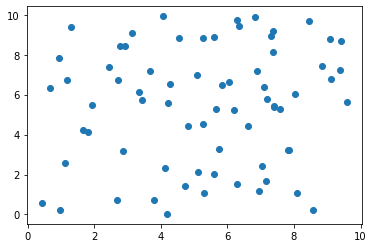

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x2b5819b6
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [2e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.580510e+01, 238 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   55.80510    0  132          -   55.80510      -     -    0s
H    0     0                     297.0639703   55.80510  81.2%     -    0s
     0     0

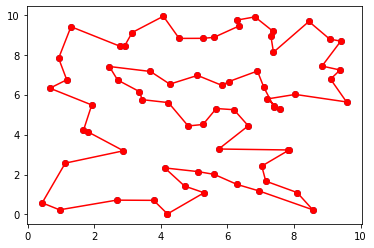

Total Cost: 66.1379
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 5


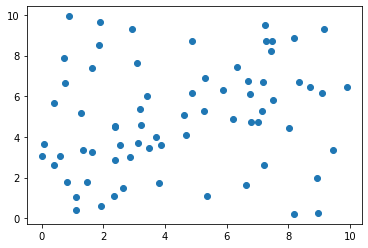

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x6e6aabb4
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.805838e+01, 261 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.05838    0  108          -   58.05838      -     -    0s
H    0     0                     294.2187384   58.05838  80.3%     -    0s
     0     0

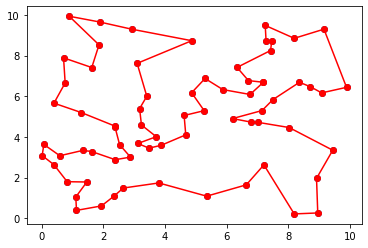

Total Cost: 67.3643
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 6


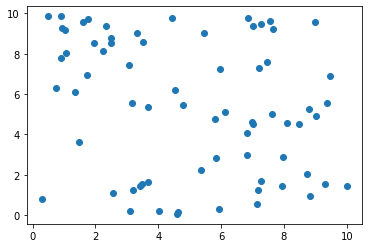

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x91610509
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.225295e+01, 284 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.25295    0  112          -   52.25295      -     -    0s
H    0     0                     351.5941754   52.25295  85.1%     -    0s
H    0     0

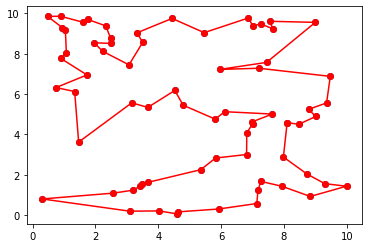

Total Cost: 66.0191
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 7


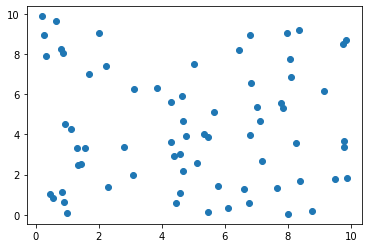

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0xbfa58cd3
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 4.998765e+01, 274 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   49.98765    0  139          -   49.98765      -     -    0s
H    0     0                     338.8188023   49.98765  85.2%     -    0s
     0     0

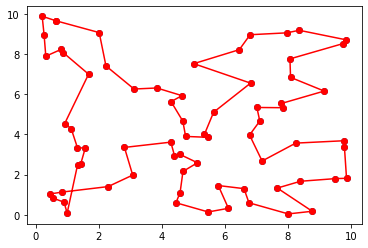

Total Cost: 67.6015
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 8


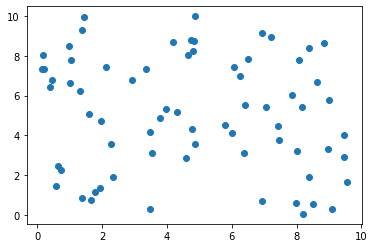

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x572f5c7b
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.298370e+01, 232 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.98370    0  114          -   52.98370      -     -    0s
H    0     0                     326.1623846   52.98370  83.8%     -    0s
     0     0

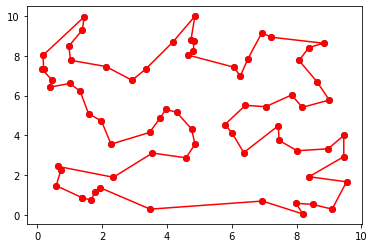

Total Cost: 65.6869
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 9


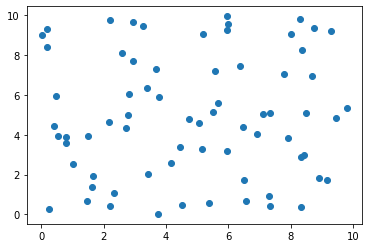

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x1752031f
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 5.401972e+01, 226 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.01972    0  131          -   54.01972      -     -    0s
H    0     0                     356.5253979   54.01972  84.8%     -    0s
     0     0

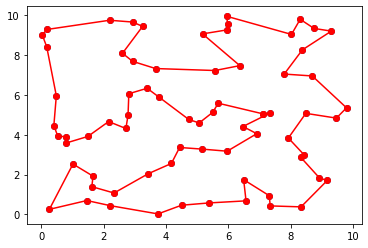

Total Cost: 68.2115
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
70 customers, iteration 10


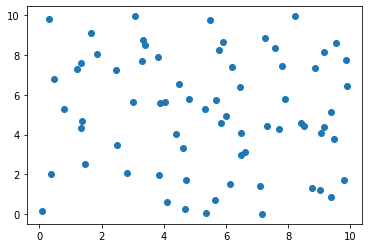

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4970 rows, 4969 columns and 23874 nonzeros
Model fingerprint: 0x1f60ac57
Variable types: 0 continuous, 4969 integer (4900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 138 rows and 70 columns
Presolve time: 0.03s
Presolved: 4832 rows, 4899 columns, 23736 nonzeros
Variable types: 0 continuous, 4899 integer (4830 binary)

Root relaxation: objective 6.250612e+01, 249 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   62.50612    0  125          -   62.50612      -     -    0s
H    0     0                     330.8718498   62.50612  81.1%     -    0s
     0     0

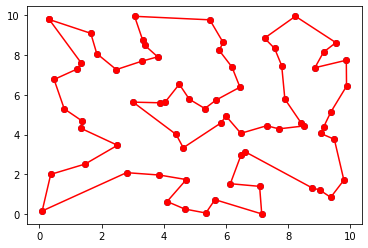

Total Cost: 74.6993
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 1


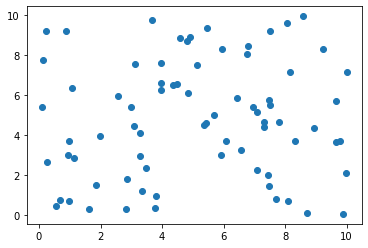

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x9392d85c
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.04s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.844467e+01, 250 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.44467    0  153          -   58.44467      -     -    0s
     0     0   64.01933    0  162          -   64.01933      -     -    0s
     0     0

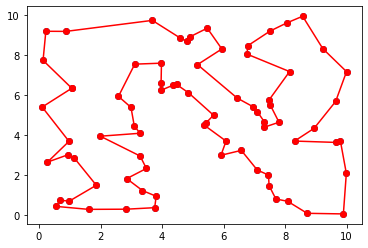

Total Cost: 70.5011
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 2


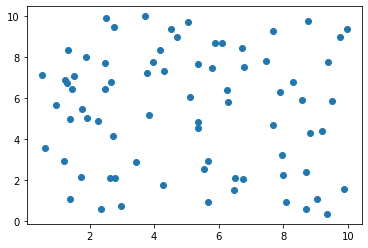

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x14d23f91
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.679464e+01, 297 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.79464    0  119          -   56.79464      -     -    0s
H    0     0                     336.7554215   56.79464  83.1%     -    0s
     0     0

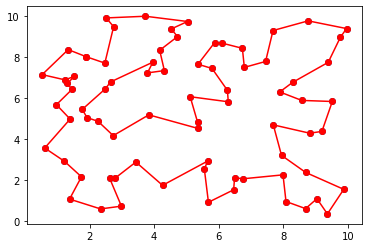

Total Cost: 70.6576
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 3


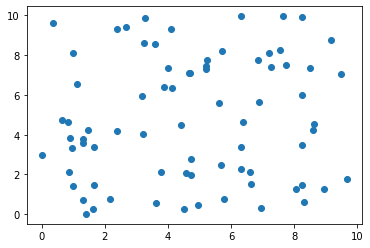

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x657a131c
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 6.064968e+01, 296 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.64968    0  124          -   60.64968      -     -    0s
H    0     0                     393.2356425   60.64968  84.6%     -    0s
     0     0

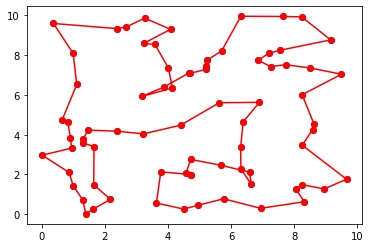

Total Cost: 69.3667
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 4


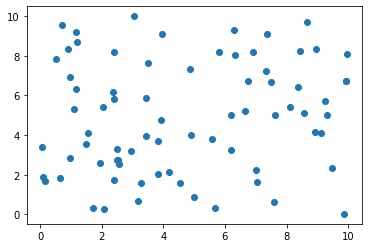

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x79d77019
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 6.006011e+01, 271 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.06011    0  142          -   60.06011      -     -    0s
H    0     0                     393.6822462   60.06011  84.7%     -    0s
H    0     0

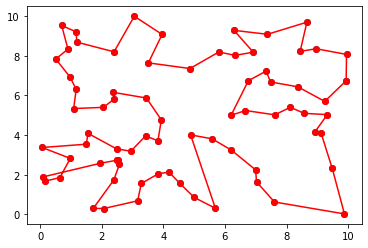

Total Cost: 73.7098
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 5


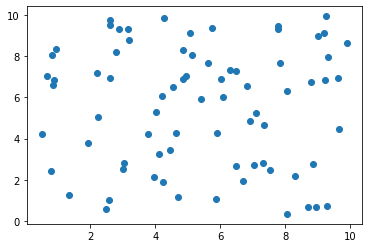

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0xd420755c
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.248012e+01, 263 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.48012    0  139          -   52.48012      -     -    0s
H    0     0                     381.1504523   52.48012  86.2%     -    0s
     0     0

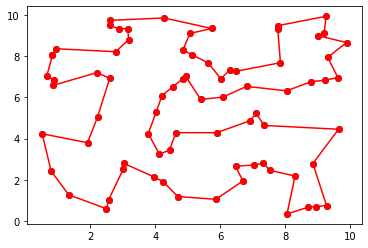

Total Cost: 66.8447
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 6


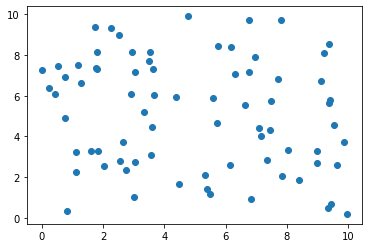

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x2abe0bcf
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.04s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 6.007859e+01, 263 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.07859    0  152          -   60.07859      -     -    0s
     0     0   65.18045    0  182          -   65.18045      -     -    0s
     0     0

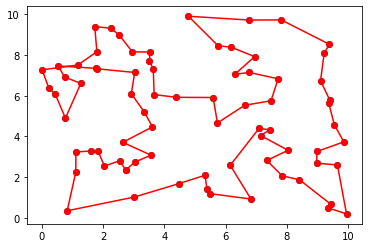

Total Cost: 72.0074
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 7


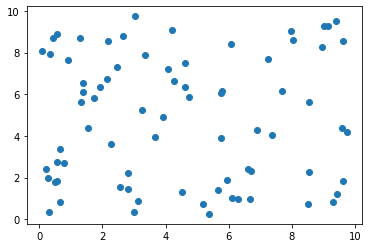

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x777b5113
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.04s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 4.875790e+01, 266 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   48.75790    0  150          -   48.75790      -     -    0s
     0     0   60.52871    0  186          -   60.52871      -     -    0s
     0     0

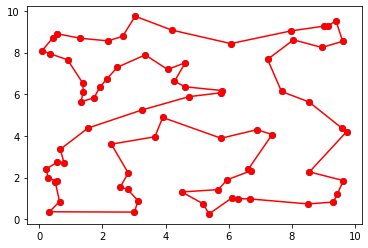

Total Cost: 66.8907
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 8


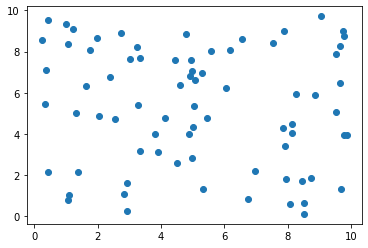

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0xfe66ae77
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.496130e+01, 257 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.96130    0  140          -   54.96130      -     -    0s
H    0     0                     364.2633293   54.96130  84.9%     -    0s
     0     0

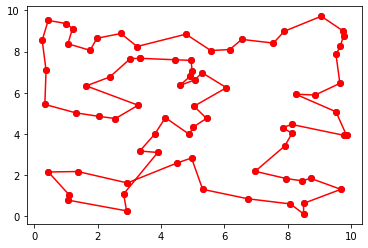

Total Cost: 68.7814
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 9


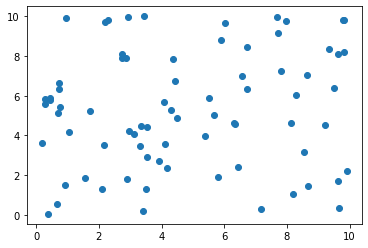

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x6b5c9036
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.412750e+01, 266 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.12750    0  154          -   54.12750      -     -    0s
     0     0   66.17572    0  187          -   66.17572      -     -    0s
     0     0

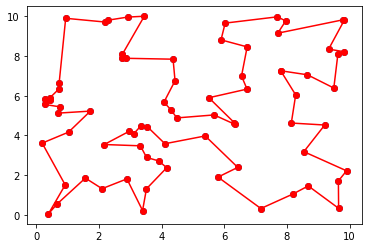

Total Cost: 73.6688
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
75 customers, iteration 10


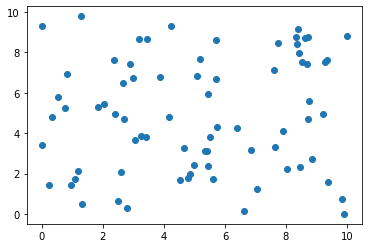

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5700 rows, 5699 columns and 27454 nonzeros
Model fingerprint: 0x6ce69a84
Variable types: 0 continuous, 5699 integer (5625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 148 rows and 75 columns
Presolve time: 0.03s
Presolved: 5552 rows, 5624 columns, 27306 nonzeros
Variable types: 0 continuous, 5624 integer (5550 binary)

Root relaxation: objective 5.751530e+01, 257 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.51530    0  150          -   57.51530      -     -    0s
H    0     0                     371.5595309   57.51530  84.5%     -    0s
     0     0

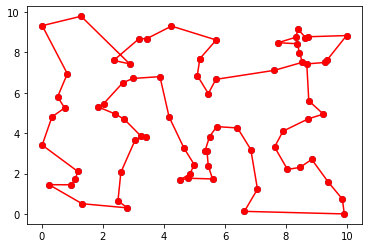

Total Cost: 71.2698
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 1


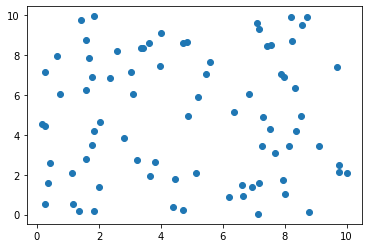

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xb4fc5d62
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.636556e+01, 292 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.36556    0  166          -   56.36556      -     -    0s
     0     0   65.85082    0  170          -   65.85082      -     -    0s
     0     0

 61823 26897   72.85010  156  179   73.95949   70.12765  5.18%  21.3  965s
 62891 27274   72.59307  128  174   73.95949   70.13328  5.17%  21.3  970s
 66374 29006   70.77909  159  198   73.95949   70.18347  5.11%  21.1  975s
 70911 31308   72.04982  128  113   73.95949   70.21745  5.06%  20.9  980s
 72972 32388   71.56098  198  147   73.95949   70.22397  5.05%  20.9  985s
 75712 33616   70.59770   94  175   73.95949   70.25463  5.01%  20.8  990s

Cutting planes:
  Learned: 32
  Gomory: 13
  Cover: 2
  Implied bound: 9
  Projected implied bound: 3
  MIR: 30
  StrongCG: 6
  Flow cover: 213
  Inf proof: 6
  Zero half: 58
  RLT: 2
  Relax-and-lift: 2

Explored 76512 nodes (1589533 simplex iterations) in 990.25 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 73.9595 73.9624 74.0156 ... 77.485

Optimal solution found (tolerance 5.00e-02)
Best objective 7.395948506567e+01, best bound 7.026311490753e+01, gap 4.9978%
[80, 0.8, 73.95948506566964, 0.9244935633208705]


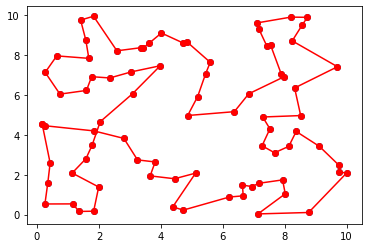

Total Cost: 73.9595
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 2


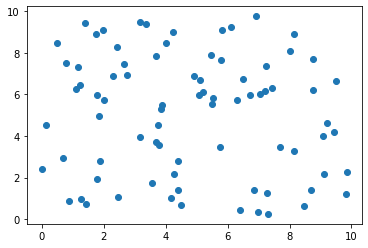

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xf6c01f07
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.260875e+01, 280 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   52.60875    0  158          -   52.60875      -     -    0s
H    0     0                     397.1344838   52.60875  86.8%     -    0s
H    0     0

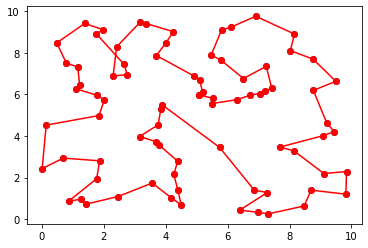

Total Cost: 68.3676
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 3


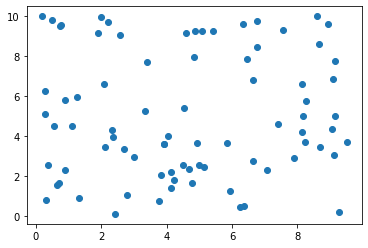

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0x9cb03c0f
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.702969e+01, 303 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.02969    0  145          -   57.02969      -     -    0s
H    0     0                     370.9928782   57.02969  84.6%     -    0s
     0     0

Best objective 7.179295131728e+01, best bound 6.836384720622e+01, gap 4.7764%
[80, 0.8, 71.7929513172774, 0.8974118914659674]


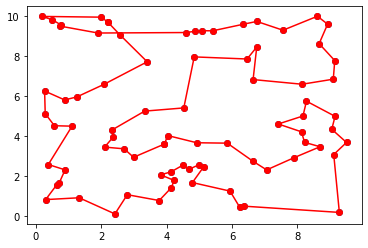

Total Cost: 71.793
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 4


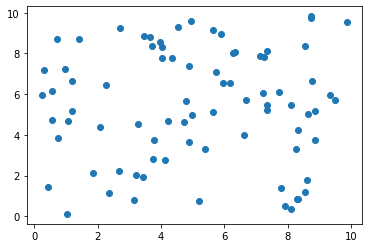

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xfbdd2737
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.15s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.352640e+01, 276 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   53.52640    0  156          -   53.52640      -     -    0s
H    0     0                     372.4987344   53.52640  85.6%     -    0s
     0     0

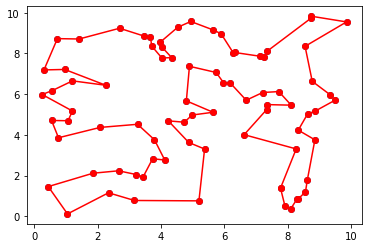

Total Cost: 69.5129
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 5


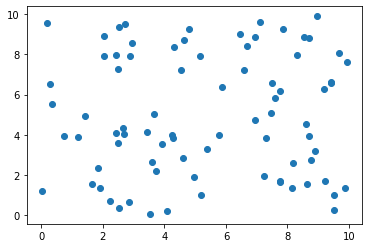

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xf3b680bc
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.852031e+01, 267 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.52031    0  163          -   58.52031      -     -    0s
H    0     0                     404.3297419   58.52031  85.5%     -    0s
     0     0

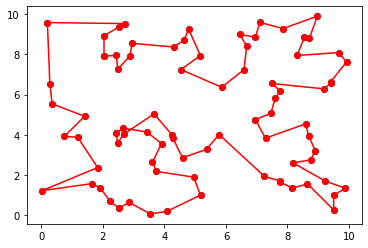

Total Cost: 72.3153
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 6


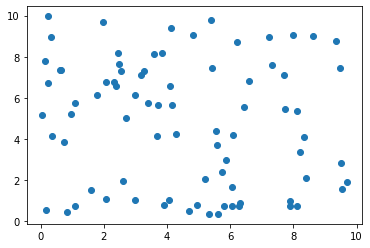

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xbaa38223
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.504723e+01, 295 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   55.04723    0  164          -   55.04723      -     -    0s
     0     0   63.10718    0  165          -   63.10718      -     -    0s
     0     0

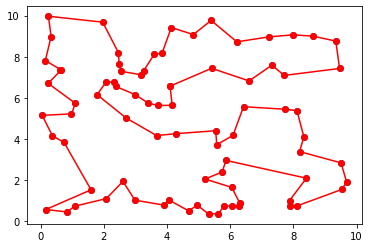

Total Cost: 69.0545
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 7


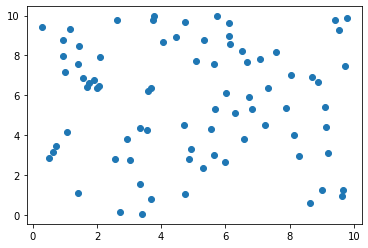

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xc7a6dfb2
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.644522e+01, 308 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.44522    0  142          -   56.44522      -     -    0s
H    0     0                     384.7699391   56.44522  85.3%     -    0s
     0     0

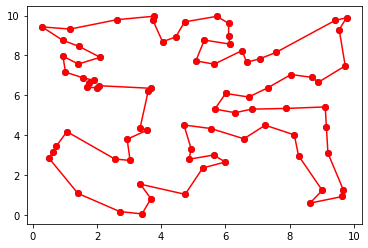

Total Cost: 70.3202
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 8


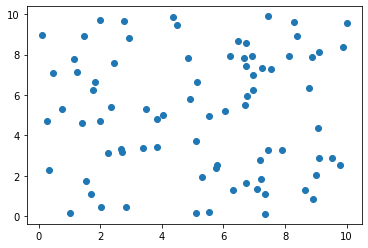

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0x60c470f5
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 6.035693e+01, 289 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.35693    0  140          -   60.35693      -     -    0s
H    0     0                     379.4407288   60.35693  84.1%     -    0s
     0     0

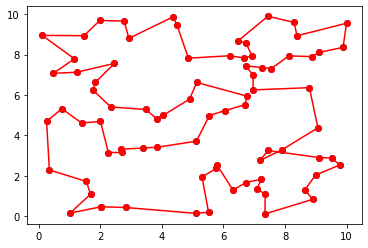

Total Cost: 75.1116
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 9


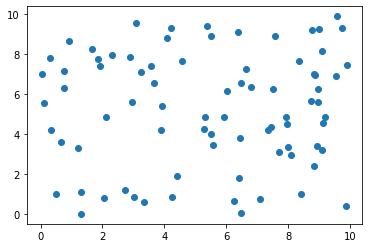

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0xc1c57114
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.884307e+01, 311 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.84307    0  158          -   58.84307      -     -    0s
H    0     0                     393.2527587   58.84307  85.0%     -    0s
     0     0

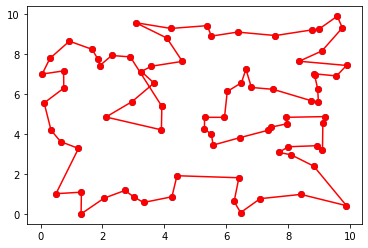

Total Cost: 73.1029
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
80 customers, iteration 10


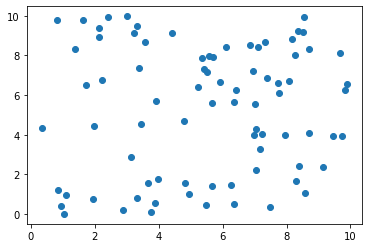

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 6479 columns and 31284 nonzeros
Model fingerprint: 0x0c64048b
Variable types: 0 continuous, 6479 integer (6400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 158 rows and 80 columns
Presolve time: 0.04s
Presolved: 6322 rows, 6399 columns, 31126 nonzeros
Variable types: 0 continuous, 6399 integer (6320 binary)

Root relaxation: objective 5.777178e+01, 266 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.77178    0  168          -   57.77178      -     -    0s
     0     0   64.76917    0  171          -   64.76917      -     -    0s
     0     0

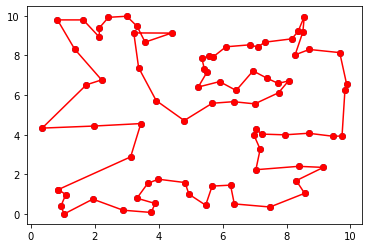

Total Cost: 70.4709
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 1


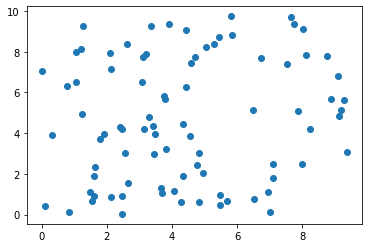

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x80891e80
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.705572e+01, 275 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.05572    0  158          -   57.05572      -     -    0s
H    0     0                     412.7028801   57.05572  86.2%     -    0s
     0     0

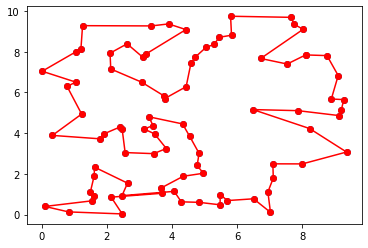

Total Cost: 71.1289
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 2


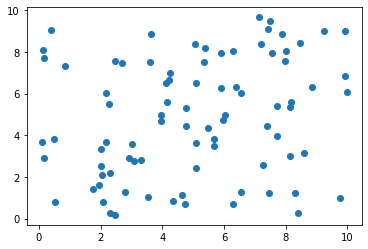

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0xa05a05a9
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.04s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.427325e+01, 305 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.27325    0  171          -   54.27325      -     -    0s
H    0     0                     396.5716757   54.27325  86.3%     -    0s
H    0     0

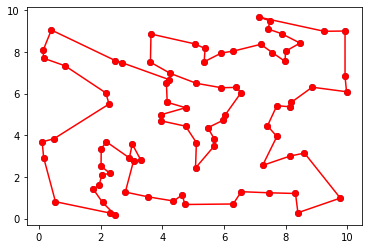

Total Cost: 73.5342
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 3


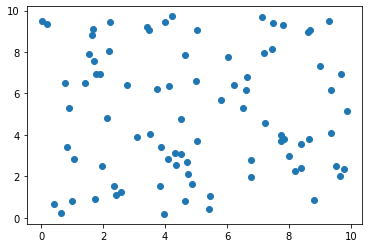

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x2e930873
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.625050e+01, 285 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.25050    0  148          -   56.25050      -     -    0s
H    0     0                     460.1681853   56.25050  87.8%     -    0s
H    0     0

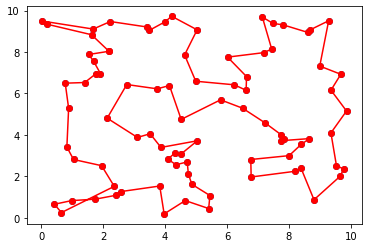

Total Cost: 73.2348
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 4


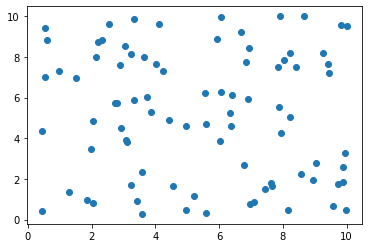

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x07498284
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.613965e+01, 301 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.13965    0  165          -   56.13965      -     -    0s
     0     0   68.67594    0  187          -   68.67594      -     -    0s
     0     0

 44208 22802   73.05248  148  262   76.56659   72.54220  5.26%  20.5  320s
 44216 22807   76.56659  130  296   76.56659   72.54220  5.26%  20.5  325s
 44222 22811   74.94520  157  283   76.56659   72.54220  5.26%  20.5  330s
 44229 22816   74.01669  607  337   76.56659   72.54220  5.26%  20.5  335s
 44236 22820   76.56659  108  337   76.56659   72.54220  5.26%  20.5  340s
 44243 22825   75.86792  373  314   76.56659   72.54220  5.26%  20.5  345s
 44251 22835   72.57139   68  283   76.56659   72.57139  5.22%  20.6  350s
 44481 22988   72.86098   82  156   76.56659   72.70889  5.04%  20.7  357s
H44487 21843                      76.3323384   72.70889  4.75%  20.7  357s

Cutting planes:
  Learned: 23
  Gomory: 26
  Implied bound: 1
  MIR: 18
  Flow cover: 117
  Zero half: 36
  RLT: 1
  Relax-and-lift: 2

Explored 44489 nodes (923655 simplex iterations) in 357.47 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 76.3323 76.5666 76.8207 ... 80.979

Optimal solution

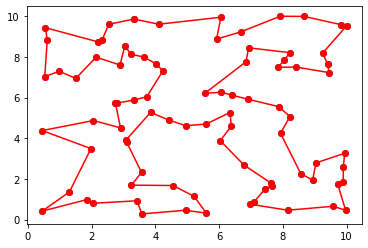

Total Cost: 76.3323
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 5


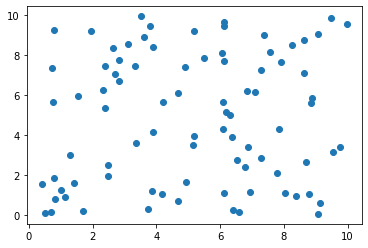

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0xc84daa24
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.787130e+01, 322 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.87130    0  177          -   57.87130      -     -    0s
     0     0   69.08563    0  191          -   69.08563      -     -    0s
     0     0

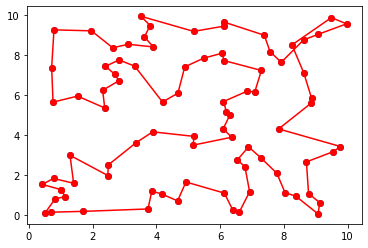

Total Cost: 75.5333
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 6


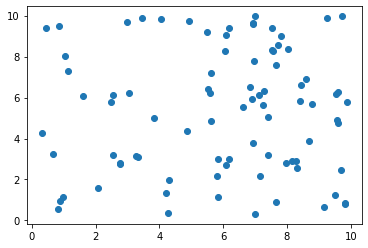

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x2d95fa10
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.160858e+01, 295 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   51.60858    0  135          -   51.60858      -     -    0s
H    0     0                     358.1209391   51.60858  85.6%     -    0s
     0     0

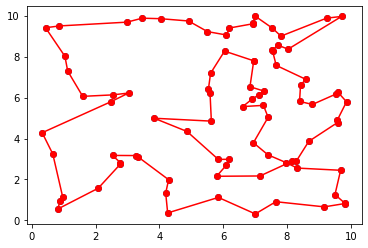

Total Cost: 71.6598
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 7


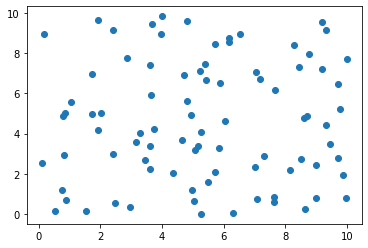

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0xc0254d5e
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 6.284010e+01, 312 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   62.84010    0  159          -   62.84010      -     -    0s
H    0     0                     384.0375210   62.84010  83.6%     -    0s
     0     0

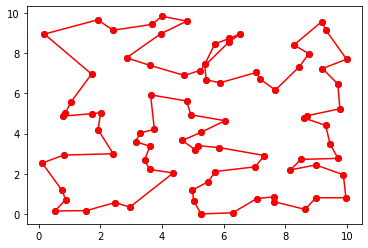

Total Cost: 77.4032
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 8


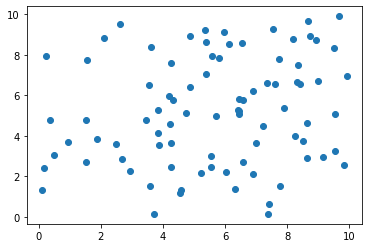

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x3986080e
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.04s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 6.163239e+01, 291 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   61.63239    0  148          -   61.63239      -     -    0s
H    0     0                     337.8292807   61.63239  81.8%     -    0s
     0     0

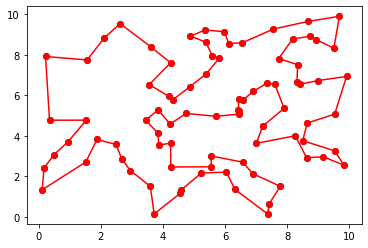

Total Cost: 74.9895
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 9


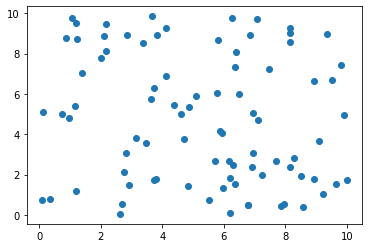

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x3ce7d306
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.05s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.620904e+01, 273 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.20904    0  164          -   56.20904      -     -    0s
     0     0   63.83036    0  191          -   63.83036      -     -    0s
     0     0

H85836 49635                      76.5665364   69.06850  9.79%  19.3  289s
 86101 50324   69.83338   41  288   76.56654   69.06850  9.79%  19.4  290s
 88882 52522   70.41515  174  188   76.56654   69.07228  9.79%  19.6  295s
 92318 54686   70.32340   96  284   76.56654   69.07383  9.79%  20.0  301s
 94575 56581   71.00891  174  305   76.56654   69.07383  9.79%  20.4  306s
 97326 58606   74.43859  330  207   76.56654   69.07383  9.79%  20.6  311s
 99646 60455   71.96058  191  269   76.56654   69.10917  9.74%  20.9  316s
 102518 63086   70.79683  138  224   76.56654   69.11579  9.73%  21.1  320s
 105315 65464   71.45885   44  318   76.56654   69.13735  9.70%  21.2  325s
 108603 68361   73.40631  210  189   76.56654   69.15046  9.69%  21.5  330s
 111704 71350   76.22928   75  156   76.56654   69.15699  9.68%  22.0  336s
 114305 73743   70.81769   45  241   76.56654   69.16437  9.67%  22.3  340s
 117995 76903   69.68044   39  316   76.56654   69.17682  9.65%  22.6  346s
 120314 79179   71.

 385842 303491   71.70239   60  205   76.45309   69.70254  8.83%  24.8  821s
 387965 305051   75.66174  270  206   76.45309   69.70428  8.83%  24.7  825s
 389852 306651   72.67169   47  209   76.45309   69.70745  8.82%  24.7  830s
 393625 310169   72.34436  133   69   76.45309   69.70971  8.82%  24.7  835s
 396582 312585   69.94796   33  200   76.45309   69.71234  8.82%  24.6  840s
 399881 315938   71.96030  250  274   76.45309   69.71358  8.82%  24.6  845s
 403090 318954   72.52264  756  247   76.45309   69.71855  8.81%  24.6  852s
 406003 320973   72.19989  117  179   76.45309   69.72026  8.81%  24.5  855s
 406891 321675   71.51778   47  152   76.45309   69.72204  8.80%  24.5  869s
 407637 322647   73.84411  195   87   76.45309   69.72238  8.80%  24.5  871s
 409628 324204   73.12303   72  262   76.45309   69.72357  8.80%  24.5  875s
 413859 328213   72.60577  143  158   76.45309   69.72904  8.80%  24.5  881s
 417010 330669   71.95742   62  161   76.45309   69.73546  8.79%  24.5  885s

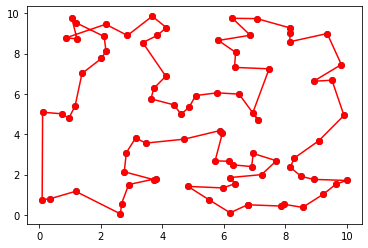

Total Cost: 73.7111
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
85 customers, iteration 10


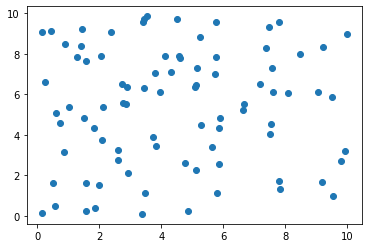

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7310 rows, 7309 columns and 35364 nonzeros
Model fingerprint: 0x5457f5be
Variable types: 0 continuous, 7309 integer (7225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 168 rows and 85 columns
Presolve time: 0.08s
Presolved: 7142 rows, 7224 columns, 35196 nonzeros
Variable types: 0 continuous, 7224 integer (7140 binary)

Root relaxation: objective 5.481305e+01, 338 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.81305    0  135          -   54.81305      -     -    0s
H    0     0                     396.8005835   54.81305  86.2%     -    0s
H    0     0

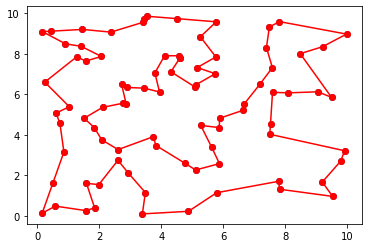

Total Cost: 75.5673
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 1


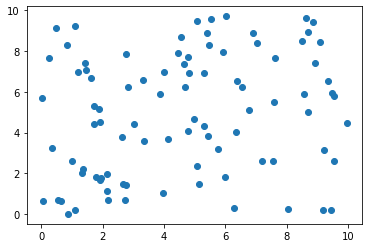

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x1a5dfb42
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 6.031144e+01, 365 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.31144    0  143          -   60.31144      -     -    0s
H    0     0                     446.5865855   60.31144  86.5%     -    0s
     0     0

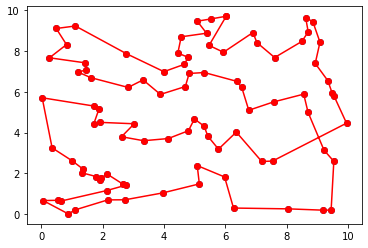

Total Cost: 78.0566
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 2


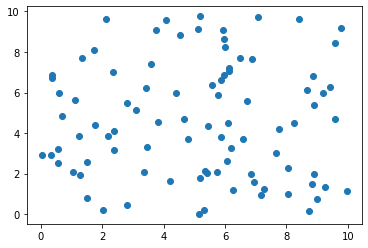

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0xb28f963f
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 6.265378e+01, 360 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   62.65378    0  181          -   62.65378      -     -    0s
     0     0   71.55660    0  222          -   71.55660      -     -    0s
     0     0

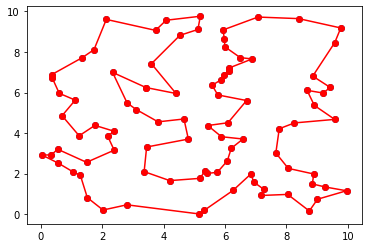

Total Cost: 74.3216
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 3


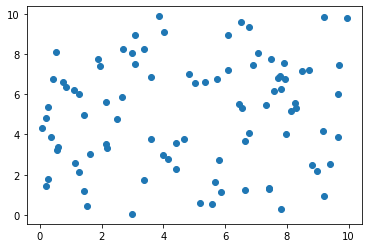

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x92df725d
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.05s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 5.612069e+01, 331 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.12069    0  186          -   56.12069      -     -    0s
     0     0   64.91490    0  211          -   64.91490      -     -    0s
     0     0

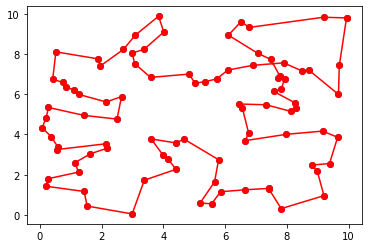

Total Cost: 72.6777
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 4


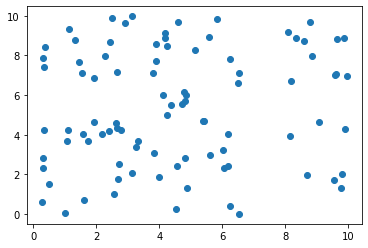

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0xaae230c2
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [3e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.05s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 5.721030e+01, 303 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.21030    0  172          -   57.21030      -     -    0s
H    0     0                     455.0718343   57.21030  87.4%     -    0s
     0     0

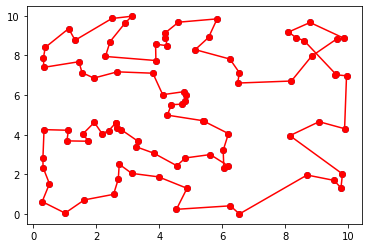

Total Cost: 73.9386
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 5


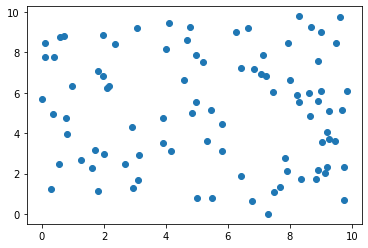

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x55f71b03
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 6.150265e+01, 323 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   61.50265    0  162          -   61.50265      -     -    0s
H    0     0                     472.5961137   61.50265  87.0%     -    0s
     0     0

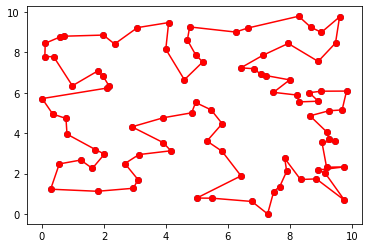

Total Cost: 74.9813
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 6


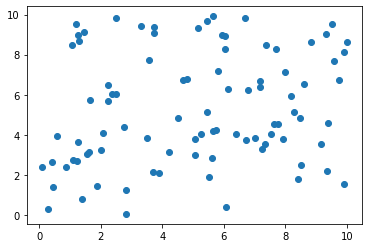

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x5422d59f
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 5.655170e+01, 320 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   56.55170    0  166          -   56.55170      -     -    0s
H    0     0                     455.0239680   56.55170  87.6%     -    0s
     0     0

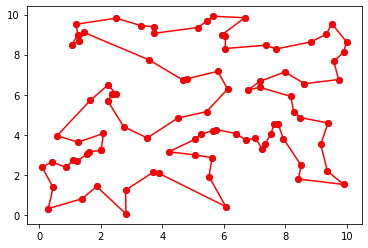

Total Cost: 73.6723
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 7


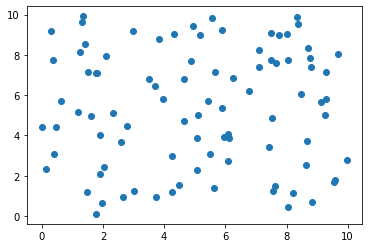

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x3a274fef
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 6.237866e+01, 304 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   62.37866    0  155          -   62.37866      -     -    0s
H    0     0                     433.5040957   62.37866  85.6%     -    0s
H    0     0

 59204 28228   77.48312   76  321   79.45216   74.53462  6.19%  25.1  280s
 59208 28231   75.87117   48  300   79.45216   74.53462  6.19%  25.1  285s
 59212 28234   75.00208   96  312   79.45216   74.53462  6.19%  25.1  291s
 59216 28236   75.16591   63  323   79.45216   74.53462  6.19%  25.1  295s
 59220 28239   77.42720   91  351   79.45216   74.53462  6.19%  25.1  300s
 59226 28243   78.45390  190  368   79.45216   74.53462  6.19%  25.1  306s
 59229 28245   74.62872   46  397   79.45216   74.53462  6.19%  25.1  310s
 59233 28248   79.14423  166  394   79.45216   74.53462  6.19%  25.1  315s
 59238 28251   75.51895   51  357   79.45216   74.53462  6.19%  25.1  320s
 59242 28254   77.18629  123  340   79.45216   74.53462  6.19%  25.1  325s
 59245 28259   74.53462   46  272   79.45216   74.53462  6.19%  25.4  331s
 59259 28274   74.53462   49  319   79.45216   74.53462  6.19%  25.5  335s
 59585 28484   74.72457   75  264   79.45216   74.53462  6.19%  25.5  340s
 60342 28686     cutoff  

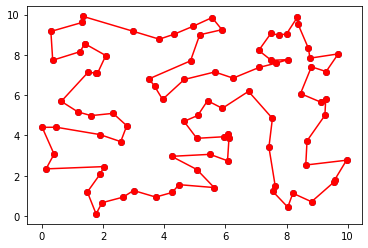

Total Cost: 76.6755
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 8


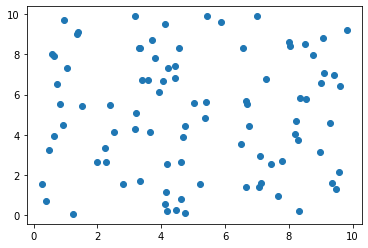

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x649924e9
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [2e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.05s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 5.786298e+01, 292 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.86298    0  181          -   57.86298      -     -    0s
     0     0   68.65546    0  211          -   68.65546      -     -    0s
     0     0

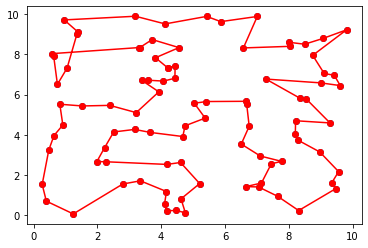

Total Cost: 76.2111
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 9


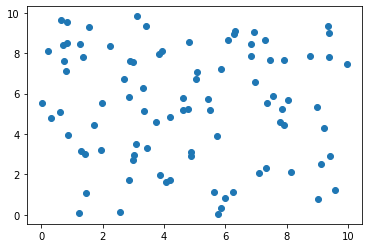

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0x83bd3fcb
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.05s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 5.497247e+01, 313 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   54.97247    0  149          -   54.97247      -     -    0s
H    0     0                     386.2345557   54.97247  85.8%     -    0s
H    0     0

 44770 22380   73.45675  570  307   76.06249   71.38931  6.14%  23.1  175s
 44780 22387   75.25440   73  280   76.06249   71.39118  6.14%  23.1  188s
 44781 22389   71.39118   43  286   76.06249   71.39118  6.14%  23.3  194s
 44783 22392   71.39118   44  349   76.06249   71.39118  6.14%  23.3  195s
 45033 22573   71.98231   59  246   76.06249   71.39118  6.14%  23.5  200s
 45809 23079   72.04140   98  218   76.06249   71.39118  6.14%  23.6  205s
H45870 21875                      74.6119297   71.39118  4.32%  23.6  205s

Cutting planes:
  Learned: 21
  Gomory: 33
  Implied bound: 1
  MIR: 17
  StrongCG: 1
  Flow cover: 126
  GUB cover: 1
  Inf proof: 2
  Zero half: 32

Explored 45894 nodes (1085143 simplex iterations) in 205.65 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 74.6119 76.0625 76.0939 ... 77.2831

Optimal solution found (tolerance 5.00e-02)
Best objective 7.461192965116e+01, best bound 7.139118268788e+01, gap 4.3167%
[90, 0.9, 74.61192965115856

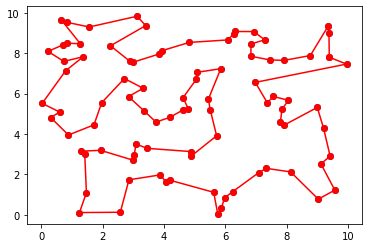

Total Cost: 74.6119
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
90 customers, iteration 10


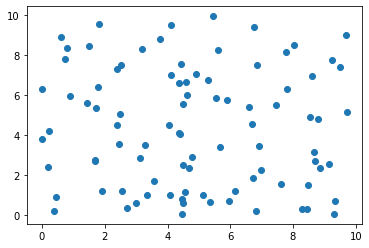

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8190 rows, 8189 columns and 39694 nonzeros
Model fingerprint: 0xb63b2cee
Variable types: 0 continuous, 8189 integer (8100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 178 rows and 90 columns
Presolve time: 0.06s
Presolved: 8012 rows, 8099 columns, 39516 nonzeros
Variable types: 0 continuous, 8099 integer (8010 binary)

Root relaxation: objective 6.310473e+01, 307 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   63.10473    0  174          -   63.10473      -     -    0s
     0     0   72.70753    0  201          -   72.70753      -     -    0s
     0     0

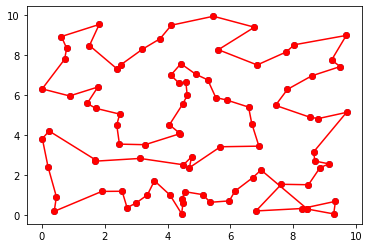

Total Cost: 80.5195
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 1


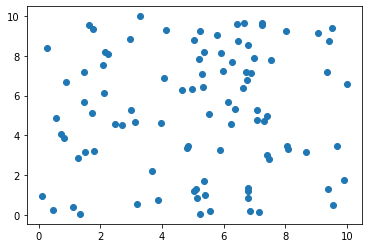

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x37480257
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 5.723442e+01, 326 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   57.23442    0  172          -   57.23442      -     -    0s
H    0     0                     457.3423164   57.23442  87.5%     -    0s
     0     0

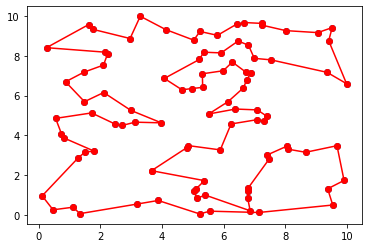

Total Cost: 77.9992
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 2


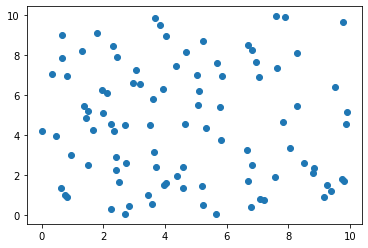

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0xba337e84
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.06s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.066166e+01, 346 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.66166    0  172          -   60.66166      -     -    0s
     0     0   72.39972    0  217          -   72.39972      -     -    0s
     0     0

 74971 33072   79.99042   82  327   80.91589   76.83809  5.04%  21.4  280s
 74976 33080   76.83809   71  302   80.91589   76.83809  5.04%  21.5  285s
 75091 33168   76.83809   80  438   80.91589   76.83809  5.04%  21.6  290s
 76034 33590   80.59365   94  111   80.91589   76.83809  5.04%  21.7  295s
H76614 32071                      80.5497302   76.83809  4.61%  21.8  301s

Cutting planes:
  Learned: 25
  Gomory: 39
  Cover: 1
  Implied bound: 3
  MIR: 22
  StrongCG: 1
  Flow cover: 218
  Inf proof: 3
  Zero half: 34
  Mod-K: 1
  RLT: 1

Explored 76622 nodes (1729228 simplex iterations) in 301.70 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 80.5497 80.9159 81.4652 ... 83.5246

Optimal solution found (tolerance 5.00e-02)
Best objective 8.054973018586e+01, best bound 7.683808613728e+01, gap 4.6079%
[95, 0.95, 80.5497301858631, 0.8478918966932958]


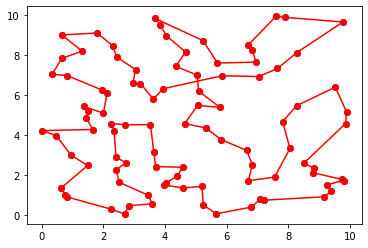

Total Cost: 80.5497
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 3


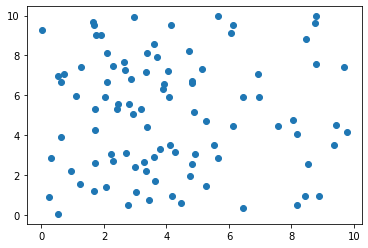

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0xcf2debad
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.553620e+01, 320 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   65.53620    0  164          -   65.53620      -     -    0s
H    0     0                     404.2614057   65.53620  83.8%     -    0s
     0     0

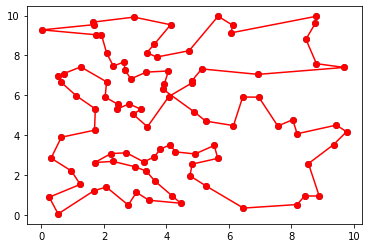

Total Cost: 80.9895
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 4


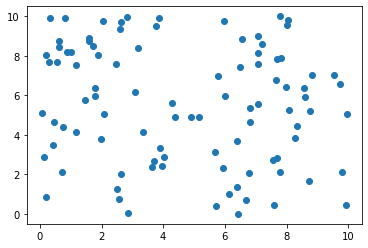

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0xe9b4fbbd
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.06s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.373333e+01, 346 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   63.73333    0  195          -   63.73333      -     -    0s
     0     0   72.57405    0  224          -   72.57405      -     -    0s
     0     0

 33428 15648   76.10297   59  348   79.89936   75.70911  5.24%  24.4  231s
 35019 16550   76.09847  207  293   79.89936   75.79210  5.14%  24.0  235s
H36454 16133                      79.2853002   75.79210  4.41%  23.5  238s

Cutting planes:
  Learned: 30
  Gomory: 30
  Implied bound: 1
  Projected implied bound: 3
  MIR: 8
  Flow cover: 78
  Zero half: 15
  RLT: 3
  Relax-and-lift: 1

Explored 36531 nodes (896494 simplex iterations) in 238.35 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 79.2853 79.8994 80.0686 ... 82.8656

Optimal solution found (tolerance 5.00e-02)
Best objective 7.928530020408e+01, best bound 7.579209952725e+01, gap 4.4059%
[95, 0.95, 79.2853002040815, 0.8345821074113842]


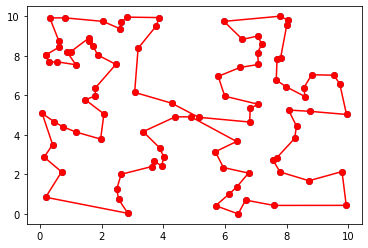

Total Cost: 79.2853
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 5


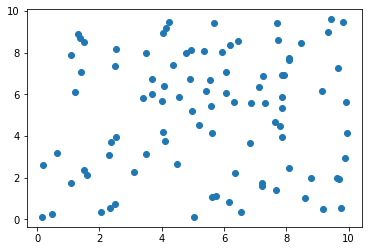

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x195f71ae
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [6e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.07s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.110578e+01, 350 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   61.10578    0  184          -   61.10578      -     -    0s
     0     0   71.31256    0  207          -   71.31256      -     -    0s
     0     0

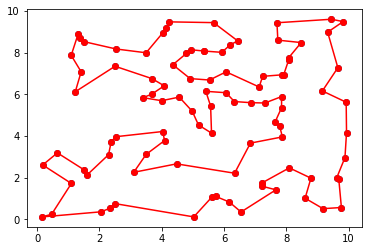

Total Cost: 77.9096
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 6


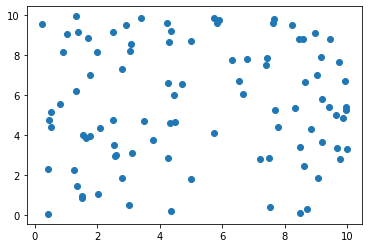

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x6f410043
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.187157e+01, 316 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   61.87157    0  183          -   61.87157      -     -    0s
H    0     0                     474.7392972   61.87157  87.0%     -    0s
     0     0

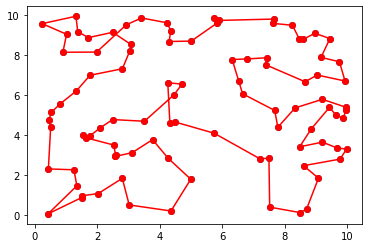

Total Cost: 79.3075
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 7


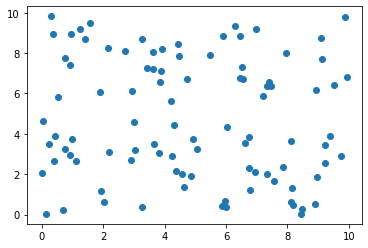

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x07b4ed7e
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.331944e+01, 319 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   63.31944    0  188          -   63.31944      -     -    0s
     0     0   71.19637    0  191          -   71.19637      -     -    0s
     0     0

 56547 23587   79.48274  509  318   80.92159   75.91230  6.19%  23.9  310s
 56550 23589   79.71211  979  396   80.92159   75.91230  6.19%  23.9  315s
 56554 23591   78.49841  360  315   80.92159   75.91230  6.19%  23.9  320s
 56557 23593   76.34256   91  388   80.92159   75.91230  6.19%  23.9  325s
H56559 22414                      80.3056306   75.91230  5.47%  23.9  329s
H56560 21293                      80.2122505   75.91230  5.36%  23.9  331s
 56563 21295   77.91272  403  345   80.21225   75.91230  5.36%  23.9  335s
 56567 21298   77.86810   97  452   80.21225   75.91230  5.36%  23.9  340s
 56570 21300   76.67193  140  425   80.21225   75.91230  5.36%  23.9  345s
 56574 21303   79.31179 1527  334   80.21225   75.91230  5.36%  23.9  351s
 56577 21305   78.45084   91  293   80.21225   75.91230  5.36%  23.9  355s
 56581 21307   79.97936  241  435   80.21225   75.91230  5.36%  23.9  360s
 56584 21309   77.54203   40  423   80.21225   75.91230  5.36%  23.9  365s
H56585 20243             

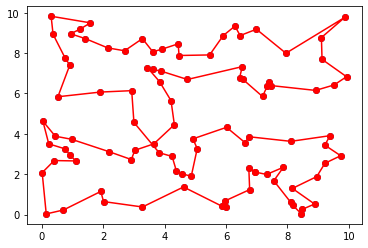

Total Cost: 79.7426
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 8


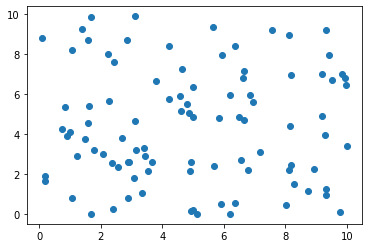

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x46d57e6e
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.325936e+01, 334 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   63.25936    0  188          -   63.25936      -     -    0s
H    0     0                     437.4207196   63.25936  85.5%     -    0s
     0     0

 58998 30028   75.22983   50  394   81.31370   74.97665  7.79%  21.5  331s
 59001 30030   80.34414  171  453   81.31370   74.97665  7.79%  21.5  335s
 59005 30033   78.45472  214  408   81.31370   74.97665  7.79%  21.5  340s
 59009 30036   77.05235   57  445   81.31370   74.97665  7.79%  21.5  346s
 59011 30037   78.97078  411  424   81.31370   74.97665  7.79%  21.5  350s
 59015 30040   76.82005   75  419   81.31370   74.97665  7.79%  21.5  356s
 59018 30042   79.73958  114  360   81.31370   74.97665  7.79%  21.5  360s
 59022 30044   78.20989  329  396   81.31370   74.97665  7.79%  21.4  365s
 59026 30047   75.59738   45  416   81.31370   74.97665  7.79%  21.4  371s
 59028 30048   79.49194  119  346   81.31370   74.97665  7.79%  21.4  376s
 59029 30052   74.97665   46  346   81.31370   74.97665  7.79%  21.7  382s
 59035 30059   74.97665   48  389   81.31370   74.97665  7.79%  21.7  385s
H59062 28570                      80.4824820   74.98364  6.83%  21.7  387s
H59103 27171             

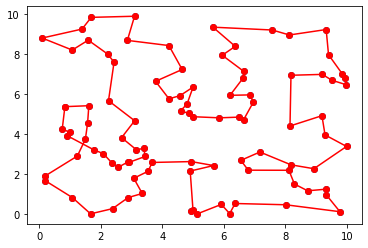

Total Cost: 78.7479
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 9


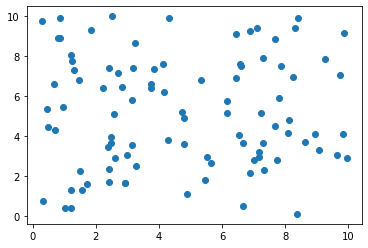

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x61163c40
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [7e-03, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.06s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 5.956282e+01, 322 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   59.56282    0  195          -   59.56282      -     -    0s
     0     0   71.96525    0  219          -   71.96525      -     -    0s
     0     0

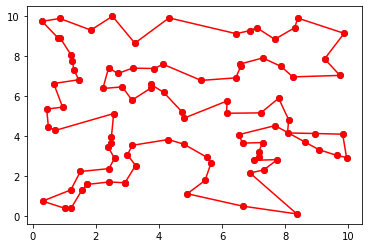

Total Cost: 77.2718
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
95 customers, iteration 10


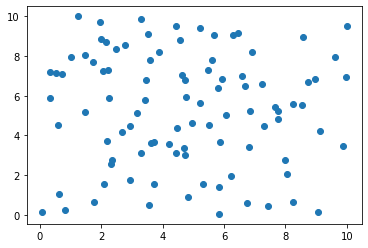

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9120 rows, 9119 columns and 44274 nonzeros
Model fingerprint: 0x4d8b28cf
Variable types: 0 continuous, 9119 integer (9025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Presolve removed 188 rows and 95 columns
Presolve time: 0.05s
Presolved: 8932 rows, 9024 columns, 44086 nonzeros
Variable types: 0 continuous, 9024 integer (8930 binary)

Root relaxation: objective 6.468055e+01, 409 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   64.68055    0  159          -   64.68055      -     -    0s
H    0     0                     418.1672605   64.68055  84.5%     -    0s
     0     0

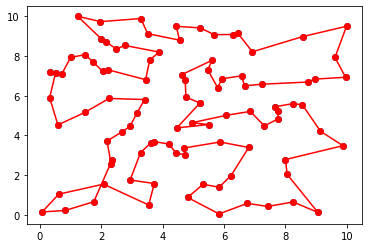

Total Cost: 82.7005
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 1


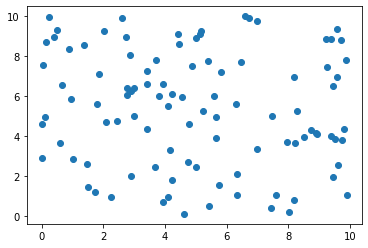

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0xd9d44341
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.446553e+01, 343 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   64.46553    0  174          -   64.46553      -     -    0s
H    0     0                     516.0305867   64.46553  87.5%     -    0s
     0 

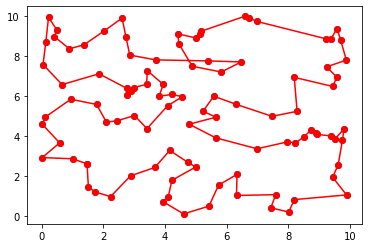

Total Cost: 79.7383
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 2


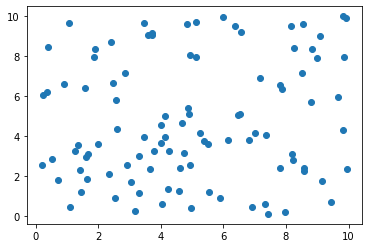

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0xbfcd2161
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.032922e+01, 306 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   60.32922    0  162          -   60.32922      -     -    0s
H    0     0                     440.7698744   60.32922  86.3%     -    0s
     0 

 35907 19244   77.34835   44  264   85.56920   74.89459  12.5%  21.0  285s
 37100 19815   79.21972  280  395   85.56920   74.89459  12.5%  21.0  291s
 38645 20744   78.98137   98  285   85.56920   74.93827  12.4%  21.1  295s
 41134 22312   81.27647   65  335   85.56920   74.95309  12.4%  21.1  301s
 43095 23419   76.76058  108  292   85.56920   74.97231  12.4%  21.1  306s
 44447 24471   76.79263   41  422   85.56920   74.98472  12.4%  21.2  311s
 46991 25099   80.62555   54  306   85.56920   75.00503  12.3%  21.2  315s
 48219 26143   76.68973   39  369   85.56920   75.01722  12.3%  21.4  320s
 49468 26931   76.81945  127  376   85.56920   75.04543  12.3%  21.4 1474s
 50453 27237   76.53887   61  346   85.56920   75.04751  12.3%  21.4 1479s
 51204 27742   82.30568  121  259   85.56920   75.05627  12.3%  21.6 1482s
 52068 28271   81.47277   59  288   85.56920   75.05692  12.3%  21.7 1486s
*52382 27371             195      85.5591351   75.05692  12.3%  21.7 1486s
 53533 27942   80.58133  

 193886 123511   80.18311  259  469   82.28920   75.60119  8.13%  23.5 1920s
H193888 117336                      82.2582368   75.60119  8.09%  23.5 1925s
 193892 117339   78.33000  582  345   82.25824   75.60119  8.09%  23.5 1931s
 193895 117341   79.49866  203  374   82.25824   75.60119  8.09%  23.5 1936s
 193897 117342   79.28115   70  333   82.25824   75.60119  8.09%  23.5 1940s
 193900 117344   79.58718  102  345   82.25824   75.60119  8.09%  23.5 1945s
 193903 117346   78.04274  563  474   82.25824   75.60119  8.09%  23.5 1950s
 193906 117348   79.62754   48  260   82.25824   75.60119  8.09%  23.5 1957s
 193907 117352   75.60119   39  432   82.25824   75.60119  8.09%  23.6 1961s
 193909 117354   75.60119   40  456   82.25824   75.60119  8.09%  23.6 1965s
 193913 117359   75.60119   41  375   82.25824   75.60119  8.09%  23.6 1970s
 193920 117362   75.60119   42  435   82.25824   75.60119  8.09%  23.6 3767s
 193936 117372   75.60119   43  500   82.25824   75.60119  8.09%  23.6 3771s

 223996 103761   77.00341   83  311   81.08102   75.60119  6.76%  23.5 4518s
 223997 103764   75.60119   51  437   81.08102   75.60119  6.76%  23.5 4532s
 223999 103767   75.60119   52  420   81.08102   75.60119  6.76%  23.5 4544s
 224003 103772   75.60119   53  404   81.08102   75.60119  6.76%  23.5 4557s
 224010 103778   75.60119   54  426   81.08102   75.60119  6.76%  23.5 4561s
 224026 103789   75.60119   55  363   81.08102   75.60119  6.76%  23.5 4574s
 224042 103807   75.60119   56  367   81.08102   75.60119  6.76%  23.5 4577s
 224107 103851   76.01268   60  419   81.08102   75.60119  6.76%  23.5 4581s
 224185 103901   75.60119   64  399   81.08102   75.60119  6.76%  23.6 4585s
 224266 103939   75.60119   69  302   81.08102   75.60119  6.76%  23.6 4590s
 224421 103992   76.52468   75  328   81.08102   75.60119  6.76%  23.6 4595s
 224593 104057   76.69906   81  239   81.08102   75.60119  6.76%  23.6 4600s
 224736 104139   76.47513   86  357   81.08102   75.60119  6.76%  23.6 4605s

 253996 104309   76.62613   69  483   80.14286   75.60119  5.67%  24.7 5365s
 253997 104309   77.22664  108  281   80.14286   75.60119  5.67%  24.7 5372s
 253998 104310   77.61018  113  449   80.14286   75.60119  5.67%  24.7 5379s
 253999 104311   76.54746   71  283   80.14286   75.60119  5.67%  24.7 5388s
 254000 104311   77.78896  215  420   80.14286   75.60119  5.67%  24.7 5395s
 254001 104312   78.98555   92  386   80.14286   75.60119  5.67%  24.7 5405s
 254002 104313   77.30858  738  445   80.14286   75.60119  5.67%  24.7 5416s
 254003 104313   77.03592   67  359   80.14286   75.60119  5.67%  24.7 5427s
 254004 104314   76.28051   64  403   80.14286   75.60119  5.67%  24.7 5434s
 254005 104315   79.80577   78  325   80.14286   75.60119  5.67%  24.7 5448s
 254006 104315   77.58394  157  461   80.14286   75.60119  5.67%  24.7 5455s
 254007 104316   79.06457   92  370   80.14286   75.60119  5.67%  24.7 5463s
 254008 104317   76.58433   81  422   80.14286   75.60119  5.67%  24.7 5470s

 254104 104381   76.28051   64  463   80.14286   75.60119  5.67%  24.7 6167s
 254105 104381   79.80577   78  470   80.14286   75.60119  5.67%  24.7 6174s
 254106 104382   77.58394  157  429   80.14286   75.60119  5.67%  24.7 6190s
 254107 104383   79.06457   92  496   80.14286   75.60119  5.67%  24.7 6196s
 254108 104383   76.58433   81  471   80.14286   75.60119  5.67%  24.7 6204s
 254109 104384   77.29649  160  504   80.14286   75.60119  5.67%  24.7 6209s
 254110 104385   76.00753  133  425   80.14286   75.60119  5.67%  24.7 6220s
 254111 104385   78.26040   97  407   80.14286   75.60119  5.67%  24.7 6226s
 254112 104386   75.97081  222  407   80.14286   75.60119  5.67%  24.7 6251s
 254113 104390   75.60119   60  396   80.14286   75.60119  5.67%  24.8 6265s
 254115 104393   75.60119   61  518   80.14286   75.60119  5.67%  24.8 6279s
 254119 104400   75.60119   62  514   80.14286   75.60119  5.67%  24.8 6292s
 254127 104405   75.60119   63  496   80.14286   75.60119  5.67%  24.8 6296s

 309399 129407   78.14347  125  415   80.14286   75.60119  5.67%  26.6 9817s
 310222 129760   79.22799   85  473   80.14286   75.60119  5.67%  26.6 9824s
 311017 130015   75.71295   74  340   80.14286   75.60119  5.67%  26.6 9832s
 311670 130564   79.47538  158  290   80.14286   75.60119  5.67%  26.6 9839s
 312586 130863   77.23952   80  441   80.14286   75.60119  5.67%  26.6 9846s
 313383 131107   77.81981  107  425   80.14286   75.60119  5.67%  26.6 9852s
 314123 131915   78.61733  133  428   80.14286   75.60119  5.67%  26.7 9864s
 315394 132381   76.33403   71  282   80.14286   75.60119  5.67%  26.7 9870s
 316379 132060   77.00101   77  397   80.14286   75.60119  5.67%  26.7 9886s
 316387 132550   76.86754   78  415   80.14286   75.60119  5.67%  26.7 9891s
 316988 132609     cutoff  100        80.14286   75.60119  5.67%  26.7 9900s
 317311 133117   77.71055  117  377   80.14286   75.60119  5.67%  26.7 9907s
 318179 133603     cutoff  179        80.14286   75.60119  5.67%  26.8 9914s

 428316 181573   76.86681   80  391   80.14286   75.82864  5.38%  30.0 10510s
 430274 182224     cutoff   89        80.14286   75.83305  5.38%  30.1 10517s
 431099 182826   78.19994  132  402   80.14286   75.83425  5.38%  30.1 10520s
 433115 183590   77.90966  131  483   80.14286   75.83723  5.37%  30.1 10526s
 434830 184235   77.14118  141  425   80.14286   75.84175  5.37%  30.2 10530s
 437443 185378   77.92690  102  394   80.14286   75.84988  5.36%  30.3 10537s
 439209 185798   77.94477  264   82   80.14286   75.85317  5.35%  30.3 10541s
 440407 186477   79.59519  103  291   80.14286   75.85634  5.35%  30.4 10546s
 442051 187243   77.88054   96  230   80.14286   75.86081  5.34%  30.4 10551s
 443899 187808   78.50689   78  472   80.14286   75.86376  5.34%  30.5 10555s
 445382 188461   78.12379  160  416   80.14286   75.86551  5.34%  30.5 10560s
 446981 189247   79.10546   93  365   80.14286   75.87035  5.33%  30.6 10565s
 449551 189791   77.50625   83  382   80.14286   75.87587  5.32%

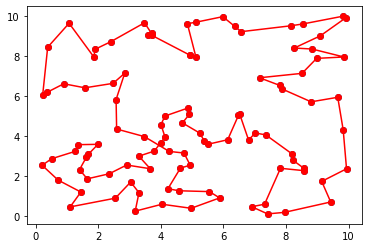

Total Cost: 80.1429
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 3


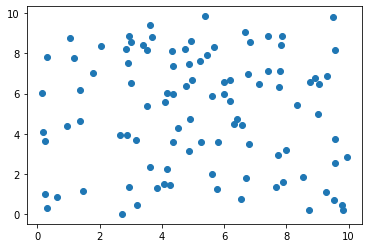

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0xf8d59ac4
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.411058e+01, 320 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   64.11058    0  169          -   64.11058      -     -    0s
     0     0   72.81101    0  223          -   72.81101      -     -    0s
     0 

 47290 22264     cutoff   67        83.96092   78.22273  6.83%  30.0  365s
 49433 23197   78.66162   89  456   83.96092   78.22273  6.83%  30.1  370s
 51105 23817   78.62446  106  455   83.96092   78.22273  6.83%  30.2  375s
 52675 24402   81.31691   79  382   83.96092   78.24014  6.81%  30.4  380s
 54122 25081   81.87812  112  339   83.96092   78.26171  6.79%  30.7  385s
 55786 25846   78.64001   73  390   83.96092   78.29792  6.74%  30.9  390s
 57244 26478   79.77607   56  474   83.96092   78.31020  6.73%  31.2  395s
 59121 27682   78.82626  123  425   83.96092   78.32911  6.71%  31.3  401s
 60850 28235   79.91053  116  448   83.96092   78.34168  6.69%  31.3  405s
 62867 29182   78.79147   96  304   83.96092   78.38432  6.64%  31.5  410s
H63578 28063                      83.8494722   78.38432  6.52%  31.6  412s
 64881 28717   78.90397   97  459   83.84947   78.40278  6.50%  31.6  416s
 66345 29273   79.73048   75  332   83.84947   78.42021  6.48%  31.9  420s
 67832 29803   82.04057  

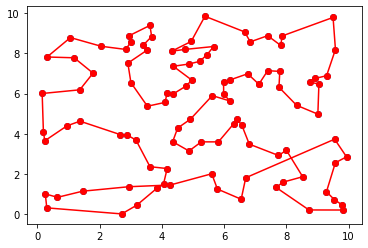

Total Cost: 82.5052
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 4


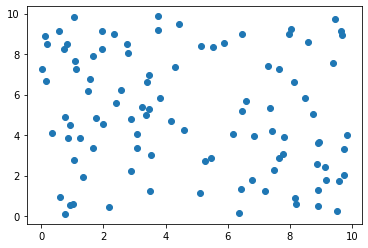

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0xa5235f3c
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [7e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.190775e+01, 391 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   61.90775    0  172          -   61.90775      -     -    0s
H    0     0                     463.0496890   61.90775  86.6%     -    0s
H    0 

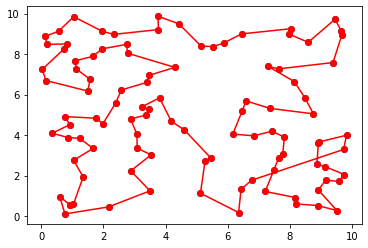

Total Cost: 81.2087
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 5


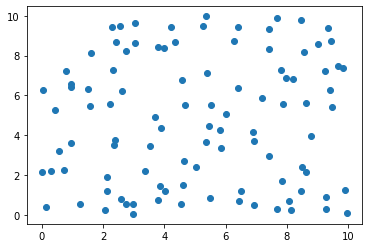

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0x06295156
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.836460e+01, 356 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   68.36460    0  168          -   68.36460      -     -    0s
H    0     0                     484.3266655   68.36460  85.9%     -    0s
     0 

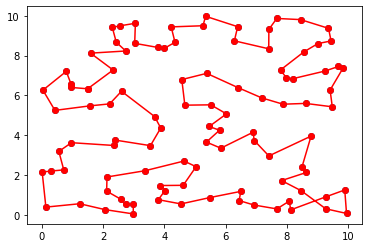

Total Cost: 80.9688
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 6


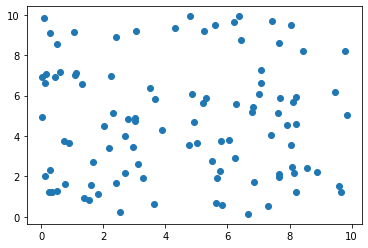

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0x9145da32
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [8e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.07s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 5.936446e+01, 422 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   59.36446    0  177          -   59.36446      -     -    0s
H    0     0                     490.0634137   59.36446  87.9%     -    0s
     0 

 32423 19978   78.66593  106  221   79.99633   75.92860  5.08%  19.1  241s
 34458 21006   79.71662  106  315   79.99633   75.92860  5.08%  19.4  245s
 36667 22116   77.57206   96  315   79.99633   75.92860  5.08%  19.8  250s
 39017 23392   76.39518   84  395   79.99633   75.92860  5.08%  20.2  256s
 41456 24616   76.21424  112  391   79.99633   75.92860  5.08%  20.4  260s
 44382 26070     cutoff  106        79.99633   75.92860  5.08%  21.0  265s
 46263 26946   76.10815  119  293   79.99633   75.92860  5.08%  21.5  270s
 47074 27321   79.00330  109  280   79.99633   75.92860  5.08%  21.6  277s
H47193 24991                      79.4255438   75.92860  4.40%  21.6  277s

Cutting planes:
  Learned: 20
  Gomory: 52
  Cover: 10
  Implied bound: 1
  Clique: 1
  MIR: 19
  StrongCG: 3
  Flow cover: 181
  Inf proof: 3
  Zero half: 37
  RLT: 2
  Relax-and-lift: 1

Explored 47898 nodes (1091085 simplex iterations) in 277.30 seconds
Thread count was 16 (of 16 available processors)

Solution count 10

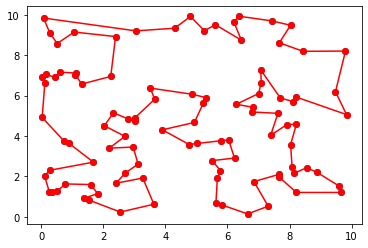

Total Cost: 79.4255
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 7


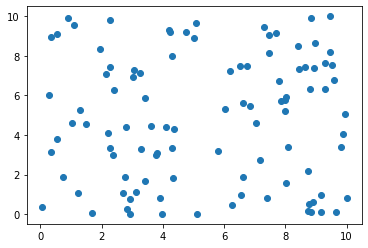

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0x901c48e0
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.808304e+01, 362 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   68.08304    0  194          -   68.08304      -     -    0s
H    0     0                     541.4624055   68.08304  87.4%     -    0s
     0 

 43728 21704   82.88553   37  419   86.04430   79.59087  7.50%  19.3  366s
 43731 21706   83.51384   62  470   86.04430   79.59087  7.50%  19.3  370s
 43734 21708   84.74701   69  425   86.04430   79.59087  7.50%  19.3  375s
H43736 20623                      86.0086293   79.59087  7.46%  19.3  380s
H43737 19591                      85.8420452   79.59087  7.28%  19.3  385s
 43741 19594   85.84205  104  493   85.84205   79.59087  7.28%  19.3  390s
 43744 19596   83.92961   92  442   85.84205   79.59087  7.28%  19.3  395s
 43747 19598   79.96949  162  451   85.84205   79.59087  7.28%  19.3  400s
H43747 18616                      85.8220209   79.59087  7.26%  19.3  402s
 43749 18617   85.82202   94  457   85.82202   79.59087  7.26%  19.3  405s
 43752 18619   80.86511   63  393   85.82202   79.59087  7.26%  19.3  410s
 43755 18621   84.34511   93  449   85.82202   79.59087  7.26%  19.3  415s
 43759 18624   85.82202  121  393   85.82202   79.59087  7.26%  19.3  421s
 43762 18626   84.51706  

 73465 22426   83.87943  122  480   84.26241   79.85234  5.23%  23.7  885s
 73468 22428   83.86930   92  310   84.26241   79.85234  5.23%  23.7  890s
 73472 22431   84.04427  133  309   84.26241   79.85234  5.23%  23.7  896s
 73487 22449   79.85234   71  387   84.26241   79.85234  5.23%  24.0  900s
 73707 22567   80.09172   85  467   84.26241   79.85234  5.23%  24.0  905s
 74138 22774   82.44728  108  439   84.26241   79.85234  5.23%  24.1  911s
 74644 23070   84.11089  131  393   84.26241   79.85234  5.23%  24.3  915s
 75980 23563   82.17410  114  330   84.26241   79.86421  5.22%  24.6  920s
 77591 24204   81.63397   89  418   84.26241   79.92202  5.15%  25.2  925s
 79271 24897   79.95045   78  468   84.26241   79.95045  5.12%  25.6  930s
 80448 25362   80.27543   90  469   84.26241   79.97023  5.09%  26.1  935s
 82005 25936   84.01400  109  415   84.26241   80.00270  5.06%  26.4  940s
 84364 27044   80.20246   84  450   84.26241   80.01783  5.04%  27.0  946s
 86219 27731   80.24988  

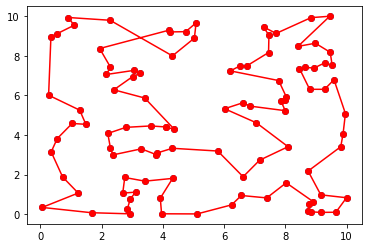

Total Cost: 84.2624
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 8


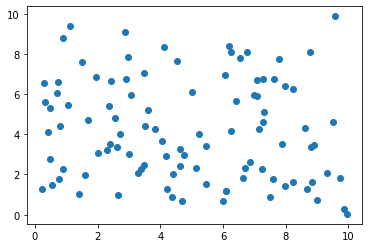

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0x5ab38cd6
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e-03, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 6.389116e+01, 348 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   63.89116    0  196          -   63.89116      -     -    0s
     0     0   72.32876    0  228          -   72.32876      -     -    0s
     0 

 58678 32018   80.08176  106  344   81.71558   76.71273  6.12%  17.7  325s
 59423 31774   78.46984   67  237   81.71558   76.71273  6.12%  17.6  331s
 59430 31779   80.69069  276  485   81.71558   76.71273  6.12%  17.6  335s
 59433 31781   78.88152  634  450   81.71558   76.71273  6.12%  17.6  341s
 59437 31783   78.70400  573  380   81.71558   76.71273  6.12%  17.6  345s
 59440 31785   77.61578   54  263   81.71558   76.71273  6.12%  17.6  350s
 59443 31787   78.36032   97  410   81.71558   76.71273  6.12%  17.6  355s
 59447 31790   79.55456   99  459   81.71558   76.71273  6.12%  17.6  361s
 59450 31792   76.98858   90  300   81.71558   76.71273  6.12%  17.6  366s
 59454 31795   79.66211  161  393   81.71558   76.71273  6.12%  17.6  371s
 59457 31797   79.90363  287  439   81.71558   76.71273  6.12%  17.6  375s
 59460 31799   77.27684  414  354   81.71558   76.71273  6.12%  17.6  380s
 59463 31801   80.37042  103  458   81.71558   76.71273  6.12%  17.6  385s
 59466 31803   80.85623  

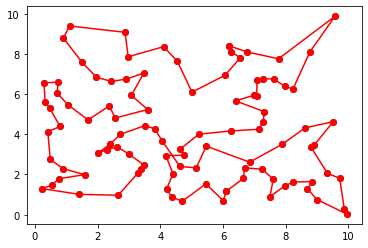

Total Cost: 80.6796
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 9


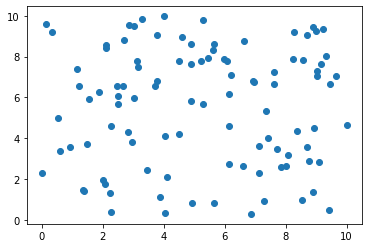

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0xbea04354
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 5.809689e+01, 389 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.09689    0  185          -   58.09689      -     -    0s
     0     0   72.47248    0  212          -   72.47248      -     -    0s
     0 

 48010 29050     cutoff  186        83.40570   76.15037  8.70%  20.3 1324s
 48117 29217   76.47110  193  295   83.40570   76.15037  8.70%  20.3 1325s
 48899 29422   76.36045   83  342   83.40570   76.15200  8.70%  20.4 1332s
 49192 29833   76.50088  142  405   83.40570   76.15200  8.70%  20.4 1335s
 49456 29768   76.54326  203  416   83.40570   76.15200  8.70%  20.4 1344s
 49482 30020   76.54360  207  173   83.40570   76.15200  8.70%  20.4 1345s
 50108 30344   76.73140  318  248   83.40570   76.15200  8.70%  20.5 1352s
 50721 30853   77.00765  379  432   83.40570   76.15509  8.69%  20.5 1355s
 52180 31785   81.28491  133  387   83.40570   76.15969  8.69%  20.6 1360s
 53974 32872   79.07173  274  243   83.40570   76.15969  8.69%  20.6 1367s
 54715 33179   81.08296  393  164   83.40570   76.15969  8.69%  20.5 1370s
 56253 34223   77.96594   56  346   83.40570   76.16521  8.68%  20.4 1376s
H56345 32620                      82.9587389   76.16521  8.19%  20.4 1376s
 57514 33666   81.77247  


Cutting planes:
  Learned: 19
  Gomory: 49
  Cover: 13
  MIR: 22
  Flow cover: 212
  Inf proof: 6
  Zero half: 35
  RLT: 1

Explored 106948 nodes (2374944 simplex iterations) in 1829.65 seconds
Thread count was 16 (of 16 available processors)

Solution count 10: 79.3585 80.5952 80.6594 ... 82.3328

Optimal solution found (tolerance 5.00e-02)
Best objective 7.935854856668e+01, best bound 7.655229191365e+01, gap 3.5362%
[100, 1.0, 79.35854856668, 0.7935854856668]


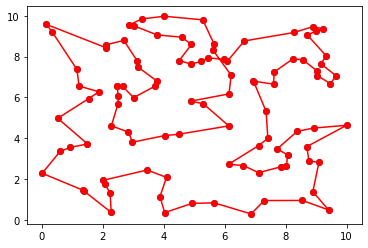

Total Cost: 79.3585
Discarded solution information
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
100 customers, iteration 10


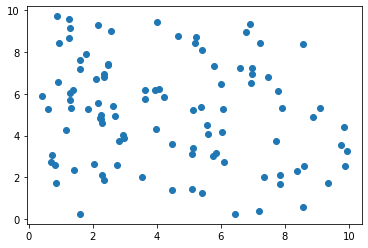

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 10100 rows, 10099 columns and 49104 nonzeros
Model fingerprint: 0x100ba2b2
Variable types: 0 continuous, 10099 integer (10000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [4e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 198 rows and 100 columns
Presolve time: 0.06s
Presolved: 9902 rows, 9999 columns, 48906 nonzeros
Variable types: 0 continuous, 9999 integer (9900 binary)

Root relaxation: objective 5.818157e+01, 330 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   58.18157    0  192          -   58.18157      -     -    0s
H    0     0                     435.8240200   58.18157  86.7%     -    0s
     0 

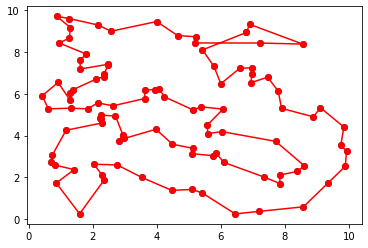

Total Cost: 71.914


In [15]:
for num in n_customers:
    for it in range(iterations):
        
        # Initialize Gurobi Model
        m = gp.Model("TSP")
        
        instance_customers = customers[(num,it+1)]

        # Create variables:

        # - Routing decisions on arcs of the network
        X = dict(
            [((i,j), m.addVar(vtype=GRB.BINARY, name="x_%s_%s" %(i,j))) 
             for i in instance_customers for j in instance_customers]
        )

        # - Auxiliary variables for sub-tour elimination
        U = dict(
            [(list(instance_customers)[i], m.addVar(vtype=GRB.INTEGER, name="u_%s" %list(instance_customers)[i])) 
             for i in range(len(instance_customers)) if i+1 >= 2]
        )


        # Set objective: minimize total TSP distance

        m.setObjective(
            quicksum([distances[(i,j)]*X[(i,j)] 
                      for i in instance_customers 
                      for j in instance_customers if j != i]), 
            GRB.MINIMIZE)



        # Add constraints:

        # - Flow conservation constraints
        Flow_cons_1 = dict(
            [(j,m.addConstr(quicksum([X[(i,j)] for i in instance_customers if i != j]) == 1, "single_in_%s" %j)) 
             for j in instance_customers]
        )

        Flow_cons_2 = dict(
            [(j,m.addConstr(quicksum([X[(j,i)] for i in instance_customers if i != j]) == 1, "single_out_%s" %j)) 
             for j in instance_customers]
        )

        # - Subtour elimination constraints
        Subtour = dict(
            [((i,j),m.addConstr(U[i]-U[j]+num*X[(i,j)] <= num-1, "subtour_%s_%s" %(i,j))) 
             for i in instance_customers for j in instance_customers if (i != list(instance_customers.keys())[0] and j != list(instance_customers.keys())[0] and i != j)]
        )

        # - restricting the variable domains
        Domain_1 = dict(
            [(i,m.addConstr(U[i] <= num-1, "u_domain_ub_%s" %i)) 
             for i in instance_customers if i != list(instance_customers.keys())[0]]
        )

        Domain_2 = dict(
            [(i,m.addConstr(U[i] >= 0, "u_domain_lb_%s" %i)) 
             for i in instance_customers if i != list(instance_customers.keys())[0]]
        )


        # Update model
        m.update()
        m.reset()

        # Set model parameters
        # m.Params.timelimit = 120.0 # run for at most 120 seconds
        m.Params.MIPGap = 0.05 # terminate once a 5% optimality gap is reached

        print ("========")
        print (str(num)+" customers, iteration "+str(it+1))
        print ("========")
        
        print_cust(instance_customers)
        
        # Optimize model
        m.optimize()
        
        obj = m.getObjective()
        
        print ([num,num/area_size,obj.getValue(),obj.getValue()/num])
        
        # Plot solution
        print_TSP(instance_customers,X)
        
        # Print total cost
        print('Total Cost: %g' % m.objVal)
        
        results = results.append(pd.DataFrame([[num,num/area_size,obj.getValue(),obj.getValue()/num]],columns=['n_cust','cust_dens','total_dist','inter_dist']))
        
        
        # delete variables and constraints from previous model instance
        m.remove(m.getVars()[0])
        m.remove(m.getConstrs()[0])

## Plot results and run regression analysis

In [16]:
results

n_cust  cust_dens  total_dist  inter_dist
0       5       0.05   15.811447    3.162289
0       5       0.05   28.170375    5.634075
0       5       0.05   14.089395    2.817879
0       5       0.05   16.734026    3.346805
0       5       0.05   23.797979    4.759596
..    ...        ...         ...         ...
0     100       1.00   79.425544    0.794255
0     100       1.00   84.262415    0.842624
0     100       1.00   80.679595    0.806796
0     100       1.00   79.358549    0.793585
0     100       1.00   71.913978    0.719140

[200 rows x 4 columns]

<AxesSubplot:xlabel='cust_dens', ylabel='inter_dist'>

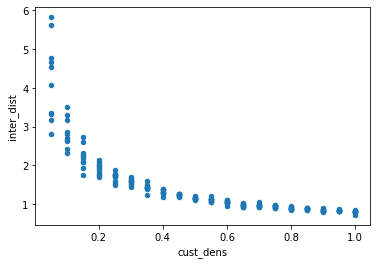

In [17]:
results.plot.scatter(x="cust_dens", y="inter_dist")

In [18]:
# add 1/sqrt(gamma) as column to dataframe
results['sqrt_inv_density'] = results.apply(lambda row: 1/math.sqrt(row.cust_dens), axis=1)
results

n_cust  cust_dens  total_dist  inter_dist  sqrt_inv_density
0       5       0.05   15.811447    3.162289          4.472136
0       5       0.05   28.170375    5.634075          4.472136
0       5       0.05   14.089395    2.817879          4.472136
0       5       0.05   16.734026    3.346805          4.472136
0       5       0.05   23.797979    4.759596          4.472136
..    ...        ...         ...         ...               ...
0     100       1.00   79.425544    0.794255          1.000000
0     100       1.00   84.262415    0.842624          1.000000
0     100       1.00   80.679595    0.806796          1.000000
0     100       1.00   79.358549    0.793585          1.000000
0     100       1.00   71.913978    0.719140          1.000000

[200 rows x 5 columns]

In [19]:
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(results[['sqrt_inv_density']], results['inter_dist'])

print ('Summary statsitics:')

print ('R2: '+str(reg.score(results[['sqrt_inv_density']], results['inter_dist'])))
print ('Coefficients: '+ str(reg.coef_))
print ('Intercept: '+str(reg.intercept_))

Summary statsitics:
R2: 0.9023782752209979
Coefficients: [0.87419847]
Intercept: 0.0


__Note:__ 
- coefficient of 0.8741 is very close to the 0.87 suggested by Danganzo
- goodness of fit is very high
- fit deteriorates for very (!) low numbers of stops, but becomes pretty good even for still relatively low stop counts (>10)

In [20]:
# predict interstop distances
Y_pred = reg.predict(np.array(results.sqrt_inv_density).reshape(-1, 1))

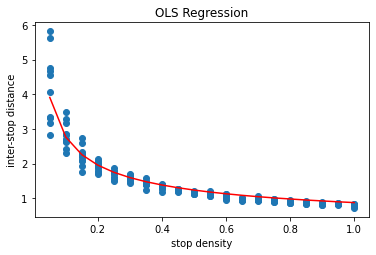

In [21]:
# Plot data and regression
fig = plt.figure()
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot()
ax1.set_xlabel('stop density')
ax1.set_ylabel('inter-stop distance')
ax1.set_title('OLS Regression')

ax1.scatter(x=results.cust_dens, y=results.inter_dist)
ax1.plot(results.cust_dens, Y_pred, color='red')

plt.show()